In [ ]:
# !pip install camelot-py[cv]
# !pip install PyPDF2==2.12.1

In [1]:
import os
import time
import pickle

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import camelot

import warnings
warnings.filterwarnings("ignore")

## Camelot

### General

In [ ]:
# Define document characteristics for table extraction
pdf_folder_path = 'data/PPPP'
filenames = ['2020_Q1.pdf',
             '2020_Q2.pdf',
             '2020_Q3.pdf',
             '2020_Q4.pdf',
             '2021_Q1.pdf',
             '2021_Q2.pdf',
             '2021_Q3.pdf',
             '2021_Q4.pdf',
             '2022_Q1.pdf',
             '2022_Q2.pdf',
             '2022_Q3.pdf',
             '2022_Q4.pdf',
             '2023_Q2.pdf',
             '2023_Q4.pdf']
filepaths = [os.path.join(pdf_folder_path,filename) for filename in filenames]

page_ranges = ['27-end',      # 2020_Q1
               '29-end',      # 2020_Q2
               '38-end',      # 2020_Q3
               '38-end',      # 2020_Q4
               '39-end',      # 2021_Q1
               '39-end',      # 2021_Q2
               '39-end',      # 2021_Q3
               '40-end',      # 2021_Q4
               '38-end',      # 2022_Q1
               '38-end',      # 2022_Q2
               '39-end',      # 2022_Q3
               '39-end',      # 2022_Q4
               '34-end',      # 2023_Q2
               '36-end']      # 2023_Q4

# Header matters
num_cols = [17,      # 2020_Q1
            17,      # 2020_Q2
            17,      # 2020_Q3
            18,      # 2020_Q4
            18,      # 2021_Q1
            18,      # 2021_Q2
            18,      # 2021_Q3
            18,      # 2021_Q4
            20,      # 2022_Q1
            20,      # 2022_Q2
            20,      # 2022_Q3
            22,      # 2022_Q4
            20,      # 2023_Q2
            20]      # 2023_Q4
skip_rows = [(4,4),      # 2020_Q1
             (4,4),      # 2020_Q2
             (4,0),      # 2020_Q3
             (4,4),      # 2020_Q4
             (4,4),      # 2021_Q1
             (4,0),      # 2021_Q2
             (4,4),      # 2021_Q3
             (4,4),      # 2021_Q4
             (3,3),      # 2022_Q1
             (5,3),      # 2022_Q2
             (3,3),      # 2022_Q3
             (4,4),      # 2022_Q4
             (4,4),      # 2023_Q2
             (4,4)]      # 2023_Q4

all_table_areas = [(4,4),      # 2020_Q1
                   (4,4),      # 2020_Q2
                   (4,0),      # 2020_Q3
                   (4,4),      # 2020_Q4
                   (4,4),      # 2021_Q1
                   (4,0),      # 2021_Q2
                   (4,4),      # 2021_Q3
                   (4,4),      # 2021_Q4
                   (['20,500,840,50'],['20,550,840,50']),      # 2022_Q1
                   (['20,500,840,50'],['20,550,840,50']),      # 2022_Q2
                   (['20,500,840,50'],0),      # 2022_Q3
                   (4,4),      # 2022_Q4
                   (4,4),      # 2023_Q2
                   (4,4)]      # 2023_Q4



all_tables = {}

for filename,filepath,page_range in zip(filenames,filepaths,page_ranges):
    with open(f'{filename[:-4]}.pkl','rb') as f:
        tables = pickle.load(f)
    all_tables[filename[:-4]] = tables

### 2022_Q1

In [2]:
pdf_folder_path = 'data/PPPP'
filename = '2022_Q1.pdf'

Total tables extracted: 1


0          1             2      3      4      5      6      7      8   \
0                                                                              
1  REGION   PROVINCE  MUNICIPALITY  SET 1  SET 2  SET 3  SET 4  SET 5  SET 6   
2                                                                              
3          NCR FIRST                                                           
4     NCR                  BINONDO      1      -      1      -      -     27   
5           DISTRICT                                                           
6                           ERMITA      -      -      -     48     13      3   
7                       INTRAMUROS      -      1      -     75      -      3   
8                           MALATE      4      -      2     79      5     16   
9                             PACO      1      1      2    543     71     52   

      9      10     11      12      13   14    15   16      17         18  \
0                                       SET             IPs in  Itinerant   
1  SET 7  SET 8  SET 9  SET 10  SET 11       FNSP  HSF                      
2                                        7M               GIDA        IPs   
3                                                                           
4      2      -      1       2       1    -     -   36       -          -   
5                                                                           
6      6      -      2       8       -    -     -   72       -          -   
7    117      -     17      16       1    -     -   34       -          -   
8    604     23      1      72      44    -     -  114       -          1   
9    210     12      2     119      12    -     -   29       1          -   

      19  
0  Grand  
1         
2  Total  
3         
4     71  
5         
6    152  
7    264  
8    965  
9  1,055

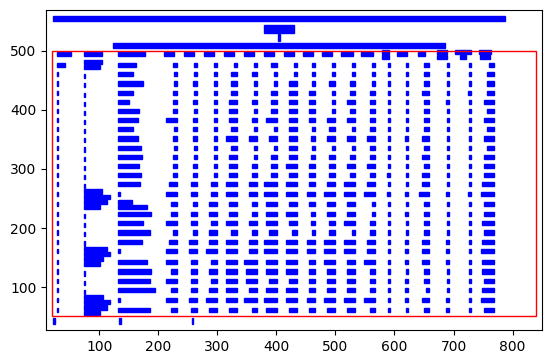

In [3]:
table0 = camelot.read_pdf(
    os.path.join(pdf_folder_path,filename),
    pages='38',
    flavor='stream',
    table_areas=['20,500,840,50']
    )

# Check how many tables were extracted
print(f"Total tables extracted: {len(table0)}")

camelot.plot(table0[0], kind='contour').show()
df_table0 = table0[0].df
df_table0.head(10)

In [4]:
def squeeze(df,num_header_rows,num_index_cols):
    header = df.iloc[:num_header_rows,:].agg(''.join).replace(r'\s+', '', regex=True)  # Squeeze header vertically into single row
    header2 = header.iloc[num_index_cols:].loc[(header.iloc[num_index_cols:] != '')] # Squeeze header horizontally to remove empty columns
    header = pd.concat([header[:num_index_cols].to_frame().T,
                        header2.to_frame().T],
                       axis=1)
    header.columns = np.arange(header.shape[1])
    
    body = df.iloc[num_header_rows:,num_index_cols:]
    body = body.reset_index(drop=True)
    new_body = []
    for ind in body.index:
        row = body.loc[ind, :]
        if not (pd.isna(row).all()):
            row = row.fillna('')
            row = row.loc[row != '']
        row = row.reset_index(drop=True)
        new_body.append(row.to_frame().T)
    new_body = pd.concat(new_body,axis=0)
    new_body_temp = new_body.copy()
    new_body = pd.concat([df.iloc[num_header_rows:,:num_index_cols].reset_index(drop=True),
                          new_body],
                         axis=1)
        
    new_body.columns = np.arange(new_body.shape[1])

    return pd.concat([header,
                      new_body],axis=0)

df_table0_new = squeeze(df_table0,3,3)

In [5]:
tables = camelot.read_pdf(
    os.path.join(pdf_folder_path,filename),
    pages='39-end',
    flavor='stream',
    table_areas=['20,550,840,50']
    )

In [6]:
# Check how many tables were extracted
print(f"Total tables extracted: {len(tables)}")

# for table in tables:
#     camelot.plot(table, kind='contour').show()

# for table in tables:
#     display(table.df.iloc[:10,:10])
#     display(table.df.iloc[:10,10:])

Total tables extracted: 59


In [7]:
all_dfs = [table.df for table in tables]
all_dfs = [squeeze(df,3,3) for df in all_dfs]
all_dfs = [df_table0_new] + all_dfs

for df in all_dfs:
    df.columns = df.iloc[0]
all_dfs = [df[1:].reset_index(drop=True) for df in all_dfs]

# Make sure all tables have the same number of columns.
for i, df in enumerate(all_dfs):
    print(f'Table {i} has {len(df.columns)} columns')

Table 0 has 20 columns
Table 1 has 20 columns
Table 2 has 20 columns
Table 3 has 20 columns
Table 4 has 20 columns
Table 5 has 20 columns
Table 6 has 20 columns
Table 7 has 20 columns
Table 8 has 20 columns
Table 9 has 20 columns
Table 10 has 20 columns
Table 11 has 20 columns
Table 12 has 20 columns
Table 13 has 20 columns
Table 14 has 20 columns
Table 15 has 20 columns
Table 16 has 20 columns
Table 17 has 20 columns
Table 18 has 20 columns
Table 19 has 20 columns
Table 20 has 20 columns
Table 21 has 20 columns
Table 22 has 20 columns
Table 23 has 20 columns
Table 24 has 20 columns
Table 25 has 20 columns
Table 26 has 20 columns
Table 27 has 20 columns
Table 28 has 20 columns
Table 29 has 20 columns
Table 30 has 20 columns
Table 31 has 20 columns
Table 32 has 20 columns
Table 33 has 20 columns
Table 34 has 20 columns
Table 35 has 20 columns
Table 36 has 20 columns
Table 37 has 20 columns
Table 38 has 20 columns
Table 39 has 20 columns
Table 40 has 20 columns
Table 41 has 20 columns
Ta

In [8]:
df_2022_Q1 = pd.concat(all_dfs,axis=0).reset_index(drop=True)

In [9]:
def get_total_locs(df,col=0):
    total_rows = []
    for i in range(len(df)):
        if (not pd.isna(df.iloc[i,col])) and ('total' in df.iloc[i,col].lower()):
            total_rows.append(i)
    return total_rows

def split_tables(df,total_rows):
    previous_ind = -1
    all_dfs = []
    for i,ind in enumerate(total_rows):
        all_dfs.append(df.iloc[previous_ind+1:ind+1,:].reset_index(drop=True))
        previous_ind = ind
    return all_dfs

def get_totals(df,col=0):
    starter = -1
    total_row = df.iloc[starter,:]
    offset = 0
    while df.iloc[starter-offset,3:].isnull().all(): # Find number of row offsets before hitting required values
        offset += 1
    total_row.iloc[3:] = df.iloc[starter-offset,3:]    # Fill in values

    name_list = list(df.iloc[starter-2*offset:,col].values)
    name_list = ['' if isinstance(name, float) and math.isnan(name) else name for name in name_list]
    
    total_row.iloc[col] = ' '.join(list(name_list))    
    total_row.iloc[min(col+1,2)] = 'Total'
    total_row.iloc[min(col+2,2)] = 'Total'  
    total_row.iloc[col] = total_row.iloc[col].rstrip('Total').strip()
    name = total_row.iloc[col]
    return total_row, name

def clean_province_df(df_or):
    df = df_or.copy()
    municipality_vals = []
    row_counter = -1
    while row_counter < len(df)-1:
        row_counter += 1
        if pd.isna(df.iloc[row_counter,2]) or df.iloc[row_counter,2] == '': # Skip if no name on municipality column. Would normally have values
            continue
            
        offset = 0
        row_val = df.iloc[row_counter,:]
        while df.iloc[row_counter+offset,3:].isnull().all(): # Find number of row offsets before hitting required values
            offset += 1
        row_val.iloc[3:] = df.iloc[row_counter+offset,3:]    # Fill in values
        
        name_list = list(df.iloc[row_counter:row_counter+2*offset+1:,2].values)
        name_list = ['' if isinstance(name, float) and math.isnan(name) else name for name in name_list]
        row_counter += 2*offset
        
        row_val.iloc[2] = ' '.join(list(name_list)).strip()
        if row_val.iloc[2] != 'Total':
            municipality_vals.append(row_val)
        
    return pd.DataFrame(municipality_vals)

In [10]:
# Split table by region
total_rows_region = get_total_locs(df_2022_Q1,col=0)         # Get row numbers corresponding to 'total' rows for REGION
region_dfs = split_tables(df_2022_Q1,total_rows_region)      # Split into one table per REGION

# Collect
region_totals = []
province_totals = []
municipals = []
for i, region_df_or in enumerate(region_dfs):
    # Get region totals
    region_df = region_df_or.copy()
    total_row, region_name = get_totals(region_df,col=0)
    region_totals.append(total_row)    

    # Split table by province
    region_df = region_df_or.copy()
    total_rows_province = get_total_locs(region_df,col=1)     # Get row numbers corresponding to 'total' rows for PROVINCE
    province_dfs = split_tables(region_df,total_rows_province)      # Split into one table per REGION

    for province_df_or in province_dfs:
        province_df = province_df_or.copy()
        total_row, province_name = get_totals(province_df,col=1)
        total_row.iloc[0] = region_name
        province_totals.append(total_row)

        municipal_df = clean_province_df(province_df)
        municipal_df.iloc[:,0] = region_name
        municipal_df.iloc[:,1] = province_name
        municipals.append(municipal_df)

In [11]:
# Convert to numbers
df_region_totals = pd.DataFrame(region_totals)
for i in range(3,df_region_totals.shape[1]):
    df_region_totals.iloc[:,i] = df_region_totals.iloc[:,i].str.replace(',','')
    df_region_totals.iloc[:,i] = df_region_totals.iloc[:,i].str.replace('-','0')
df_region_totals.fillna(0,inplace=True)
df_region_totals = df_region_totals.astype({col:'int' for col in df_region_totals.columns[3:]})

df_province_totals = pd.DataFrame(province_totals)
for i in range(3,df_province_totals.shape[1]):
    df_province_totals.iloc[:,i] = df_province_totals.iloc[:,i].str.replace(',','')
    df_province_totals.iloc[:,i] = df_province_totals.iloc[:,i].str.replace('-','0')

df_province_totals.fillna(0,inplace=True)
df_province_totals = df_province_totals.astype({col:'int' for col in df_province_totals.columns[3:]})

df_municipals = pd.concat(municipals,axis=0)
for i in range(3,20):
    df_municipals.iloc[:,i] = df_municipals.iloc[:,i].str.replace(',','')
    df_municipals.iloc[:,i] = df_municipals.iloc[:,i].str.replace('-','0')

df_municipals.fillna(0,inplace=True)
df_municipals = df_municipals.astype({col:'int' for col in df_municipals.columns[3:]})

In [12]:
# Check if province sums up to region values. It does!
df_province_totals_temp = df_province_totals.copy()
df_province_totals_temp = df_province_totals_temp.groupby(df_province_totals.columns[0]).sum()
df_province_totals_temp.drop(columns=df_province_totals.columns[1:3],inplace=True)
df_province_totals_temp = df_province_totals_temp.sort_index()

df_region_totals_temp = df_region_totals.copy()
df_region_totals_temp = df_region_totals_temp.drop(columns=df_region_totals.columns[1:3])
df_region_totals_temp = df_region_totals_temp.set_index(df_region_totals.columns[0])
df_region_totals_temp = df_region_totals_temp.drop('Grand').sort_index()

df_province_totals_temp.equals(df_region_totals_temp)

True

In [13]:
# check if municipal sums up to province values. It does!
df_municipals_temp = df_municipals.copy()
df_municipals_temp = df_municipals_temp.groupby(list(df_municipals.columns[:2])).sum().drop(columns=df_municipals.columns[2])
df_municipals_temp = df_municipals_temp.reset_index().sort_values(list(df_municipals.columns[:2]))

df_province_totals_temp = df_province_totals.copy()
df_province_totals_temp = df_province_totals_temp.drop(columns=[df_province_totals.columns[2]])
df_province_totals_temp = df_province_totals_temp.sort_values(list(df_province_totals.columns[:2])).reset_index(drop=True)

df_municipals_temp.equals(df_province_totals_temp)

True

### 2022_Q2

In [4]:
pdf_folder_path = 'data/PPPP'
filename = '2022_Q2.pdf'

Total tables extracted: 1


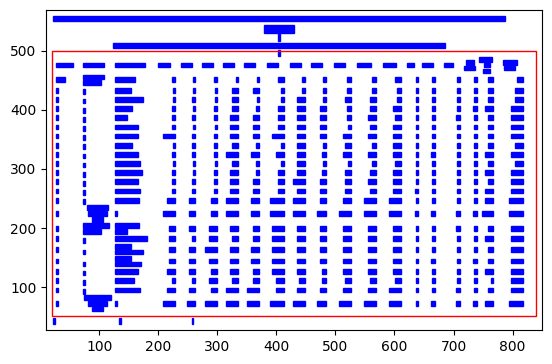

In [5]:
table0 = camelot.read_pdf(
    os.path.join(pdf_folder_path,filename),
    pages='38',
    flavor='stream',
    table_areas=['20,500,840,50']
    )

# Check how many tables were extracted
print(f"Total tables extracted: {len(table0)}")

camelot.plot(table0[0], kind='contour').show()
df_table0 = table0[0].df

In [6]:
def squeeze(df,num_header_rows,num_index_cols):
    header = df.iloc[:num_header_rows,:].agg(''.join).replace(r'\s+', '', regex=True)  # Squeeze header vertically into single row
    header2 = header.iloc[num_index_cols:].loc[(header.iloc[num_index_cols:] != '')] # Squeeze header horizontally to remove empty columns
    header = pd.concat([header[:num_index_cols].to_frame().T,
                        header2.to_frame().T],
                       axis=1)
    header.columns = np.arange(header.shape[1])
    
    body = df.iloc[num_header_rows:,num_index_cols:]
    body = body.reset_index(drop=True)
    new_body = []
    for ind in body.index:
        row = body.loc[ind, :]
        if not (pd.isna(row).all()):
            row = row.fillna('')
            row = row.loc[row != '']
        row = row.reset_index(drop=True)
        new_body.append(row.to_frame().T)
    new_body = pd.concat(new_body,axis=0)
    new_body_temp = new_body.copy()
    new_body = pd.concat([df.iloc[num_header_rows:,:num_index_cols].reset_index(drop=True),
                          new_body],
                         axis=1)
        
    new_body.columns = np.arange(new_body.shape[1])

    return pd.concat([header,
                      new_body],axis=0)

df_table0_new = squeeze(df_table0,5,3)

In [7]:
tables = camelot.read_pdf(
    os.path.join(pdf_folder_path,filename),
    pages='39-end',
    flavor='stream',
    table_areas=['20,550,840,50']
    )

# # Check how many tables were extracted
# print(f"Total tables extracted: {len(tables)}")

# for table in tables:
#     camelot.plot(table, kind='contour').show()

# for table in tables:
#     display(table.df.iloc[:10,:10])
#     display(table.df.iloc[:10,10:])

In [8]:
all_dfs = [table.df for table in tables]
all_dfs = [squeeze(df,5,3) for df in all_dfs]
all_dfs = [df_table0_new] + all_dfs

for df in all_dfs:
    df.columns = df.iloc[0]
all_dfs = [df[1:].reset_index(drop=True) for df in all_dfs]

# Make sure all tables have the same number of columns.
for i, df in enumerate(all_dfs):
    print(f'Table {i} has {len(df.columns)} columns')

Table 0 has 20 columns
Table 1 has 20 columns
Table 2 has 20 columns
Table 3 has 20 columns
Table 4 has 20 columns
Table 5 has 20 columns
Table 6 has 20 columns
Table 7 has 20 columns
Table 8 has 20 columns
Table 9 has 20 columns
Table 10 has 20 columns
Table 11 has 20 columns
Table 12 has 20 columns
Table 13 has 20 columns
Table 14 has 20 columns
Table 15 has 20 columns
Table 16 has 20 columns
Table 17 has 20 columns
Table 18 has 20 columns
Table 19 has 20 columns
Table 20 has 20 columns
Table 21 has 20 columns
Table 22 has 20 columns
Table 23 has 20 columns
Table 24 has 20 columns
Table 25 has 20 columns
Table 26 has 20 columns
Table 27 has 20 columns
Table 28 has 20 columns
Table 29 has 20 columns
Table 30 has 20 columns
Table 31 has 20 columns
Table 32 has 20 columns
Table 33 has 20 columns
Table 34 has 20 columns
Table 35 has 20 columns
Table 36 has 20 columns
Table 37 has 20 columns
Table 38 has 20 columns
Table 39 has 20 columns
Table 40 has 20 columns
Table 41 has 20 columns
Ta

In [9]:
df_2022_Q2 = pd.concat(all_dfs,axis=0).reset_index(drop=True)

In [10]:
df_2022_Q2.loc[~pd.isna(df_2022_Q2['SET1']) & pd.isna(df_2022_Q2['GrandTotal'])]

0    REGION PROVINCE MUNICIPALITY   SET1   SET2    SET3     SET4    SET5  \
2431                               8,020  9,598  54,082  118,873  40,491   

0       SET6    SET7   SET8   SET9  SET10   SET11  7M FNSP     HSF IPsGIDA  \
2431  44,349  39,696  4,664  1,061  1,466  15,361  14   14  31,278       1   

0    ItinerantIPs GrandTotal  
2431      368,968        NaN

In [11]:
df_2022_Q2.loc[2427:2435,:]

0          REGION   PROVINCE MUNICIPALITY     SET1     SET2     SET3     SET4  \
2427               TAWI-TAWI                   NaN      NaN      NaN      NaN   
2428                                         1,998       18    6,049    3,200   
2429                   Total                   NaN      NaN      NaN      NaN   
2430        BARMM                              NaN      NaN      NaN      NaN   
2431                                         8,020    9,598   54,082  118,873   
2432        Total                              NaN      NaN      NaN      NaN   
2433  Grand Total                          234,029  202,321  311,187  983,697   

0        SET5     SET6     SET7    SET8     SET9    SET10    SET11     7M  \
2427      NaN      NaN      NaN     NaN      NaN      NaN      NaN    NaN   
2428    2,943    1,752    2,910      47        1        -      759      -   
2429      NaN      NaN      NaN     NaN      NaN      NaN      NaN    NaN   
2430      NaN      NaN      NaN     NaN      NaN      NaN      NaN    NaN   
2431   40,491   44,349   39,696   4,664    1,061    1,466   15,361     14   
2432      NaN      NaN      NaN     NaN      NaN      NaN      NaN    NaN   
2433  703,893  746,562  333,693  68,453  184,465  131,032  310,902  1,027   

0       FNSP      HSF IPsGIDA ItinerantIPs GrandTotal  
2427     NaN      NaN     NaN          NaN        NaN  
2428       -   15,260       -            -     34,937  
2429     NaN      NaN     NaN          NaN        NaN  
2430     NaN      NaN     NaN          NaN        NaN  
2431      14   31,278       1      368,968        NaN  
2432     NaN      NaN     NaN          NaN        NaN  
2433  25,325  171,506     331        3,516  4,411,939

In [12]:
# Fix for row 2431
df_2022_Q2.loc[2431,'GrandTotal'] = df_2022_Q2.loc[2431,'ItinerantIPs']
df_2022_Q2.loc[2431,'ItinerantIPs'] = df_2022_Q2.loc[2431,'IPsGIDA']
df_2022_Q2.loc[2431,'IPsGIDA'] = '-'

In [13]:
def get_total_locs(df,col=0):
    total_rows = []
    for i in range(len(df)):
        if (not pd.isna(df.iloc[i,col])) and ('total' in df.iloc[i,col].lower()):
            total_rows.append(i)
    return total_rows

def split_tables(df,total_rows):
    previous_ind = -1
    all_dfs = []
    for i,ind in enumerate(total_rows):
        all_dfs.append(df.iloc[previous_ind+1:ind+1,:].reset_index(drop=True))
        previous_ind = ind
    return all_dfs

def get_totals(df,col=0):
    starter = -1
    total_row = df.iloc[starter,:]
    offset = 0
    while df.iloc[starter-offset,3:].isnull().all(): # Find number of row offsets before hitting required values
        offset += 1
    total_row.iloc[3:] = df.iloc[starter-offset,3:]    # Fill in values

    name_list = list(df.iloc[starter-2*offset:,col].values)
    name_list = ['' if isinstance(name, float) and math.isnan(name) else name for name in name_list]
    
    total_row.iloc[col] = ' '.join(list(name_list))    
    total_row.iloc[min(col+1,2)] = 'Total'
    total_row.iloc[min(col+2,2)] = 'Total'  
    total_row.iloc[col] = total_row.iloc[col].rstrip('Total').strip()
    name = total_row.iloc[col]
    return total_row, name

In [14]:
def clean_province_df(df_or):
    df = df_or.copy()
    municipality_vals = []
    row_counter = -1
    while row_counter < len(df)-1:
        row_counter += 1
        if pd.isna(df.iloc[row_counter,2]) or df.iloc[row_counter,2] == '': # Skip if no name on municipality column. Would normally have values
            continue
            
        offset = 0
        row_val = df.iloc[row_counter,:]
        while df.iloc[row_counter+offset,3:].isnull().all(): # Find number of row offsets before hitting required values
            offset += 1
        row_val.iloc[3:] = df.iloc[row_counter+offset,3:]    # Fill in values
        
        name_list = list(df.iloc[row_counter:row_counter+2*offset+1:,2].values)
        name_list = ['' if isinstance(name, float) and math.isnan(name) else name for name in name_list]
        row_counter += 2*offset
        
        row_val.iloc[2] = ' '.join(list(name_list)).strip()
        if row_val.iloc[2] != 'Total':
            municipality_vals.append(row_val)
        
    return pd.DataFrame(municipality_vals)

In [15]:
# Split table by region
total_rows_region = get_total_locs(df_2022_Q2,col=0)         # Get row numbers corresponding to 'total' rows for REGION
region_dfs = split_tables(df_2022_Q2,total_rows_region)      # Split into one table per REGION

# Collect
region_totals = []
province_totals = []
municipals = []
for i, region_df_or in enumerate(region_dfs):
    # Get region totals
    region_df = region_df_or.copy()
    total_row, region_name = get_totals(region_df,col=0)
    region_totals.append(total_row)    

    # Split table by province
    region_df = region_df_or.copy()
    total_rows_province = get_total_locs(region_df,col=1)     # Get row numbers corresponding to 'total' rows for PROVINCE
    province_dfs = split_tables(region_df,total_rows_province)      # Split into one table per REGION

    for province_df_or in province_dfs:
        province_df = province_df_or.copy()
        total_row, province_name = get_totals(province_df,col=1)
        total_row.iloc[0] = region_name
        province_totals.append(total_row)

        municipal_df = clean_province_df(province_df)
        municipal_df.iloc[:,0] = region_name
        municipal_df.iloc[:,1] = province_name
        municipals.append(municipal_df)

In [16]:
# Convert to numbers
df_region_totals = pd.DataFrame(region_totals)
for i in range(3,df_region_totals.shape[1]):
    df_region_totals.iloc[:,i] = df_region_totals.iloc[:,i].str.replace(',','')
    df_region_totals.iloc[:,i] = df_region_totals.iloc[:,i].str.replace('-','0')
df_region_totals.fillna(0,inplace=True)
df_region_totals = df_region_totals.astype({col:'int' for col in df_region_totals.columns[3:]})

df_province_totals = pd.DataFrame(province_totals)
for i in range(3,df_province_totals.shape[1]):
    df_province_totals.iloc[:,i] = df_province_totals.iloc[:,i].str.replace(',','')
    df_province_totals.iloc[:,i] = df_province_totals.iloc[:,i].str.replace('-','0')

df_province_totals.fillna(0,inplace=True)
df_province_totals = df_province_totals.astype({col:'int' for col in df_province_totals.columns[3:]})

In [17]:
# Check if province sums up to region values. It does!
df_province_totals_temp = df_province_totals.copy()
df_province_totals_temp = df_province_totals_temp.groupby(df_province_totals.columns[0]).sum()
df_province_totals_temp.drop(columns=df_province_totals.columns[1:3],inplace=True)
df_province_totals_temp = df_province_totals_temp.sort_index()

df_region_totals_temp = df_region_totals.copy()
df_region_totals_temp = df_region_totals_temp.drop(columns=df_region_totals.columns[1:3])
df_region_totals_temp = df_region_totals_temp.set_index(df_region_totals.columns[0])
df_region_totals_temp = df_region_totals_temp.drop('Grand').sort_index()

df_province_totals_temp.equals(df_region_totals_temp)

True

In [18]:
df_municipals = pd.concat(municipals,axis=0)
for i in range(3,20):
    df_municipals.iloc[:,i] = df_municipals.iloc[:,i].str.replace(',','')
    df_municipals.iloc[:,i] = df_municipals.iloc[:,i].str.replace('-','0')

df_municipals.fillna(0,inplace=True)
df_municipals = df_municipals.astype({col:'int' for col in df_municipals.columns[3:]})

In [19]:
# check if municipal sums up to province values. It does!
df_municipals_temp = df_municipals.copy()
df_municipals_temp = df_municipals_temp.groupby(list(df_municipals.columns[:2])).sum().drop(columns=df_municipals.columns[2])
df_municipals_temp = df_municipals_temp.reset_index().sort_values(list(df_municipals.columns[:2]))

df_province_totals_temp = df_province_totals.copy()
df_province_totals_temp = df_province_totals_temp.drop(columns=[df_province_totals.columns[2]])
df_province_totals_temp = df_province_totals_temp.sort_values(list(df_province_totals.columns[:2])).reset_index(drop=True)

df_municipals_temp.equals(df_province_totals_temp)

True

### 2022_Q3

In [2]:
pdf_folder_path = 'data/PPPP'
filename = '2022_Q3.pdf'

Total tables extracted: 1


0                   1             2      3      4      5      6   \
0                                                                         
1  REGION            PROVINCE  MUNICIPALITY  SET 1  SET 2  SET 3  SET 4   
2                                                                         
3     NCR  NCR FIRST DISTRICT       BINONDO      1      -      1      -   
4                                    ERMITA      -      -      -     48   
5                                 INTRAMURO                               
6                                                -      1      -     77   
7                                         S                               
8                                    MALATE      4      -      2     79   
9                                      PACO      1      -      2    527   

      7      8      9      10     11      12      13  14    15           16  \
0                                                                             
1  SET 5  SET 6  SET 7  SET 8  SET 9  SET 10  SET 11  7M  FNSP  IPs in GIDA   
2                                                                             
3      -     28      2      -      1       2      20   -     -            -   
4     13      3      6      -      2       8       7   -     -            -   
5                                                                             
6      -      3    117      -     17      15       8   -     -            -   
7                                                                             
8      6     16    595     23      1      72     225   -     -            -   
9     70     50    204     12      2     120      90   -     -            1   

          17   18     19  
0  Itinerant       Grand  
1             HSF         
2        IPs       Total  
3          -   35     90  
4          -   69    156  
5                         
6          -   33    271  
7                         
8          1  112  1,136  
9          -   29  1,108

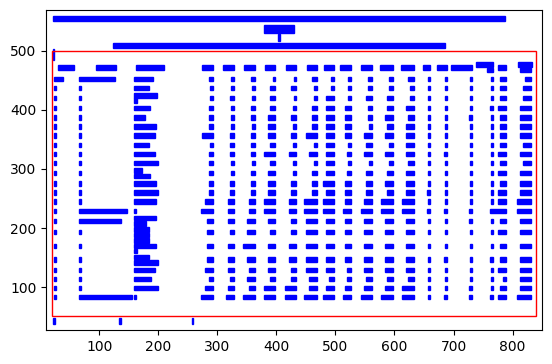

In [3]:
table0 = camelot.read_pdf(
    os.path.join(pdf_folder_path,filename),
    pages='39',
    flavor='stream',
    table_areas=['20,500,840,50']
    )

# Check how many tables were extracted
print(f"Total tables extracted: {len(table0)}")

camelot.plot(table0[0], kind='contour').show()
df_table0 = table0[0].df
df_table0.head(10)

In [5]:
def squeeze(df,num_header_rows,num_index_cols):
    header = df.iloc[:num_header_rows,:].agg(''.join).replace(r'\s+', '', regex=True)  # Squeeze header vertically into single row
    header2 = header.iloc[num_index_cols:].loc[(header.iloc[num_index_cols:] != '')] # Squeeze header horizontally to remove empty columns
    header = pd.concat([header[:num_index_cols].to_frame().T,
                        header2.to_frame().T],
                       axis=1)
    header.columns = np.arange(header.shape[1])
    
    body = df.iloc[num_header_rows:,num_index_cols:]
    body = body.reset_index(drop=True)
    new_body = []
    for ind in body.index:
        row = body.loc[ind, :]
        if not (pd.isna(row).all()):
            row = row.fillna('')
            row = row.loc[row != '']
        row = row.reset_index(drop=True)
        new_body.append(row.to_frame().T)
    new_body = pd.concat(new_body,axis=0)
    new_body_temp = new_body.copy()
    new_body = pd.concat([df.iloc[num_header_rows:,:num_index_cols].reset_index(drop=True),
                          new_body],
                         axis=1)
        
    new_body.columns = np.arange(new_body.shape[1])

    return pd.concat([header,
                      new_body],axis=0)

df_table0_new = squeeze(df_table0,3,3)

In [6]:
tables = camelot.read_pdf(
    os.path.join(pdf_folder_path,filename),
    pages='40-end',
    flavor='stream',
    table_areas=['20,550,840,50']
    )

Total tables extracted: 62


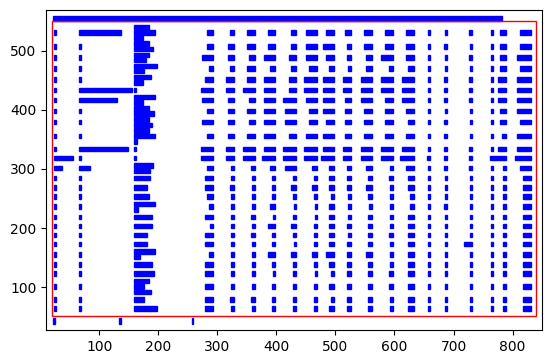

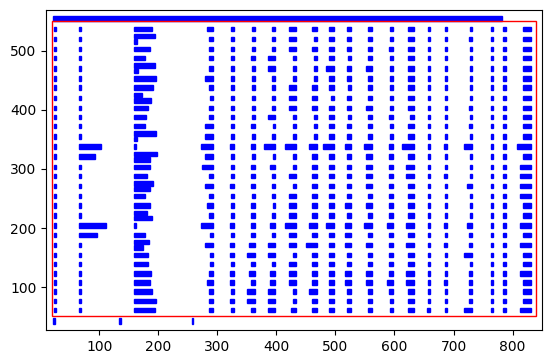

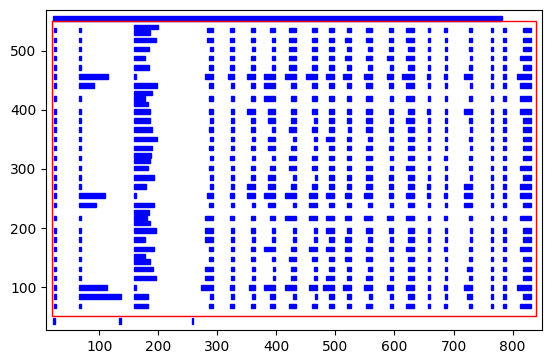

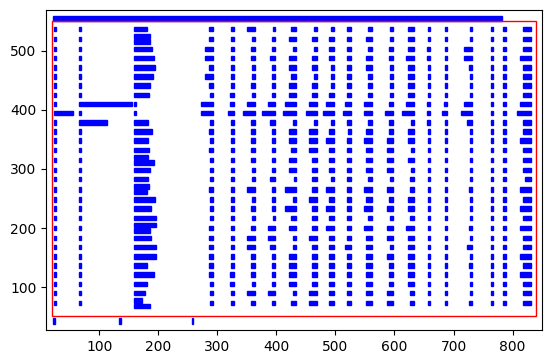

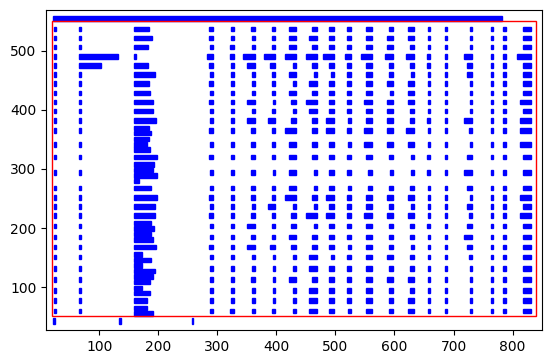

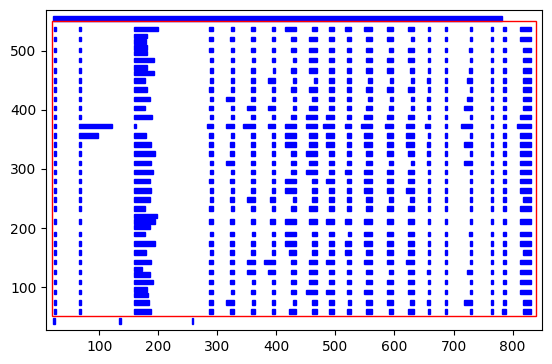

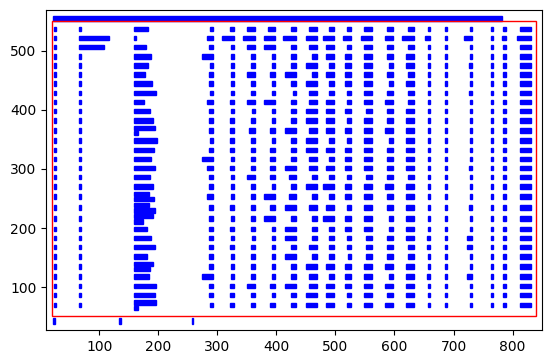

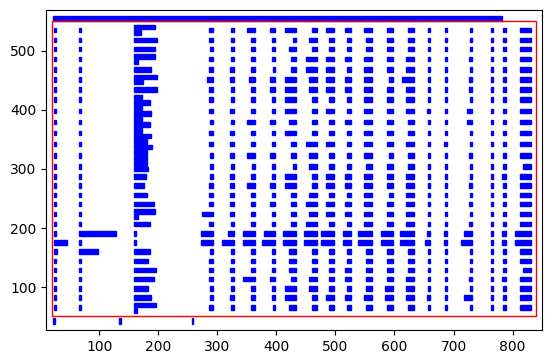

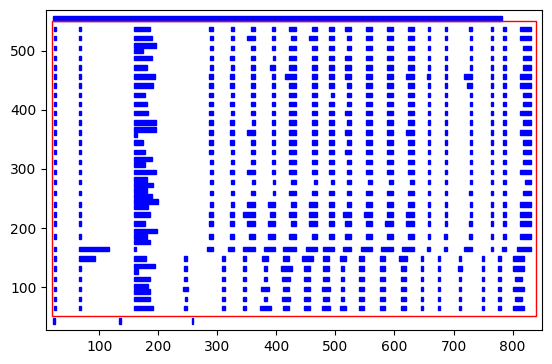

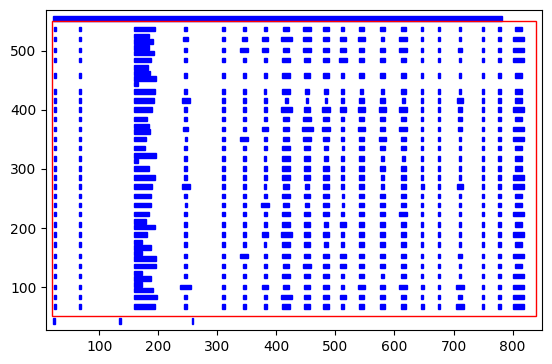

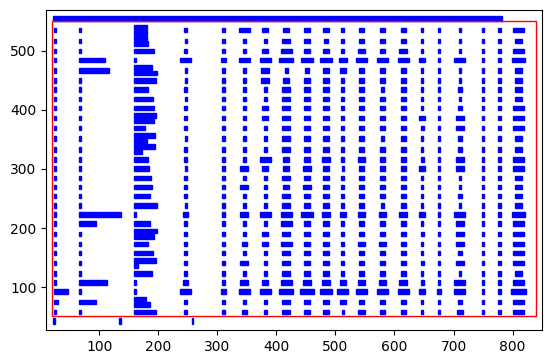

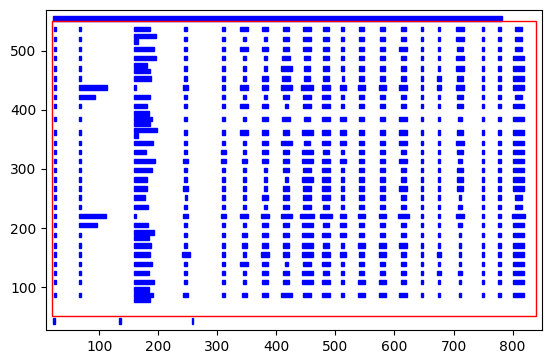

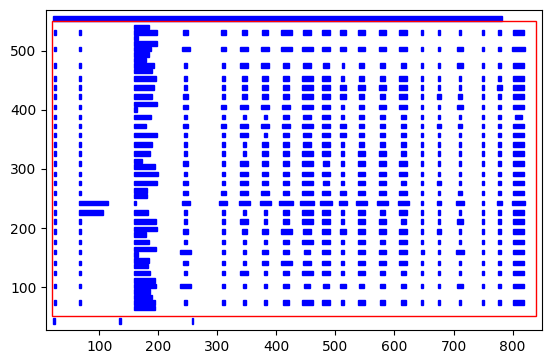

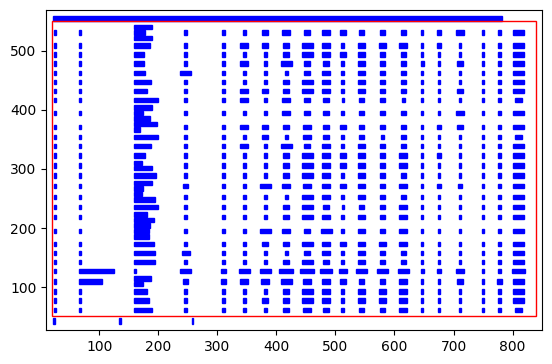

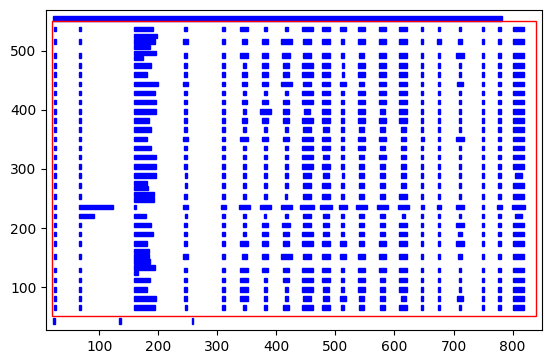

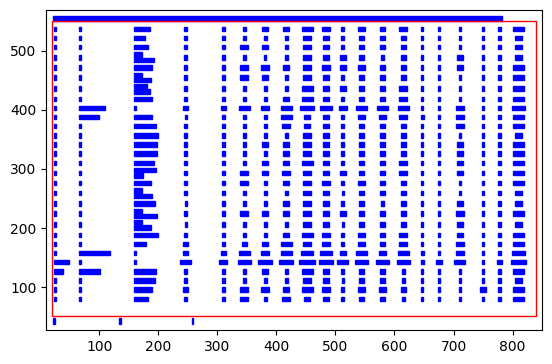

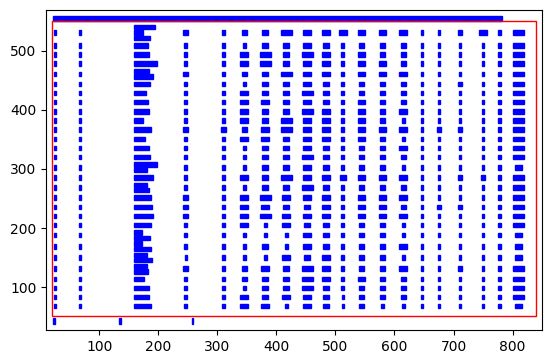

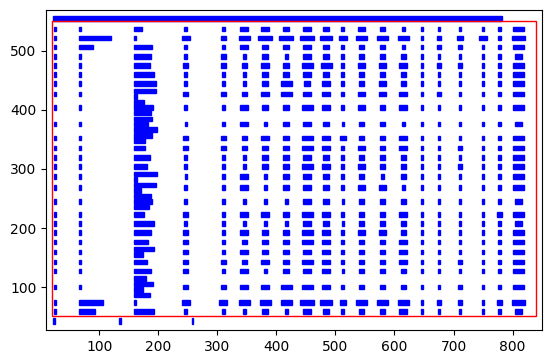

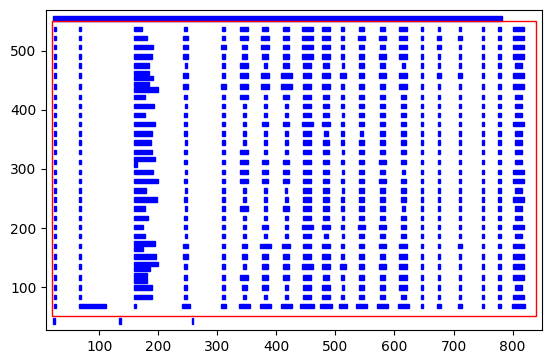

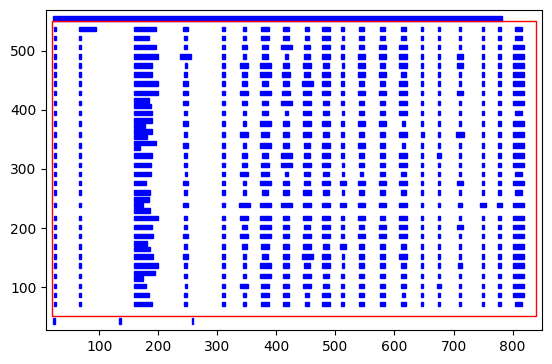

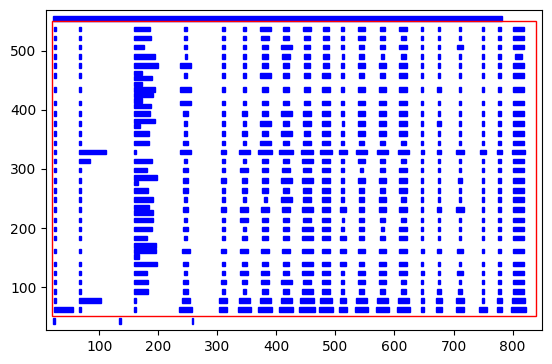

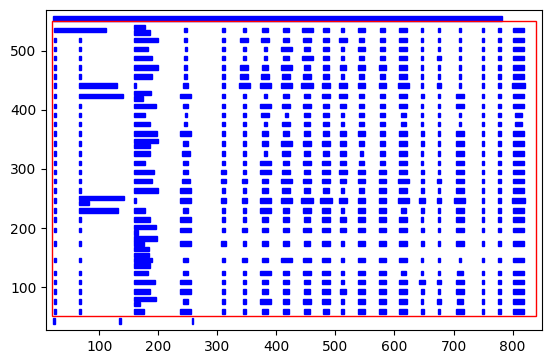

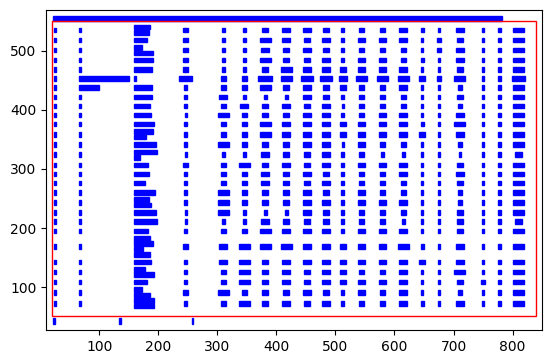

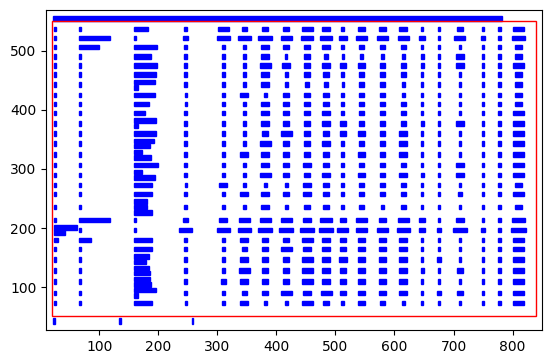

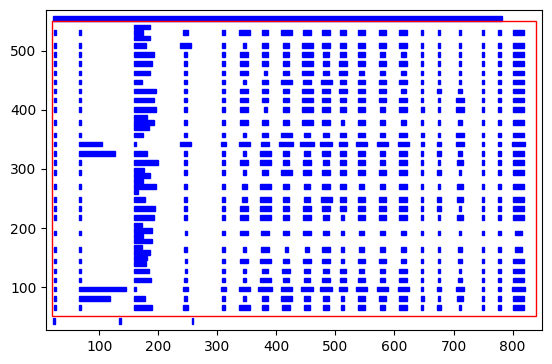

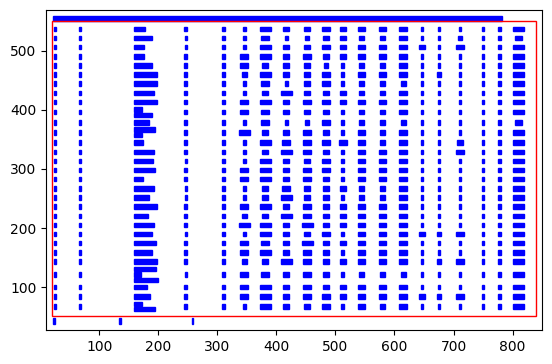

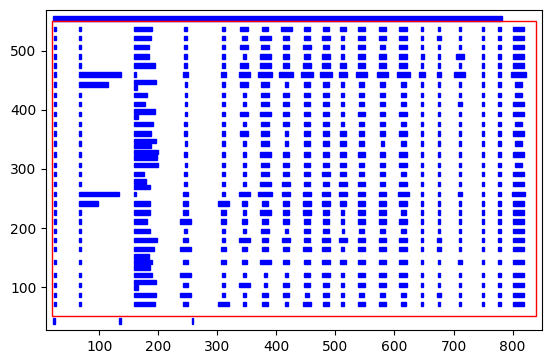

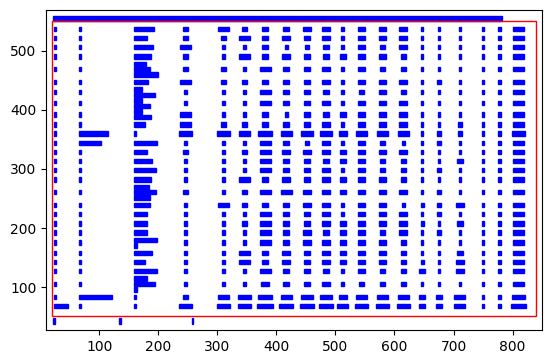

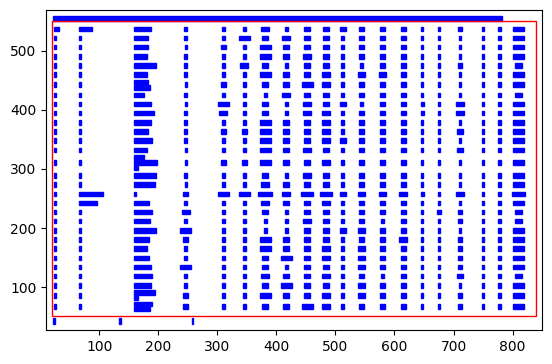

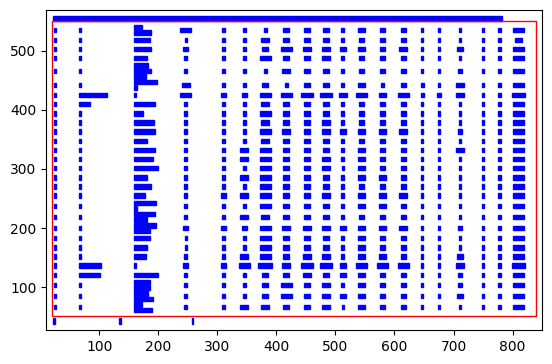

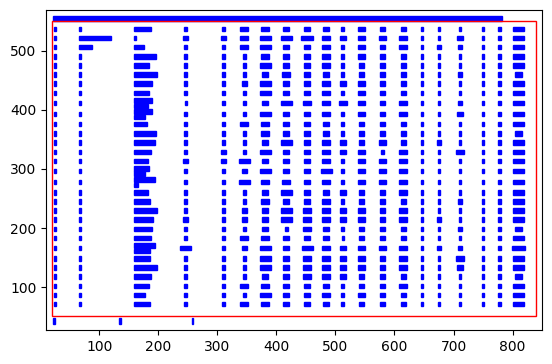

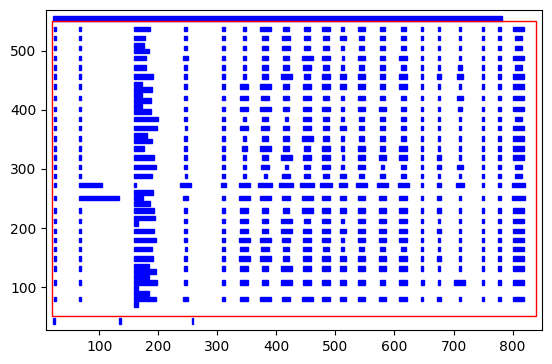

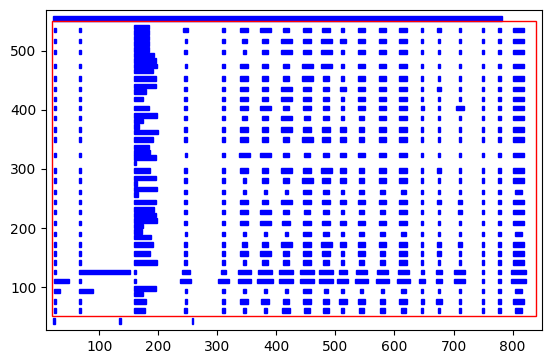

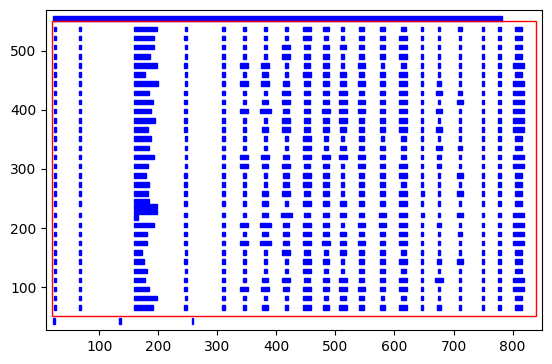

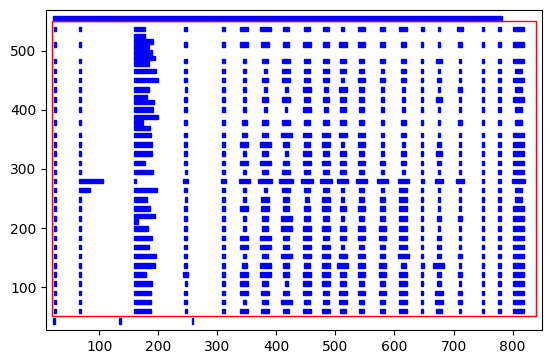

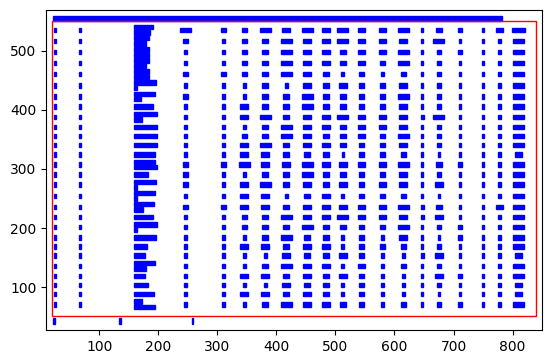

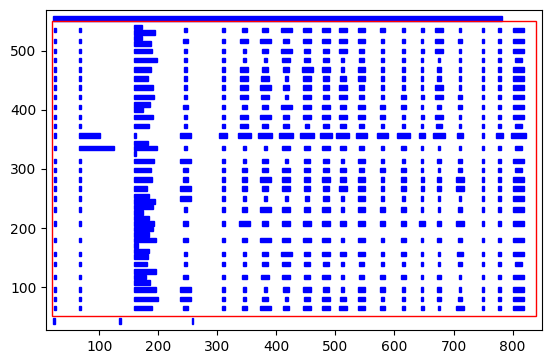

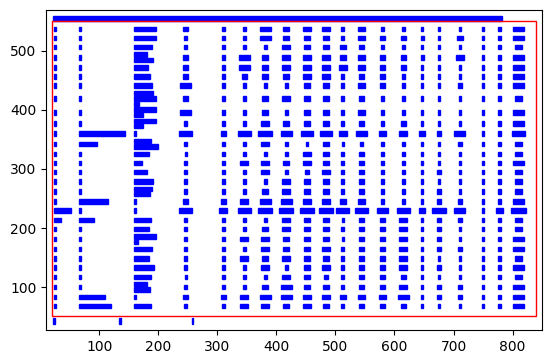

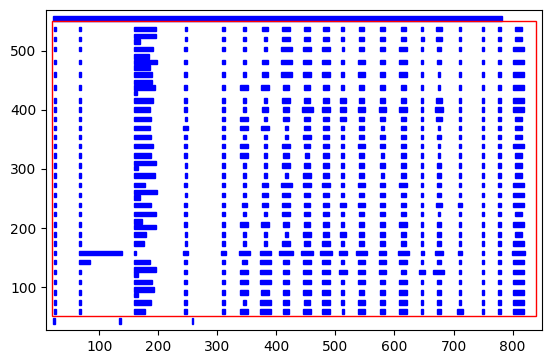

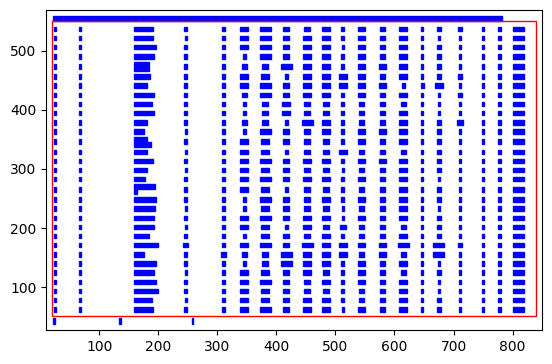

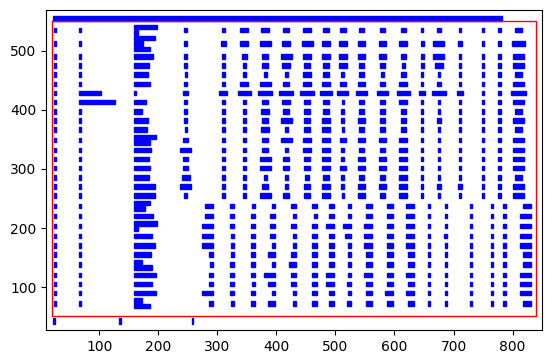

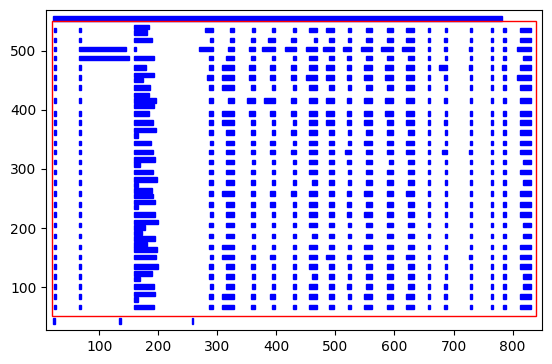

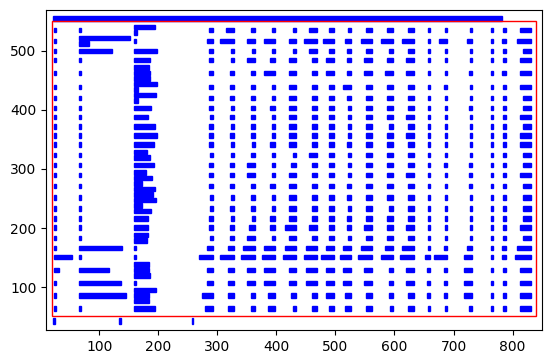

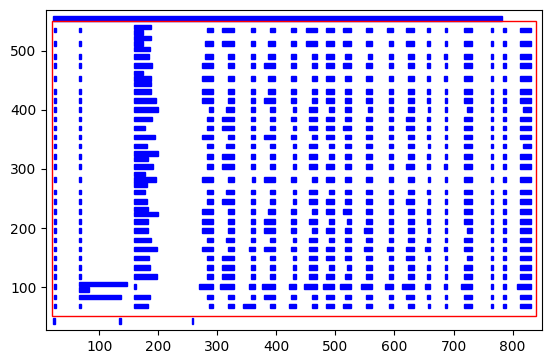

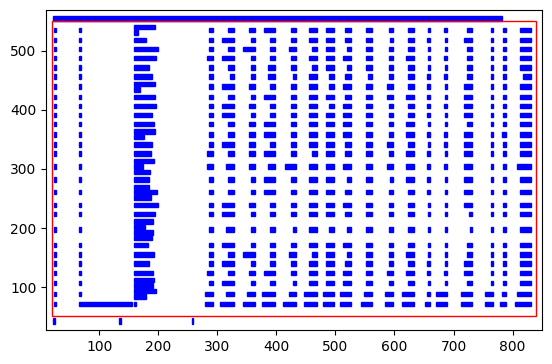

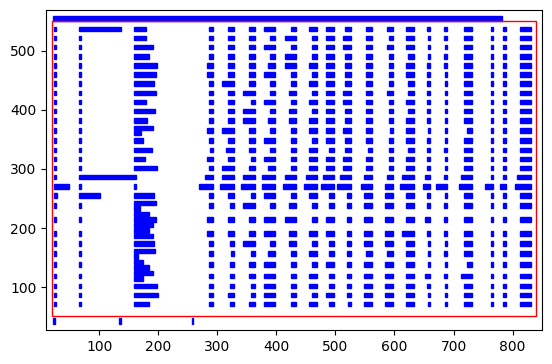

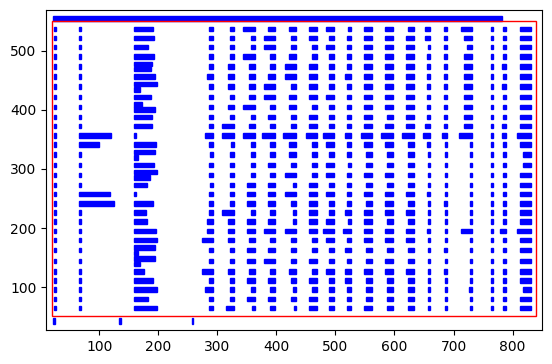

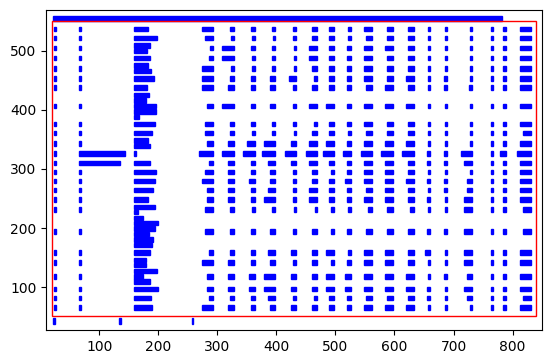

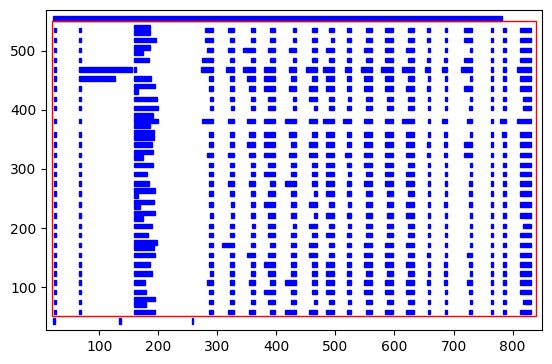

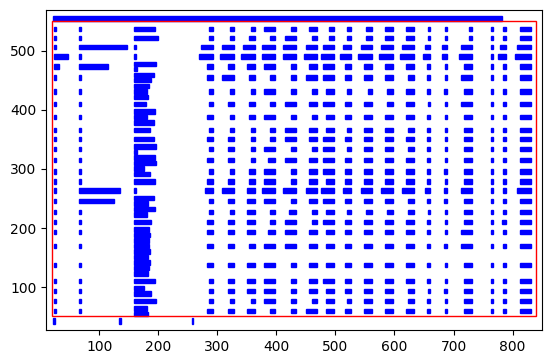

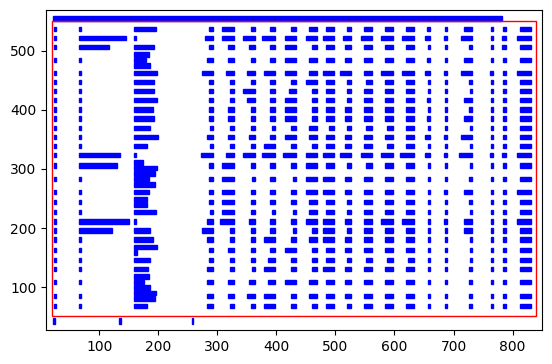

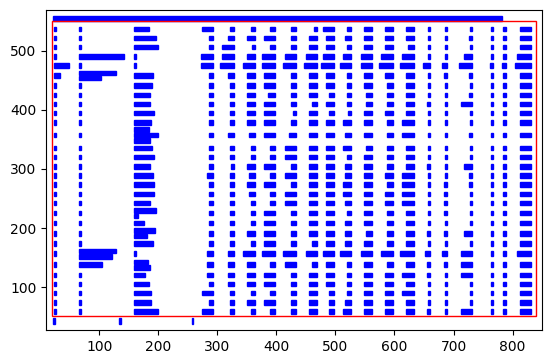

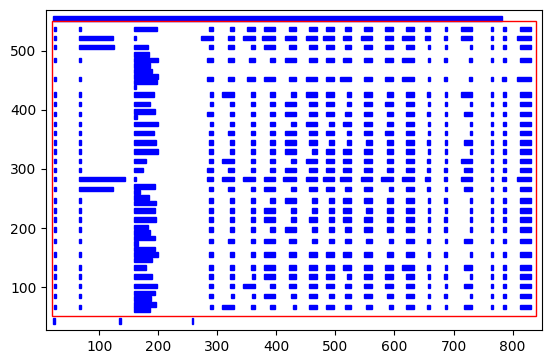

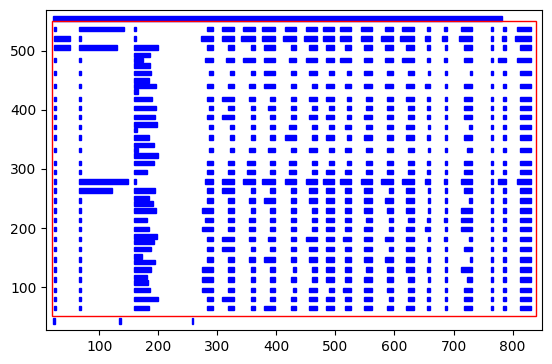

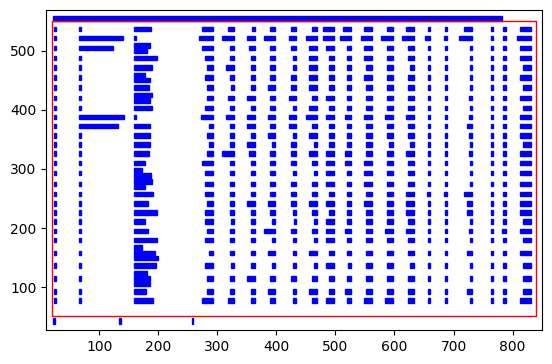

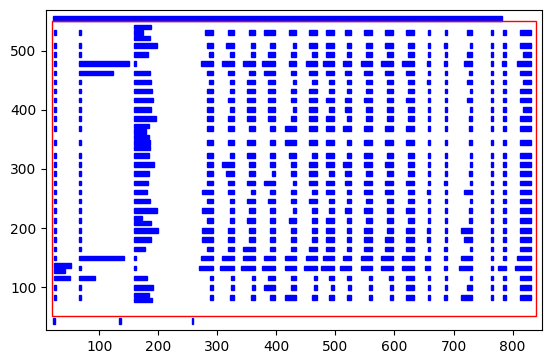

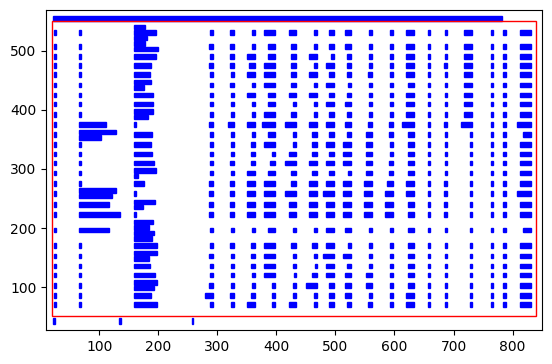

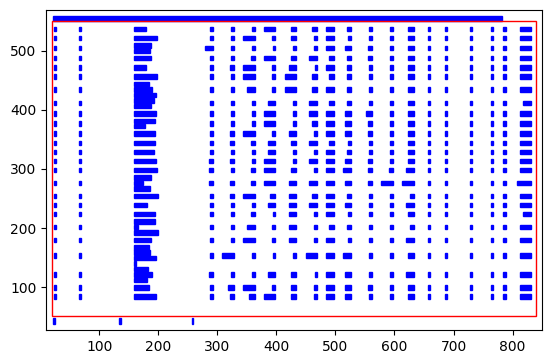

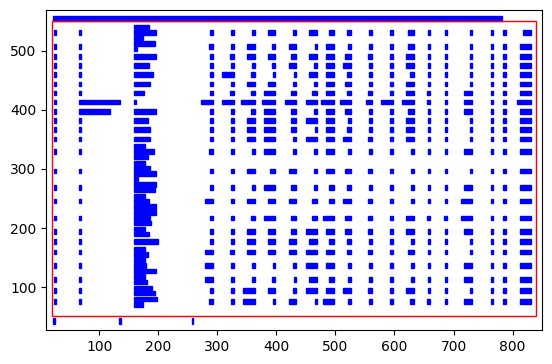

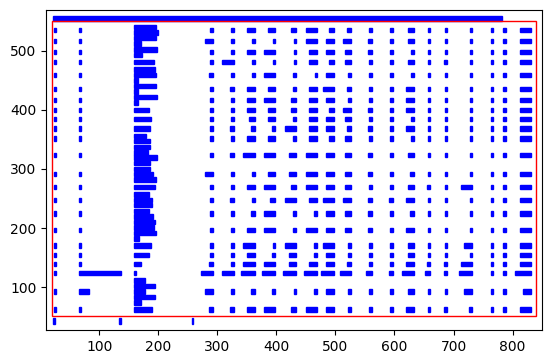

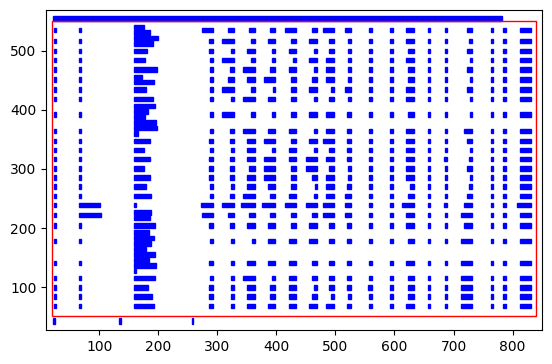

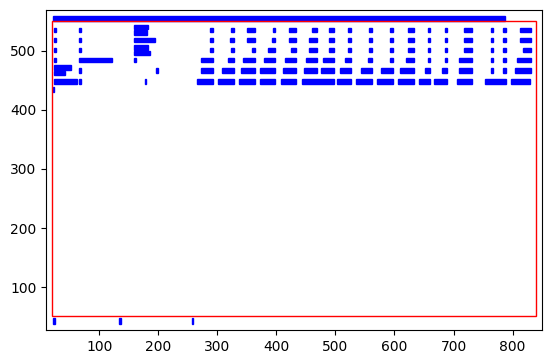

In [7]:
# Check how many tables were extracted
print(f"Total tables extracted: {len(tables)}")

for table in tables:
    camelot.plot(table, kind='contour').show()

# for table in tables:
#     display(table.df.iloc[:10,:10])
#     display(table.df.iloc[:10,10:])

In [394]:
# Dealing with no header scenario
all_dfs = [table.df for table in tables]
all_dfs = [squeeze(df,0,3) for df in all_dfs]
all_dfs = [df_table0_new] + all_dfs

num_col = all_dfs[0].shape[1]
for i,df in enumerate(all_dfs[1:]):
    if df.shape[1] < num_col:
        all_dfs[i+1] = pd.concat([pd.DataFrame('', index=df.index, columns=range(num_col-df.shape[1])),
                                  df],
                                 axis=1)
        all_dfs[i+1] = all_dfs[i+1].reset_index(drop=True)

for df in all_dfs:
    df.columns = all_dfs[0].iloc[0]
all_dfs[0] = all_dfs[0][1:].reset_index(drop=True)

# # Make sure all tables have the same number of columns.
# for i, df in enumerate(all_dfs):
#     print(f'Table {i} has {len(df.columns)} columns')

In [113]:
for i, df in enumerate(all_dfs):
    print(f'\n\n\n\nTable {i}')
    display(df)





Table 0


0  REGION                   PROVINCE  MUNICIPALITY   SET1 SET2   SET3   SET4  \
0     NCR         NCR FIRST DISTRICT       BINONDO      1    -      1      -   
1                                           ERMITA      -    -      -     48   
2                                        INTRAMURO    NaN  NaN    NaN    NaN   
3                                                       -    1      -     77   
4                                                S    NaN  NaN    NaN    NaN   
5                                           MALATE      4    -      2     79   
6                                             PACO      1    -      2    527   
7                                         PANDACAN      2    -      -    314   
8                                        PORT AREA  1,137    6      7    206   
9                                           QUIAPO      -    2      2     18   
10                                        SAMPALOC      7    4      8  2,353   
11                                      SAN MIGUEL      1    -      -     46   
12                                             SAN    NaN  NaN    NaN    NaN   
13                                                      5    -      2    134   
14                                         NICOLAS    NaN  NaN    NaN    NaN   
15                                       SANTA ANA      6    3      4    290   
16                                      SANTA CRUZ      7    1      9    450   
17                                    TONDO I / II    473   19     18  4,277   
18          NCR FIRST DISTRICT Total                1,644   36     55  8,819   
19                                     CITY OF LAS    NaN  NaN    NaN    NaN   
20               NCR FOURTH DISTRICT                   31   14    526    706   
21                                           PIÑAS    NaN  NaN    NaN    NaN   
22                                         CITY OF    NaN  NaN    NaN    NaN   
23                                                     15    5    520     55   
24                                          MAKATI    NaN  NaN    NaN    NaN   
25                                         CITY OF    NaN  NaN    NaN    NaN   
26                                       MUNTINLUP     28   17  1,124    398   
27                                               A    NaN  NaN    NaN    NaN   
28                                         CITY OF    NaN  NaN    NaN    NaN   
29                                                     31   21    635    295   
30                                       PARAÑAQUE    NaN  NaN    NaN    NaN   
31                                      PASAY CITY    831   11     14    760   
32                                         PATEROS      5    3    185     10   
33                                     TAGUIG CITY    965   38     58  1,607   
34         NCR FOURTH DISTRICT Total                1,906  109  3,062  3,831   

0    SET5    SET6   SET7 SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA  \
0       -      28      2    -      1      2     20    -    -         -   
1      13       3      6    -      2      8      7    -    -         -   
2     NaN     NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN   
3       -       3    117    -     17     15      8    -    -         -   
4     NaN     NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN   
5       6      16    595   23      1     72    225    -    -         -   
6      70      50    204   12      2    120     90    -    -         1   
7       9      17    438   25      -     58    241    -    -         -   
8      20   2,058    211   15    139    217    125    -    -         -   
9       7       4    345    -     10      7    139    -    -         -   
10    598     170    245    6    104    276    606    -    1         -   
11      5       8    116    -      -      4     67    -    -         -   
12    NaN     NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN   
13      6      38    912    8     38     36    294    -    -         -   
14    NaN





Table 1


0      REGION                   PROVINCE MUNICIPALITY   SET1 SET2   SET3  \
0                                                        NaN  NaN    NaN   
0                                             CITY OF    NaN  NaN    NaN   
1                    NCR SECOND DISTRICT     MANDALUY     16    8    711   
2                                                 ONG    NaN  NaN    NaN   
3                                             CITY OF    NaN  NaN    NaN   
4                                                         10   10    610   
5                                            MARIKINA    NaN  NaN    NaN   
6                                             CITY OF    NaN  NaN    NaN   
7                                                      1,211   17     28   
8                                               PASIG    NaN  NaN    NaN   
9                                         CITY OF SAN    NaN  NaN    NaN   
10                                                         4    1    170   
11                                               JUAN    NaN  NaN    NaN   
12                                             QUEZON    NaN  NaN    NaN   
13                                                       889  106    148   
14                                               CITY    NaN  NaN    NaN   
15             NCR SECOND DISTRICT Total               2,130  142  1,667   
16                                           CALOOCAN    NaN  NaN    NaN   
17                    NCR THIRD DISTRICT               1,338   78     96   
18                                               CITY    NaN  NaN    NaN   
19                                            CITY OF    NaN  NaN    NaN   
20                                                        43   28    682   
21                                            MALABON    NaN  NaN    NaN   
22                                            CITY OF    NaN  NaN    NaN   
23                                                     1,241   18     11   
24                                            NAVOTAS    NaN  NaN    NaN   
25                                            CITY OF    NaN  NaN    NaN   
26                                          VALENZUEL     41   33    864   
27                                                  A    NaN  NaN    NaN   
28              NCR THIRD DISTRICT Total               2,663  157  1,653   
29  NCR Total                                          8,343  444  6,437   
30                                            BANGUED    NaN  NaN    NaN   
31        CAR                       ABRA                  11    -      2   
32                                          (Capital)    NaN  NaN    NaN   
33                                            BOLINEY    214    -      -   
34                                              BUCAY    599    1      -   
35                                             BUCLOC     82    -      -   
36                                           DAGUIOMA    NaN  NaN    NaN   
37                                                         2    -      -   
38                                                  N    NaN  NaN    NaN   
39                                            DANGLAS    150    -      1   
40                                            DOLORES      -    -      -   
41                                             LA PAZ    566    -      1   
42                                              LACUB    124    -      -   
43                                          LAGANGILA    NaN  NaN    NaN   
44                                                         5    -      -   
45                                                 NG    NaN  NaN    NaN   
46                                            LAGAYAN    194    -      -   
47                                           LANGIDEN    167    -      -   
48                                            LICUAN-    NaN  NaN    NaN   
49                                               BAAY    180    -      -   
50                                           (LI





Table 2


0  REGION      PROVINCE MUNICIPALITY   SET1 SET2 SET3   SET4   SET5   SET6  \
0                                            NaN  NaN    NaN    NaN    NaN   
1                             MANABO     16    -    -      6    523     22   
2                          PEÑARRUBI         NaN  NaN    NaN    NaN    NaN   
3                                         1    -    -      4    282      8   
4                                  A         NaN  NaN    NaN    NaN    NaN   
5                            PIDIGAN      3    -    -      2    504     22   
6                              PILAR      2    -    1    446      6      4   
7                          SALLAPADA         NaN  NaN    NaN    NaN    NaN   
8                                         2    -    -    229      8      3   
9                                  N         NaN  NaN    NaN    NaN    NaN   
10                        SAN ISIDRO    186    -    -      3      3      1   
11                          SAN JUAN      9    -    -      7    439     37   
12                               SAN         NaN  NaN    NaN    NaN    NaN   
13                                        -    -    -      2    225     27   
14                           QUINTIN         NaN  NaN    NaN    NaN    NaN   
15                             TAYUM      2    -    -      4    535     32   
16                             TINEG      3    -    -    326      3      2   
17                              TUBO    188    -    1      -      1      2   
18                       VILLAVICIOS         NaN  NaN    NaN    NaN    NaN   
19                                      178    -    -      1      2      2   
20                                 A         NaN  NaN    NaN    NaN    NaN   
21           ABRA Total               3,325    2    7  2,023  3,766    262   
22                         CALANASAN         NaN  NaN    NaN    NaN    NaN   
23               APAYAO                 410    -    -      -      4     16   
24                           (BAYAG)         NaN  NaN    NaN    NaN    NaN   
25                            CONNER  1,137    -    1     12      9     48   
26                             FLORA      1    -    1      1    881     64   
27                           KABUGAO         NaN  NaN    NaN    NaN    NaN   
28                                      841    1    1      1      6     60   
29                         (Capital)         NaN  NaN    NaN    NaN    NaN   
30                              LUNA      7    -    -      4    842     46   
31                            PUDTOL     13    -    1      -    776     42   
32                             SANTA         NaN  NaN    NaN    NaN    NaN   
33                                        4    -    1      1    598     20   
34                           MARCELA         NaN  NaN    NaN    NaN    NaN   
35         APAYAO Total               2,413    1    5     19  3,116    296   
36              BENGUET         ATOK      -    -    1      6    583     28   
37                            BAGUIO         NaN  NaN    NaN    NaN    NaN   
38                                      405    3   19    306    135  1,638   
39                              CITY         NaN  NaN    NaN    NaN    NaN   
40                             BAKUN      -    1  289    190      8     91   
41                             BOKOD      -    -    1      1    437     13   
42                           BUGUIAS      4    4   10     16    999     33   
43                            ITOGON     13    1    5     13    641     49   
44                           KABAYAN      1    -  316    172      8    149   
45                          KAPANGAN      1    2  326    352      6     99   
46                          KIBUNGAN      3    -    2    575     15     10   

0    SET7 SET8 SET9 SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF  \
0     NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN          NaN  NaN   
1      38    1    6     -     39    -    -         -            -    -   
2     NaN  NaN  NaN   NaN    NaN 





Table 3


0  REGION           PROVINCE MUNICIPALITY   SET1 SET2 SET3   SET4   SET5  \
0                                                 NaN  NaN    NaN    NaN   
1                             LA TRINIDAD         NaN  NaN    NaN    NaN   
2                                             16    2    7     18    570   
3                               (Capital)         NaN  NaN    NaN    NaN   
4                                MANKAYAN     19    1    7      3    470   
5                                  SABLAN      -    1    -      2    278   
6                                    TUBA      7    2    5      8    735   
7                                  TUBLAY      2    2    4      3    523   
8              BENGUET Total                 471   19  992  1,665  5,408   
9                     IFUGAO    AGUINALDO      2    -    2  1,141     23   
10                                ALFONSO         NaN  NaN    NaN    NaN   
11                                  LISTA      7    -    1  1,151     48   
12                                (POTIA)         NaN  NaN    NaN    NaN   
13                                ASIPULO      1    -  340    390     24   
14                                 BANAUE      -    -    2    694     29   
15                                HINGYON      1    -    1      8    297   
16                               HUNGDUAN      -    -    -    251      8   
17                                KIANGAN      1    -    2    534     22   
18                                 LAGAWE         NaN  NaN    NaN    NaN   
19                                             -    1    -      8    444   
20                              (Capital)         NaN  NaN    NaN    NaN   
21                                  LAMUT      3    -    3     26    845   
22                                MAYOYAO      -    -    1    418      6   
23                                  TINOC      -    -  247    388     21   
24              IFUGAO Total                  15    1  599  5,009  1,767   
25                   KALINGA     BALBALAN      3    -    -    431      5   
26                                CITY OF         NaN  NaN    NaN    NaN   
27                                  TABUK    122    1    6     32  3,417   
28                              (Capital)         NaN  NaN    NaN    NaN   
29                               LUBUAGAN    390    -    1      1      7   
30                                  PASIL    424    -    -      2      8   
31                               PINUKPUK      5    -    3  1,366     35   
32                                  RIZAL         NaN  NaN    NaN    NaN   
33                                             3    -    5      2    593   
34                                (LIWAN)         NaN  NaN    NaN    NaN   
35                                TANUDAN    311    -    -      -     20   
36                              TINGLAYAN    442    -    -      -     11   
37             KALINGA Total               1,700    1   15  1,834  4,096   
38         MOUNTAIN PROVINCE       BARLIG      -    -    -     87      1   
39                                  BAUKO      2    2    4     13    800   

0    SET6   SET7 SET8 SET9 SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF  \
0     NaN    NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN          NaN  NaN   
1     NaN    NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN          NaN  NaN   
2      26     24    2   10     5    131    -    1         1            -    -   
3     NaN    NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN          NaN  NaN   
4      26     26   30   23     2    180    -    -         2            -    -   
5      13     25    2    4     3     37    -    -         2            -    -   
6      31     48   14   22    11    166    -    -         -            -    -   
7      20     57    8    3     -     65    -    -         1            -    -   
8   2,226    554  209  180    55  1,684    3    3       763            -    -   
9      15     52    5   19     1    134    -    -         -            - 





Table 4


0      REGION                 PROVINCE MUNICIPALITY   SET1 SET2   SET3  \
0                                                      NaN  NaN    NaN   
0                                             BESAO      2    -    104   
1                                            BONTOC    NaN  NaN    NaN   
2                                                        8    -      -   
3                                         (Capital)    NaN  NaN    NaN   
4                                           NATONIN    396    -      1   
5                                         PARACELIS    794    -      1   
6                                          SABANGAN      1    -      -   
7                                           SADANGA    193    -      -   
8                                            SAGADA      2    -      1   
9                                            TADIAN      -    2      -   
10             MOUNTAIN PROVINCE Total               1,398    4    111   
11  CAR Total                                        9,322   28  1,729   
12          I             ILOCOS NORTE        ADAMS      -    -      1   
13                                          BACARRA      1    -      1   
14                                            BADOC      -    -      2   
15                                           BANGUI      1    -      1   
16                                            BANNA    NaN  NaN    NaN   
17                                                       -    -      4   
18                                       (ESPIRITU)    NaN  NaN    NaN   
19                                           BURGOS      -    -      -   
20                                           CARASI      -    -      -   
21                                          CITY OF    NaN  NaN    NaN   
22                                                       2    -    325   
23                                            BATAC    NaN  NaN    NaN   
24                                         CURRIMAO      -    -      -   
25                                          DINGRAS      -    -      4   
26                                         DUMALNEG      -    -      -   
27                                       LAOAG CITY    NaN  NaN    NaN   
28                                                       5    -      5   
29                                        (Capital)    NaN  NaN    NaN   
30                                           MARCOS      1    -    344   
31                                        NUEVA ERA      3    -    314   
32                                         PAGUDPUD      1    -      3   
33                                            PAOAY      1    -      1   
34                                         PASUQUIN      3    1      2   
35                                           PIDDIG      -    1      -   
36                                           PINILI      -    -    294   
37                                              SAN    NaN  NaN    NaN   
38                                                       -    -      5   
39                                          NICOLAS    NaN  NaN    NaN   

0     SET4    SET5   SET6   SET7 SET8 SET9 SET10  SET11   7M FNSP IPsinGIDA  \
0      NaN     NaN    NaN    NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN   
0        -      38      1      1    1    4     -     21    -    -         -   
1      NaN     NaN    NaN    NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN   
2        2     291     24     18    1   10     -     65    -    -         -   
3      NaN     NaN    NaN    NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN   
4        5       2      1     21    2    6     1     46    1    -       238   
5       16     291     33     52    4   50     3    238    1    -       381   
6        3     189     20      6    1   10     -     61    -    -         1   
7        3      93      3      5    2    9     -     41    -    -         -   
8        2     189     17      2    1    2     -     46    -    -         -   
9        2     549    





Table 5


0  REGION            PROVINCE MUNICIPALITY SET1 SET2   SET3   SET4   SET5  \
0                                                NaN    NaN    NaN    NaN   
1                                   SARRAT    2    -      3      3    417   
2                                  SOLSONA    2    -      -      2    472   
3                                   VINTAR    -    1      -      3    680   
4          ILOCOS NORTE Total                22    3  1,309  1,488  9,573   
5                  ILOCOS SUR       ALILEM    1    -    273     31      2   
6                                 BANAYOYO    -    -      -      2    228   
7                                   BANTAY    2    -      -      1      9   
8                                   BURGOS    -    -      -      1    344   
9                                  CABUGAO    1    -    327      -     17   
10                                 CAOAYAN    -    -      -      1      8   
11                               CERVANTES    -    -    514    290     25   
12                                 CITY OF       NaN    NaN    NaN    NaN   
13                                            2    -      4      5  1,230   
14                                  CANDON       NaN    NaN    NaN    NaN   
15                                 CITY OF       NaN    NaN    NaN    NaN   
16                                   VIGAN    -    -      3      4    914   
17                               (Capital)       NaN    NaN    NaN    NaN   
18                               GALIMUYOD    1    -      1      1    284   
19                                GREGORIO       NaN    NaN    NaN    NaN   
20                               DEL PILAR       NaN    NaN    NaN    NaN   
21                                            -    -      1      -    142   
22                              (CONCEPCIO       NaN    NaN    NaN    NaN   
23                                      N)       NaN    NaN    NaN    NaN   
24                                LIDLIDDA    -    -      1      2    180   
25                               MAGSINGAL    1    -      2      6  1,103   
26                                NAGBUKEL    -    -      -    215      1   
27                                NARVACAN    2    -      1      8     14   
28                                 QUIRINO       NaN    NaN    NaN    NaN   
29                                            -    -    222      3     81   
30                               (ANGKAKI)       NaN    NaN    NaN    NaN   
31                                 SALCEDO       NaN    NaN    NaN    NaN   
32                                            -    -      3      2    351   
33                                (BAUGEN)       NaN    NaN    NaN    NaN   
34                              SAN EMILIO    3    -    244     30     16   
35                                     SAN       NaN    NaN    NaN    NaN   
36                                            -    -      -      -      5   
37                                 ESTEBAN       NaN    NaN    NaN    NaN   
38                                     SAN       NaN    NaN    NaN    NaN   
39                                            -    -      -      -      2   
40                               ILDEFONSO       NaN    NaN    NaN    NaN   
41                                SAN JUAN       NaN    NaN    NaN    NaN   
42                                            -    -      1      -    784   
43                                 (LAPOG)       NaN    NaN    NaN    NaN   
44                                     SAN       NaN    NaN    NaN    NaN   
45                                            -    -      -      -      1   
46                                 VICENTE       NaN    NaN    NaN    NaN   
47                                   SANTA    -    -      -      -      4   
48                                   SANTA       NaN    NaN    NaN    NaN   
49                                            -    1      -      1      6   
50                                CATALINA       NaN    NaN    NaN    NaN





Table 6


0  REGION          PROVINCE MUNICIPALITY SET1 SET2   SET3   SET4   SET5  \
0                                              NaN    NaN    NaN    NaN   
1                             SANTA CRUZ    2    -      3      2  1,105   
2                                  SANTA       NaN    NaN    NaN    NaN   
3                                           2    1      1      3     10   
4                                  LUCIA       NaN    NaN    NaN    NaN   
5                                  SANTA       NaN    NaN    NaN    NaN   
6                                           2    -      2      2     11   
7                                  MARIA       NaN    NaN    NaN    NaN   
8                               SANTIAGO    -    -      -      1      7   
9                                  SANTO       NaN    NaN    NaN    NaN   
10                                          -    -      2      -     11   
11                               DOMINGO       NaN    NaN    NaN    NaN   
12                                 SIGAY    -    -      1    112      1   
13                                SINAIT    3    -      1      5     12   
14                                SUGPON    -  184      1      1      4   
15                                  SUYO    1    -    279    132      5   
16                               TAGUDIN    -    -      1      5     14   
17         ILOCOS SUR Total                23  186  1,888    866  6,931   
18                 LA UNION         AGOO    2    -      5      7  1,941   
19                               ARINGAY    2    1      5      9  1,827   
20                              BACNOTAN    3    3      3      4     15   
21                               BAGULIN    -  684      5      6     14   
22                               BALAOAN    -    -      3      2     16   
23                                BANGAR    1    1      1      5  1,430   
24                                BAUANG    -    -      3      8  1,522   
25                                BURGOS    -    3    279     38      8   
26                                  CABA    1    -      1      5     17   
27                           CITY OF SAN       NaN    NaN    NaN    NaN   
28                              FERNANDO    4    3      5     11  1,605   
29                             (Capital)       NaN    NaN    NaN    NaN   
30                                  LUNA    -    1      -      2  1,041   
31                             NAGUILIAN    2    3      4      6  1,153   
32                                  PUGO    -    1      2      8    511   
33                               ROSARIO    1    1    336  1,460     46   
34                                   SAN       NaN    NaN    NaN    NaN   
35                                          1    1    289    536     14   
36                               GABRIEL       NaN    NaN    NaN    NaN   
37                              SAN JUAN    1    1      -      7     17   
38                                 SANTO       NaN    NaN    NaN    NaN   
39                                          1    -      2      8     10   
40                                 TOMAS       NaN    NaN    NaN    NaN   
41                                SANTOL    2  611      -      2      6   
42                               SUDIPEN    1    5      1      2    592   

0    SET6   SET7 SET8   SET9 SET10 SET11   7M FNSP IPsinGIDA ItinerantIPs  \
0     NaN    NaN  NaN    NaN   NaN   NaN  NaN  NaN       NaN          NaN   
1      66     95   12    112    16    47    -    -         -            -   
2     NaN    NaN  NaN    NaN   NaN   NaN  NaN  NaN       NaN          NaN   
3     960     66    5     96    26     -    -    -         -            -   
4     NaN    NaN  NaN    NaN   NaN   NaN  NaN  NaN       NaN          NaN   
5     NaN    NaN  NaN    NaN   NaN   NaN  NaN  NaN       NaN          NaN   
6     614     40    3     81     8    70    -    -         1            -   
7     NaN    NaN  NaN    NaN   NaN   NaN  NaN  NaN       NaN          NaN   
8     





Table 7


0  REGION        PROVINCE MUNICIPALITY   SET1   SET2   SET3   SET4    SET5  \
0                                                NaN    NaN    NaN     NaN   
1                                TUBAO      -      1    310    662      20   
2          LA UNION Total                  22  1,320  1,254  2,788  11,805   
3              PANGASINAN         AGNO      2      -    453  1,002      21   
4                              AGUILAR  1,839      -      3      7      26   
5                               ALCALA      -      -      5      9      22   
6                                 ANDA      8      -    310     10   1,517   
7                              ASINGAN      2      -      1      7      18   
8                             BALUNGAO      -      -      1      2       5   
9                                 BANI     10      2    307  1,580      17   
10                             BASISTA      5      -      -      6      23   
11                            BAUTISTA      2      1      3      1      14   
12                            BAYAMBAN           NaN    NaN    NaN     NaN   
13                                          4      3     10     18   4,769   
14                                   G           NaN    NaN    NaN     NaN   
15                           BINALONAN      -      1      4      4      25   
16                            BINMALEY      3      1      1     13      18   
17                             BOLINAO  2,639      -      6     30      30   
18                            BUGALLON     13      3      2     14   2,934   
19                              BURGOS      2      -    329     11     711   
20                            CALASIAO      2      -      5      7      22   
21                             CITY OF           NaN    NaN    NaN     NaN   
22                                         10      -      7  2,206     633   
23                            ALAMINOS           NaN    NaN    NaN     NaN   
24                             CITY OF           NaN    NaN    NaN     NaN   
25                                          9      2      4     10   3,134   
26                            URDANETA           NaN    NaN    NaN     NaN   
27                             DAGUPAN           NaN    NaN    NaN     NaN   
28                                          3      -      4  1,923      63   
29                                CITY           NaN    NaN    NaN     NaN   
30                               DASOL      3      1      3      5   1,124   
31                             INFANTA      3      -      -      3   1,036   
32                            LABRADOR      2      2      1      5      15   
33                               LAOAC      1      -      1      3   1,136   
34                            LINGAYEN           NaN    NaN    NaN     NaN   
35                                          5      -      4      9      45   
36                           (Capital)           NaN    NaN    NaN     NaN   
37                              MABINI  1,063      -      3      8      12   
38                           MALASIQUI      2      1    268     31   4,885   
39                             MANAOAG      1      1      1      7      30   
40                            MANGALDA           NaN    NaN    NaN     NaN   
41                                          -      2      2     16      35   
42                                   N           NaN    NaN    NaN     NaN   

0    SET6   SET7 SET8   SET9 SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  \
0     NaN    NaN  NaN    NaN   NaN    NaN  NaN  NaN       NaN          NaN   
1     141     50    5    121    43     19    -    -         -            -   
2   6,789  1,563  130  2,255   754  1,099   12    -       439            -   
3     246    164    2    138    55     12    -    -         -            -   
4      81    290   36    205    15    135    -    -         -            -   
5   1,203     54   12    190     5    212    -    -         1            -   
6      73    122   11





Table 8


0    REGION          PROVINCE MUNICIPALITY   SET1   SET2   SET3    SET4  \
0                                             NaN    NaN    NaN     NaN   
0                                 MANGATAR    NaN    NaN    NaN     NaN   
1                                               8      -    381      14   
2                                       EM    NaN    NaN    NaN     NaN   
3                                 MAPANDAN      1      -      1       2   
4                                NATIVIDAD      -      -      1       5   
5                                POZORRUBI    NaN    NaN    NaN     NaN   
6                                               1      -      2       7   
7                                        O    NaN    NaN    NaN     NaN   
8                                  ROSALES      1      1      5       -   
9                               SAN CARLOS    NaN    NaN    NaN     NaN   
10                                             20      1     10      25   
11                                    CITY    NaN    NaN    NaN     NaN   
12                              SAN FABIAN      8      -      4      17   
13                                     SAN    NaN    NaN    NaN     NaN   
14                                              2      -      3       5   
15                                 JACINTO    NaN    NaN    NaN     NaN   
16                                     SAN    NaN    NaN    NaN     NaN   
17                                              1      2      3       2   
18                                  MANUEL    NaN    NaN    NaN     NaN   
19                                     SAN    NaN    NaN    NaN     NaN   
20                                              -      -    286      18   
21                                 NICOLAS    NaN    NaN    NaN     NaN   
22                                     SAN    NaN    NaN    NaN     NaN   
23                                              1      1      2       5   
24                                 QUINTIN    NaN    NaN    NaN     NaN   
25                                   SANTA    NaN    NaN    NaN     NaN   
26                                              1      2      2       9   
27                                 BARBARA    NaN    NaN    NaN     NaN   
28                                   SANTA    NaN    NaN    NaN     NaN   
29                                              -      1    343      34   
30                                   MARIA    NaN    NaN    NaN     NaN   
31                                   SANTO    NaN    NaN    NaN     NaN   
32                                              -      -      -       1   
33                                   TOMAS    NaN    NaN    NaN     NaN   
34                                   SISON      -      1      3       6   
35                                    SUAL      5      2    360      29   
36                                   TAYUG      1      3      3       6   
37                                 UMINGAN      3      1      3      14   
38                               URBIZTOND    NaN    NaN    NaN     NaN   
39                                          1,674      1      4       9   
40                                       O    NaN    NaN    NaN     NaN   
41                                VILLASIS      4      -      2       7   
42           PANGASINAN Total               7,364     36  3,156   7,162   
43  I Total                                 7,431  1,545  7,607  12,304   
44       II           CAGAYAN       ABULUG      -      -      3       4   
45                                  ALCALA      3      -      9       3   
46                               ALLACAPAN      1      1      3       2   
47                                 AMULUNG      1      -  1,159      74   
48                                  APARRI      -      -      7       4   
49                                  BAGGAO      -      4      6       9   
50                              BALLESTERO    NaN    NaN    NaN     NaN   
51                       





Table 9


0          REGION    PROVINCE MUNICIPALITY SET1 SET2   SET3   SET4    SET5  \
0                                           NaN  NaN    NaN    NaN     NaN   
0                      BUGUEY                 1    -      6      4     711   
1                     CALAYAN                 -    -    525      8      11   
2                   CAMALANIU               NaN  NaN    NaN    NaN     NaN   
3                                             -    -      2      4     488   
4                         GAN               NaN  NaN    NaN    NaN     NaN   
5                    CLAVERIA                 -    1      5      -     383   
6                      ENRILE                 -    -      2     12     705   
7                    GATTARAN                 3    1      4      8   1,101   
8                     GONZAGA                 2    1      6      3     839   
9                       IGUIG                 2    -      7      8     523   
10                     LAL-LO                 2    1      2      4     691   
11                      LASAM                 3    -      1      3     838   
12                   PAMPLONA                 1    1      -      3     642   
13                  PEÑABLANC               NaN  NaN    NaN    NaN     NaN   
14                                            3    1    365      7     709   
15                          A               NaN  NaN    NaN    NaN     NaN   
16                       PIAT                 2    1      5      7     476   
17                      RIZAL                 3    -      1      2     637   
18                   SANCHEZ-               NaN  NaN    NaN    NaN     NaN   
19                                            -    -      1      2     555   
20                       MIRA               NaN  NaN    NaN    NaN     NaN   
21                  SANTA ANA                 -    1    357      6     475   
22                      SANTA               NaN  NaN    NaN    NaN     NaN   
23                                            -    -      -      -      59   
24                   PRAXEDES               NaN  NaN    NaN    NaN     NaN   
25                      SANTA               NaN  NaN    NaN    NaN     NaN   
26                                            -    -      4      -     405   
27                   TERESITA               NaN  NaN    NaN    NaN     NaN   
28                 SANTO NIÑO               NaN  NaN    NaN    NaN     NaN   
29                                            -    -    326    453      21   
30                    (FAIRE)               NaN  NaN    NaN    NaN     NaN   
31                     SOLANA                 3    2  1,600     28     204   
32                       TUAO                 5    1    524    792      37   
33                  TUGUEGARA               NaN  NaN    NaN    NaN     NaN   
34                     O CITY                 3    2     15    537     198   
35                  (Capital)               NaN  NaN    NaN    NaN     NaN   
36  CAGAYAN Total                            40   18  4,948  1,987  17,364   
37        ISABELA      ALICIA            4    -    8     10     51   1,424   
38                   ANGADANA               NaN  NaN    NaN    NaN     NaN   
39                                       1    1    7      2  1,308      91   
40                          N               NaN  NaN    NaN    NaN     NaN   
41                     AURORA            5    -    4      4    537      15   
42                     BENITO               NaN  NaN    NaN    NaN     NaN   
43                                      17    -    -    894     25      12   
44                    SOLIVEN               NaN  NaN    NaN    NaN     NaN   
45                     BURGOS            -    -    1      5    647      18   
46                    CABAGAN            1    -    7  1,263     93      37   

0    SET6   SET7 SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  \
0     NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN   
0      51     73   





Table 10


0  REGION PROVINCE MUNICIPALITY   SET1 SET2 SET3 SET4   SET5   SET6 SET7 SET8  \
0                                            NaN  NaN    NaN    NaN  NaN  NaN   
1                      CABATUAN      2    -    1    6     33    623   37    2   
2                       CITY OF              NaN  NaN    NaN    NaN  NaN  NaN   
3                                   17    -   10   19  2,094    176   72   15   
4                       CAUAYAN              NaN  NaN    NaN    NaN  NaN  NaN   
5                       CITY OF              NaN  NaN    NaN    NaN  NaN  NaN   
6                                    6    -  390   84     77    949   89   45   
7                      SANTIAGO              NaN  NaN    NaN    NaN  NaN  NaN   
8                        CORDON      2    -    2    9    934     53   39  169   
9                        DELFIN              NaN  NaN    NaN    NaN  NaN  NaN   
10                       ALBANO              NaN  NaN    NaN    NaN  NaN  NaN   
11                                   1    -    2    6    706     25   31    6   
12                    (MAGSAYSA              NaN  NaN    NaN    NaN  NaN  NaN   
13                           Y)              NaN  NaN    NaN    NaN  NaN  NaN   
14                    DINAPIGUE      4    -    4    -    181      4    8    4   
15                    DIVILACAN    257    -    2    1      7      -    -    1   
16                      ECHAGUE      7    1    7    8  1,440     97  101   11   
17                         GAMU      1    1    3    2     14    547   20    1   
18                       ILAGAN              NaN  NaN    NaN    NaN  NaN  NaN   
19                                  12    2    8   20     59  3,266  222    9   
20                    (Capital)              NaN  NaN    NaN    NaN  NaN  NaN   
21                        JONES      -    -  311    6     30    412   14    3   
22                         LUNA      1    1    -    1    355     29    4    -   
23                     MACONACO              NaN  NaN    NaN    NaN  NaN  NaN   
24                                   7    -    -    -    182     10    3    1   
25                            N              NaN  NaN    NaN    NaN  NaN  NaN   
26                       MALLIG      2    -    1    3    788     26   23    3   
27                    NAGUILIAN      3    -    2    5    921     40   36    3   
28                      PALANAN    935    -    1    -     11      7   27    4   
29                       QUEZON      3    -    3    1    643     16   19    -   
30                      QUIRINO      -    -    -  599     12      5   96    -   
31                        RAMON      1    1    2    8    941     51   38    4   
32                        REINA              NaN  NaN    NaN    NaN  NaN  NaN   
33                                   1    1    4    4    519     23    7   14   
34                     MERCEDES              NaN  NaN    NaN    NaN  NaN  NaN   
35                        ROXAS      7    -    1   10  1,173     83   41    3   
36                          SAN              NaN  NaN    NaN    NaN  NaN  NaN   
37                                   1    -    1    -    371     15    7    6   
38                      AGUSTIN              NaN  NaN    NaN    NaN  NaN  NaN   
39                          SAN              NaN  NaN    NaN    NaN  NaN  NaN   
40                                   1    -  314    3    523     22   41   14   
41                    GUILLERMO              NaN  NaN    NaN    NaN  NaN  NaN   
42                   SAN ISIDRO      1    -    1    1     15    416   10   70   
43                          SAN              NaN  NaN    NaN    NaN  NaN  NaN   
44                                   2    1    1    8    815     32   36    2   
45                       MANUEL              NaN  NaN    NaN    NaN  NaN  NaN   
46                          SAN              NaN  NaN    NaN    NaN  NaN  NaN   
47                               2,783    -    1   16     21     23   54    2   
48                      MARIANO





Table 11


0     REGION             PROVINCE  MUNICIPALITY   SET1 SET2   SET3   SET4  \
0                                                  NaN  NaN    NaN    NaN   
0                                         SANTA    NaN  NaN    NaN    NaN   
1                                                    5    1  1,012     11   
2                                         MARIA    NaN  NaN    NaN    NaN   
3                                         SANTO    NaN  NaN    NaN    NaN   
4                                                    -    -      2      3   
5                                         TOMAS    NaN  NaN    NaN    NaN   
6                                      TUMAUINI      4    -      5     13   
7                   ISABELA Total                4,099   10  2,126  3,041   
8                                       ALFONSO    NaN  NaN    NaN    NaN   
9                   NUEVA VIZCAYA                    -    -      3    264   
10                                    CASTANEDA    NaN  NaN    NaN    NaN   
11                                     AMBAGUIO      -    -      4    499   
12                                       ARITAO      1    -      9      5   
13                                      BAGABAG      -    1      3      2   
14                                      BAMBANG      2    -      7     20   
15                                     BAYOMBON    NaN  NaN    NaN    NaN   
16                                                   2    -      4     11   
17                                  G (Capital)    NaN  NaN    NaN    NaN   
18                                        DIADI      2    -      1      5   
19                                    DUPAX DEL    NaN  NaN    NaN    NaN   
20                                                   -    -      2      6   
21                                        NORTE    NaN  NaN    NaN    NaN   
22                                    DUPAX DEL    NaN  NaN    NaN    NaN   
23                                                   2    -      -      4   
24                                          SUR    NaN  NaN    NaN    NaN   
25                                       KASIBU      2    1      6  1,195   
26                                       KAYAPA      -    -    463     10   
27                                       QUEZON      2    -      -      4   
28                                     SANTA FE      3    -    360      1   
29                                       SOLANO      3    -      3      4   
30                                   VILLAVERDE      -    -      -      3   
31            NUEVA VIZCAYA Total                   19    2    865  2,033   
32                        QUIRINO       AGLIPAY      1    -      4      7   
33                                    CABARROGU    NaN  NaN    NaN    NaN   
34                                                   3    -      3     10   
35                                 IS (Capital)    NaN  NaN    NaN    NaN   
36                                       DIFFUN      1    3     10     13   
37                                      MADDELA      2    1      2      9   
38                                    NAGTIPUNA    NaN  NaN    NaN    NaN   
39                                                   4    -    338      8   
40                                            N    NaN  NaN    NaN    NaN   
41                                      SAGUDAY      4    -      3      3   
42                  QUIRINO Total                   15    4    360     50   
43  II Total                                     4,173   34  8,299  7,111   
44                                        BALER    NaN  NaN    NaN    NaN   
45       III               AURORA                    4    -      8      5   
46                                    (Capital)    NaN  NaN    NaN    NaN   
47                                    CASIGURAN      2    -     12      1   

0     SET5    SET6   SET7   SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA  \
0      NaN     NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN       Na





Table 12


0  REGION      PROVINCE MUNICIPALITY SET1 SET2 SET3 SET4   SET5    SET6  \
0                                          NaN  NaN  NaN    NaN     NaN   
1                            DILASAG    4    -  414   10     44     194   
2                          DINALUNGA       NaN  NaN  NaN    NaN     NaN   
3                                       2    -    2    4     16     416   
4                                  N       NaN  NaN  NaN    NaN     NaN   
5                           DINGALAN    5    1  397   50     20     253   
6                          DIPACULAO    1    -    5    6    893      41   
7                              MARIA       NaN  NaN  NaN    NaN     NaN   
8                                       6    -    5    6  1,219      65   
9                             AURORA       NaN  NaN  NaN    NaN     NaN   
10                          SAN LUIS    2    -    8   10    882      51   
11         AURORA Total                26    1  851   92  4,759   1,106   
12               BATAAN       ABUCAY    3    -    6    3     13     583   
13                             BAGAC    6    3  364   11      8     701   
14                           CITY OF       NaN  NaN  NaN    NaN     NaN   
15                           BALANGA    6    1    6   12    773      46   
16                         (Capital)       NaN  NaN  NaN    NaN     NaN   
17                        DINALUPIHA       NaN  NaN  NaN    NaN     NaN   
18                                      5    3  315   32     27   1,929   
19                                 N       NaN  NaN  NaN    NaN     NaN   
20                           HERMOSA    4    2    9   10  1,106      80   
21                             LIMAY    9   18    9   17     20   1,120   
22                         MARIVELES   16   14   17   40     54   1,184   
23                            MORONG    3    2    6    7     13     948   
24                             ORANI    1    1    4    4      9   1,262   
25                             ORION   13    3    -    8     10     965   
26                             PILAR    -    3    1   11     13     627   
27                             SAMAL    3    -    5    5     11     613   
28         BATAAN Total                69   50  742  160  2,057  10,058   
29              BULACAN        ANGAT    2    3    6   11     15   1,074   
30                          BALAGTAS       NaN  NaN  NaN    NaN     NaN   
31                                      9    2   11   85     20   1,222   
32                           (BIGAA)       NaN  NaN  NaN    NaN     NaN   
33                           BALIUAG    7    1   11   22     24   1,321   
34                            BOCAUE  117    6    8  269     49   1,566   
35                           BULACAN    4    2  338   16      6     995   
36                            BUSTOS    7    3    3   22     24   1,291   
37                          CALUMPIT    5    4    6   17     18   1,514   
38                           CITY OF       NaN  NaN  NaN    NaN     NaN   
39                           MALOLOS   12    8   13   29  2,120     148   
40                         (Capital)       NaN  NaN  NaN    NaN     NaN   

0    SET7 SET8 SET9 SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF  \
0     NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN          NaN  NaN   
1      39    1   49    29     65    -    -       137            -    -   
2     NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN          NaN  NaN   
3      35    3   49    22     31    -    -       115            -    -   
4     NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN          NaN  NaN   
5      14    5   16    28    115    -    -        84            -    -   
6      40    1   53    52     75    -    -       155            -    -   
7     NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN          NaN  NaN   
8      63    2   80    46     60    -    -       169            -    -   
9     NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN          NaN  NaN   
10     30    -   40    30     91   





Table 13


0  REGION       PROVINCE MUNICIPALITY   SET1 SET2   SET3   SET4    SET5  \
0                                             NaN    NaN    NaN     NaN   
1                             CITY OF         NaN    NaN    NaN     NaN   
2                           MEYCAUAYA     17   10     14     53   1,739   
3                                   N         NaN    NaN    NaN     NaN   
4                         CITY OF SAN         NaN    NaN    NaN     NaN   
5                            JOSE DEL    227   24    578    573   8,573   
6                               MONTE         NaN    NaN    NaN     NaN   
7                                DOÑA         NaN    NaN    NaN     NaN   
8                            REMEDIOS      4    2    452    742      28   
9                            TRINIDAD         NaN    NaN    NaN     NaN   
10                          GUIGUINTO      8    4     11     30      15   
11                            HAGONOY      2    1     16     18      10   
12                            MARILAO     11    7     17     56      75   
13                          NORZAGARA         NaN    NaN    NaN     NaN   
14                                        22   10    388    114     120   
15                                  Y         NaN    NaN    NaN     NaN   
16                             OBANDO      2    -      3      6      12   
17                              PANDI     80   11    360    498     389   
18                           PAOMBONG      1    -    344      5      10   
19                           PLARIDEL      1    2      3     29      17   
20                            PULILAN      2    3      5     13      22   
21                                SAN         NaN    NaN    NaN     NaN   
22                                        10    -    378     16      22   
23                          ILDEFONSO         NaN    NaN    NaN     NaN   
24                         SAN MIGUEL      3    2    386     32      30   
25                         SAN RAFAEL     12    4    346     16      14   
26                              SANTA         NaN    NaN    NaN     NaN   
27                                        20   17    320    107      94   
28                              MARIA         NaN    NaN    NaN     NaN   
29         BULACAN Total                 585  126  4,017  2,779  13,446   
30           NUEVA ECIJA       ALIAGA      5    2      3      7      13   
31                           BONGABON      4    -    322      5      34   
32                          CABANATUA         NaN    NaN    NaN     NaN   
33                                        15    1     15     29   5,162   
34                             N CITY         NaN    NaN    NaN     NaN   
35                             CABIAO      2    2      3      6      16   
36                          CARRANGLA         NaN    NaN    NaN     NaN   
37                                     1,575    -      2     10      13   
38                                  N         NaN    NaN    NaN     NaN   
39                            CITY OF         NaN    NaN    NaN     NaN   
40                                        10    2      5     11   1,321   
41                              GAPAN         NaN    NaN    NaN     NaN   
42                             CUYAPO      4    -    329      6      16   
43                           GABALDON         NaN    NaN    NaN     NaN   
44                         (BITULOK &  1,353    1      3      5      17   
45                            SABANI)         NaN    NaN    NaN     NaN   
46                            GENERAL         NaN    NaN    NaN     NaN   
47                            MAMERTO      2    1      6      7      10   
48                          NATIVIDAD         NaN    NaN    NaN     NaN   

0     SET6   SET7 SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  \
0      NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN   
1      NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN   
2      22





Table 14


0  REGION           PROVINCE MUNICIPALITY   SET1 SET2   SET3   SET4    SET5  \
0                                                 NaN    NaN    NaN     NaN   
1                                 GENERAL         NaN    NaN    NaN     NaN   
2                                   TINIO      5    2      5     12     912   
3                                (PAPAYA)         NaN    NaN    NaN     NaN   
4                                  GUIMBA      9    1    308     18      37   
5                                    JAEN      3    2      5      6      12   
6                                    LAUR      8    -    568      6   1,107   
7                                   LICAB  1,214    -      5      3       5   
8                                 LLANERA      4    1      4      4      21   
9                                   LUPAO      2    -    314     29      62   
10                              NAMPICUAN      2    -    323      4     250   
11                                PALAYAN         NaN    NaN    NaN     NaN   
12                                   CITY      7    -      6      4     987   
13                              (Capital)         NaN    NaN    NaN     NaN   
14                              PANTABANG         NaN    NaN    NaN     NaN   
15                                             1    -    303     19      20   
16                                     AN         NaN    NaN    NaN     NaN   
17                              PEÑARANDA      1    -      1     10       5   
18                                 QUEZON      5    -    376      5   1,638   
19                                  RIZAL      4    -      1      7      17   
20                                    SAN         NaN    NaN    NaN     NaN   
21                                             1    3      2      6      14   
22                                ANTONIO         NaN    NaN    NaN     NaN   
23                             SAN ISIDRO      2    -      1      3      12   
24                               SAN JOSE         NaN    NaN    NaN     NaN   
25                                            11    2      1  2,788     611   
26                                   CITY         NaN    NaN    NaN     NaN   
27                                    SAN         NaN    NaN    NaN     NaN   
28                                             2    2      8      9       7   
29                               LEONARDO         NaN    NaN    NaN     NaN   
30                             SANTA ROSA      4    -      7      8      17   
31                                  SANTO         NaN    NaN    NaN     NaN   
32                                             3    1      2      9      11   
33                                DOMINGO         NaN    NaN    NaN     NaN   
34                                SCIENCE         NaN    NaN    NaN     NaN   
35                                CITY OF      3    1      4  1,915     352   
36                                  MUÑOZ         NaN    NaN    NaN     NaN   
37                               TALAVERA      7    -      3     13      34   
38                               TALUGTUG    913    -      5      7       7   
39                               ZARAGOZA      4    1      1      3      11   
40         NUEVA ECIJA Total               5,185   25  2,941  4,974  12,751   
41                                ANGELES         NaN    NaN    NaN     NaN   
42                  PAMPANGA                  11   19    631    631   1,173   
43                                   CITY         NaN    NaN    NaN     NaN   
44                                 APALIT      5    -      4      7      10   
45                                 ARAYAT      2    -      8     14      14   
46                                BACOLOR      2    3      3      9      15   

0     SET6   SET7 SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  \
0      NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN   
1      NaN    NaN  NaN    NaN    NaN    NaN  Na





Table 15


0  REGION        PROVINCE MUNICIPALITY SET1 SET2   SET3   SET4   SET5    SET6  \
0                                            NaN    NaN    NaN    NaN     NaN   
1                              CANDABA    2    1    357      8      4   3,485   
2                          CITY OF SAN       NaN    NaN    NaN    NaN     NaN   
3                             FERNANDO   10    8     13     48  2,198     243   
4                            (Capital)       NaN    NaN    NaN    NaN     NaN   
5                           FLORIDABLA       NaN    NaN    NaN    NaN     NaN   
6                                         6    3    989     28    143     410   
7                                  NCA       NaN    NaN    NaN    NaN     NaN   
8                               GUAGUA    3    1      3     12     10   1,506   
9                                LUBAO    7    3     12     11     22   2,717   
10                           MABALACAT   10    4     20     36  1,529     235   
11                            MACABEBE    1    -      2      8      3   2,114   
12                            MAGALANG    3    1     10     15     19   1,536   
13                            MASANTOL    2    1      1  1,123     30      51   
14                              MEXICO    4    2     11     15     20   2,497   
15                             MINALIN    3    2      1      8      8     974   
16                               PORAC   10    3    491     40     33   2,304   
17                            SAN LUIS    3    2      4      9      5   1,567   
18                           SAN SIMON    2    2      2      9      8   1,124   
19                           SANTA ANA    1    1      1      3      5   1,083   
20                          SANTA RITA    -    -      4      4      7     749   
21                               SANTO       NaN    NaN    NaN    NaN     NaN   
22                                        -    2      1      2      7     650   
23                               TOMAS       NaN    NaN    NaN    NaN     NaN   
24                             SASMUAN       NaN    NaN    NaN    NaN     NaN   
25                                        3    -      -      3      -     783   
26                           (Sexmoan)       NaN    NaN    NaN    NaN     NaN   
27         PAMPANGA Total                90   58  2,568  2,043  5,263  30,482   
28                 TARLAC         ANAO    -    -      2      -      7     310   
29                              BAMBAN    1    4      6     10    894     134   
30                            CAMILING    4    -      7     12     17   1,304   
31                               CAPAS    4    2    525     44     29   2,621   
32                             CITY OF       NaN    NaN    NaN    NaN     NaN   
33                              TARLAC   11    6     22     30  5,984     438   
34                           (Capital)       NaN    NaN    NaN    NaN     NaN   
35                           CONCEPCIO       NaN    NaN    NaN    NaN     NaN   
36                                        2    1    608     11     19   3,116   
37                                   N       NaN    NaN    NaN    NaN     NaN   
38                              GERONA    2    -    371      7     15   2,078   
39                              LA PAZ    3    -    337      4      9   1,593   
40                            MAYANTOC    1    -    380      7      9     839   
41                             MONCADA    -    -      4      3     14   1,676   

0    SET7 SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF  \
0     NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN  NaN   
1     735   31    360    153    275    -    -         -            -    1   
2     NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN  NaN   
3     277    6    139    215    235    -    1         1            -    -   
4     NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN  NaN   
5     NaN  NaN    NaN    NaN    NaN  NaN  NaN       Na





Table 16


0      REGION        PROVINCE   MUNICIPALITY   SET1 SET2    SET3    SET4  \
0                                               NaN  NaN     NaN     NaN   
0                                    PANIQUI      4    1       7      11   
1                                       PURA      1    -       6       3   
2                                      RAMOS      1    -     383      13   
3                                        SAN    NaN  NaN     NaN     NaN   
4                                                 1    -       -       -   
5                                   CLEMENTE    NaN  NaN     NaN     NaN   
6                                   SAN JOSE      5    -     618     720   
7                                        SAN    NaN  NaN     NaN     NaN   
8                                                 4    1     385      20   
9                                     MANUEL    NaN  NaN     NaN     NaN   
10                                     SANTA    NaN  NaN     NaN     NaN   
11                                                2    -       2       5   
12                                   IGNACIA    NaN  NaN     NaN     NaN   
13                                  VICTORIA      1    -       5       3   
14               TARLAC Total                    47   15   3,668     903   
15                   ZAMBALES        BOTOLAN      -    -       4       6   
16                                  CABANGAN      3    2       2       2   
17                                CANDELARIA      1    -       2       1   
18                               CASTILLEJOS      7    3       7      11   
19                             IBA (Capital)      3    1       3       5   
20                                  MASINLOC      4    1       4      12   
21                                  OLONGAPO    NaN  NaN     NaN     NaN   
22                                                7    5     759      97   
23                                      CITY    NaN  NaN     NaN     NaN   
24                                   PALAUIG      4    -     365       7   
25                                       SAN    NaN  NaN     NaN     NaN   
26                                                2    -       1       4   
27                                   ANTONIO    NaN  NaN     NaN     NaN   
28                                SAN FELIPE      -    2       3       3   
29                                       SAN    NaN  NaN     NaN     NaN   
30                                                3    -     377      15   
31                                 MARCELINO    NaN  NaN     NaN     NaN   
32                                       SAN    NaN  NaN     NaN     NaN   
33                                                -    -       1       1   
34                                   NARCISO    NaN  NaN     NaN     NaN   
35                                SANTA CRUZ      3    -       2       5   
36                                     SUBIC     15    8      20      31   
37             ZAMBALES Total                    52   22   1,550     200   
38  III Total                                 6,054  297  16,337  11,151   
39       IV-A        BATANGAS      AGONCILLO      5    -       1      10   
40                                 ALITAGTAG      1    -       2       5   
41                                   BALAYAN     10    -     337     131   
42                                    BALETE      2    -     315       2   

0     SET5     SET6    SET7   SET8    SET9   SET10   SET11   7M FNSP  \
0      NaN      NaN     NaN    NaN     NaN     NaN     NaN  NaN  NaN   
0       16    1,867     159      6     132      67     129    -    -   
1        3      519      34      1      31      25      40    -    -   
2        7      427      29      2      54      24      24    -    -   
3      NaN      NaN     NaN    NaN     NaN     NaN     NaN  NaN  NaN   
4        5      390      37     11      25       9      16    -    -   
5      NaN      NaN     NaN    NaN     NaN     NaN     NaN  NaN  NaN   
6  





Table 17


0  REGION PROVINCE MUNICIPALITY SET1 SET2 SET3   SET4   SET5   SET6 SET7 SET8  \
0                                          NaN    NaN    NaN    NaN  NaN  NaN   
1                      BATANGAS            NaN    NaN    NaN    NaN  NaN  NaN   
2                          CITY   50    7   34     88  4,191    523  503  215   
3                     (Capital)            NaN    NaN    NaN    NaN  NaN  NaN   
4                         BAUAN    6    -    6     21     12    841   85    3   
5                        CALACA    6    1  452  1,001     56  1,233  208    3   
6                     CALATAGAN    7    1  392  1,179     45    816  204    2   
7                       CITY OF            NaN    NaN    NaN    NaN  NaN  NaN   
8                                 20    3   20     73  1,877    501  245    3   
9                       TANAUAN            NaN    NaN    NaN    NaN  NaN  NaN   
10                       CUENCA    7    1    1     13     12    903   33    1   
11                        IBAAN    7    1  317     20     27  1,041   64    1   
12                       LAUREL    3    -  334    945     18    521   81    6   
13                       LEMERY    7    2  359     17     38  2,201  447    3   
14                         LIAN    3    -  347     10  1,723    112  145    3   
15                    LIPA CITY   54   13   51    161  5,808    671  400    7   
16                         LOBO    7    1  553    728     27    459  105    2   
17                       MABINI    9    -    4     27     13    680   79    2   
18                       MALVAR    7    -    4     30     17  1,071   98    1   
19                    MATAAS NA            NaN    NaN    NaN    NaN  NaN  NaN   
20                                 6    -    2     11     12    735   55    1   
21                        KAHOY            NaN    NaN    NaN    NaN  NaN  NaN   
22                      NASUGBU    2    1  268     32  3,571    359  452   17   
23                        PADRE            NaN    NaN    NaN    NaN  NaN  NaN   
24                                 3    -    6     23     25  1,039   65    3   
25                       GARCIA            NaN    NaN    NaN    NaN  NaN  NaN   
26                      ROSARIO   18    4  708  2,235    124    784  249    2   
27                     SAN JOSE   17    4  281    910     60     63  231    1   
28                     SAN JUAN   11    2  646  2,477    120    982  218    6   
29                     SAN LUIS    5    -  323      3    668     51   60    2   
30                          SAN            NaN    NaN    NaN    NaN  NaN  NaN   
31                                 1    1    1      6      8    653   69    2   
32                      NICOLAS            NaN    NaN    NaN    NaN  NaN  NaN   
33                          SAN            NaN    NaN    NaN    NaN  NaN  NaN   
34                                 5    2    9     28      9    391   46    2   
35                      PASCUAL            NaN    NaN    NaN    NaN  NaN  NaN   
36                        SANTA            NaN    NaN    NaN    NaN  NaN  NaN   
37                                 -    -    2      2    452     40  106    1   
38                     TERESITA            NaN    NaN    NaN    NaN  NaN  NaN   
39                        SANTO            NaN    NaN    NaN    NaN  NaN  NaN   
40                                23    5   24    106     68  2,191  229    8   
41                        TOMAS            NaN    NaN    NaN    NaN  NaN  NaN   
42                         TAAL    7    1   15     11     20  1,679  128    1   
43                      TALISAY    5    2    3     15     11  1,013   92    2   
44                       TAYSAN    3    -  283     21    700    107   58    -   
45                      TINGLOY    4    -  280    395      9    167   61    -   

0  SET9 SET10 SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF GrandTotal  
0   NaN   NaN   NaN  NaN  NaN       NaN          NaN  NaN        NaN  
1   NaN   NaN   NaN  NaN  NaN       NaN          N





Table 18


0  REGION        PROVINCE MUNICIPALITY SET1 SET2   SET3    SET4    SET5  \
0                                            NaN    NaN     NaN     NaN   
1                                  TUY    5    -    346     797      39   
2          BATANGAS Total               326   52  6,726  11,533  20,514   
3                  CAVITE      ALFONSO    2    1    258      19      28   
4                               AMADEO    2   10      4      10       9   
5                               BACOOR   50   15     49     133      99   
6                              CARMONA    5    1      4      32      13   
7                          CAVITE CITY    1    2      4      10   1,767   
8                            DASMARIÑA       NaN    NaN     NaN     NaN   
9                                        47   25     52     161   3,005   
10                                   S       NaN    NaN     NaN     NaN   
11                                GEN.       NaN    NaN     NaN     NaN   
12                             MARIANO    6    2    259      36      46   
13                             ALVAREZ       NaN    NaN     NaN     NaN   
14                             GENERAL       NaN    NaN     NaN     NaN   
15                              EMILIO    -    -    198       5      11   
16                           AGUINALDO       NaN    NaN     NaN     NaN   
17                             GENERAL       NaN    NaN     NaN     NaN   
18                                       32   22     37     148      99   
19                               TRIAS       NaN    NaN     NaN     NaN   
20                                IMUS   14   10     10      61      67   
21                              INDANG    4    2      5      11      14   
22                               KAWIT    1    3      3      15      19   
23                           MAGALLANE       NaN    NaN     NaN     NaN   
24                                        -    3    545       6      27   
25                                   S       NaN    NaN     NaN     NaN   
26                            MARAGOND       NaN    NaN     NaN     NaN   
27                                        5    2    343       7      22   
28                                  ON       NaN    NaN     NaN     NaN   
29                              MENDEZ       NaN    NaN     NaN     NaN   
30                            (MENDEZ-    3    -      5       9       8   
31                              NUÑEZ)       NaN    NaN     NaN     NaN   
32                                NAIC   35    9    162     290      63   
33                            NOVELETA    1    1      9       6       7   
34                             ROSARIO   14    3    302      36      34   
35                              SILANG   26    8     25      75      57   
36                            TAGAYTAY       NaN    NaN     NaN     NaN   
37                                       11    5    287      25      30   
38                                CITY       NaN    NaN     NaN     NaN   
39                               TANZA   41   17     30     102      80   
40                             TERNATE   10    -    305       3      25   
41                               TRECE       NaN    NaN     NaN     NaN   
42                            MARTIRES       NaN    NaN     NaN     NaN   
43                                       93   21    170     275   1,295   
44                                CITY       NaN    NaN     NaN     NaN   
45                           (Capital)       NaN    NaN     NaN     NaN   
46           CAVITE Total               403  162  3,066   1,475   6,825   
47                 LAGUNA     ALAMINOS    2    2      2      23       9   

0     SET6   SET7 SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  \
0      NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN   
1      597     97    3    134     55      6    -    -         -            -   
2   27,307  5,402  313  4,990  3,448  2,656    -    2        10          132   
3   





Table 19


0  REGION      PROVINCE MUNICIPALITY SET1 SET2   SET3   SET4   SET5    SET6  \
0                                          NaN    NaN    NaN    NaN     NaN   
1                                BAY    3    -    263     20     10   1,213   
2                              BIÑAN   21    8    299    100     41   3,606   
3                            CABUYAO   29   11     20    111     73   1,442   
4                            CALAUAN   12    4     25     61     29   1,357   
5                            CAVINTI    -    -    262      3     12     373   
6                            CITY OF       NaN    NaN    NaN    NaN     NaN   
7                                      38    8    140    164  2,550     235   
8                            CALAMBA       NaN    NaN    NaN    NaN     NaN   
9                            CITY OF       NaN    NaN    NaN    NaN     NaN   
10                                     18   15    111    106  1,339     203   
11                        SANTA ROSA       NaN    NaN    NaN    NaN     NaN   
12                              FAMY    2    -    308      9     35     180   
13                          KALAYAAN    -    -      2      4      7     558   
14                             LILIW    3    -      2      9      6     459   
15                         LOS BAÑOS    3    5      3     19     17   1,144   
16                          LUISIANA    1    -      5      3      4     270   
17                            LUMBAN    -    -      2      2      3     670   
18                           MABITAC    3    -    269      4      9     418   
19                          MAGDALEN       NaN    NaN    NaN    NaN     NaN   
20                                      2    1    228     16     10     481   
21                                 A       NaN    NaN    NaN    NaN     NaN   
22                          MAJAYJAY    -    -    321     11     19     574   
23                         NAGCARLAN    2    -    296     17     16     755   
24                             PAETE    -    -      1      8      -     540   
25                         PAGSANJAN    1    -      6      9      6     743   
26                             PAKIL    -    1    232      5     31     500   
27                            PANGIL    3    1      3      7      4     587   
28                              PILA    5    1      1     16      6   1,257   
29                             RIZAL    -    1      -      1      2     239   
30                         SAN PABLO       NaN    NaN    NaN    NaN     NaN   
31                                     18    1     11  1,675    259     175   
32                              CITY       NaN    NaN    NaN    NaN     NaN   
33                         SAN PEDRO   15    9     20     85     36     927   
34                        SANTA CRUZ       NaN    NaN    NaN    NaN     NaN   
35                                      3    2      7     17     11   1,027   
36                         (Capital)       NaN    NaN    NaN    NaN     NaN   
37                             SANTA       NaN    NaN    NaN    NaN     NaN   
38                                      3    1    520     27     28     558   
39                             MARIA       NaN    NaN    NaN    NaN     NaN   
40                          SINILOAN    2    -     11     11      8     597   
41                          VICTORIA    1    -      1      9      5     827   
42         LAGUNA Total               190   71  3,371  2,552  4,585  22,499   

0    SET7 SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF  \
0     NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN  NaN   
1     165    2     84     97    115    -    -         -            -    -   
2     893    8    166    367    249    -    1         2            -    1   
3     356    6     54     82    206    -    1         -            -    -   
4     162    7     49    132    206    -    -         -            -    -   
5      30    -     44     44      3    -    -         -      





Table 20


0  REGION PROVINCE MUNICIPALITY   SET1 SET2   SET3   SET4   SET5   SET6 SET7  \
0                                       NaN    NaN    NaN    NaN    NaN  NaN   
1           QUEZON     AGDANGAN     12    -      2    403     12      5  106   
2                        ALABAT      2    -      2    502     14      3  118   
3                      ATIMONAN      7    3     10     59  1,329     91  223   
4                    BUENAVISTA  1,893    -      3     41      7     14  107   
5                       BURDEOS      -    1    291  1,292     38    212   61   
6                       CALAUAG      6    2     13  2,998    112     64  572   
7                    CANDELARIA     11    1     12     58     42  1,540  135   
8                     CATANAUAN     15    -    311  2,967    106    113  209   
9                       CITY OF         NaN    NaN    NaN    NaN    NaN  NaN   
10                                  19    2     16     45  1,569    127   56   
11                      TAYABAS         NaN    NaN    NaN    NaN    NaN  NaN   
12                      DOLORES      4    -      4     12      8    606   37   
13                      GENERAL         NaN    NaN    NaN    NaN    NaN  NaN   
14                                  10    -      8  1,241     68    156  120   
15                         LUNA         NaN    NaN    NaN    NaN    NaN  NaN   
16                      GENERAL         NaN    NaN    NaN    NaN    NaN  NaN   
17                                   1    1    456    630     86    485   88   
18                        NAKAR         NaN    NaN    NaN    NaN    NaN  NaN   
19                    GUINAYANG         NaN    NaN    NaN    NaN    NaN  NaN   
20                                  12    1      2  2,029     36     25  508   
21                           AN         NaN    NaN    NaN    NaN    NaN  NaN   
22                       GUMACA      8    -     10     63  1,824     81  120   
23                      INFANTA      4    1     16    109  1,822    123  111   
24                      JOMALIG      -    -    378    217      6     40   14   
25                        LOPEZ     20    1      6  3,224     76     67  740   
26                       LUCBAN      2    2      7     28     17    539   19   
27                       LUCENA         NaN    NaN    NaN    NaN    NaN  NaN   
28                         CITY     58    4  1,077  1,915  1,891    152  165   
29                    (Capital)         NaN    NaN    NaN    NaN    NaN  NaN   
30                    MACALELON      4    -    349  1,128     15    101  111   
31                       MAUBAN      4    2     11  2,228     97     55  341   
32                      MULANAY     55    2    322  2,819     60    142  206   
33                        PADRE         NaN    NaN    NaN    NaN    NaN  NaN   
34                                   3    -     14    860     33    181   86   
35                       BURGOS         NaN    NaN    NaN    NaN    NaN  NaN   
36                     PAGBILAO     17    2      9     46     28  1,267  136   
37                    PANUKULAN      2    -      7  1,016     59     44  315   
38                     PATNANUN         NaN    NaN    NaN    NaN    NaN  NaN   
39                                   1    1      5  1,098     60    160   53   
40                          GAN         NaN    NaN    NaN    NaN    NaN  NaN   
41                        PEREZ      -    -    345    333     11    227   55   
42                       PITOGO      5    -      8    987     23      6  231   
43                     PLARIDEL      2    -      -    271     14      5  121   

0  SET8 SET9 SET10 SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF GrandTotal  
0   NaN  NaN   NaN   NaN  NaN  NaN       NaN          NaN  NaN        NaN  
1     1   25    26    62    -    -         -            -    -        654  
2     -   37    38    45    -    -         -            -    -        761  
3     5   70   112   237    -    -         -            -    -      2,146  
4     3  193   104 





Table 21


0       REGION      PROVINCE MUNICIPALITY    SET1 SET2    SET3    SET4  \
0                                             NaN  NaN     NaN     NaN   
0                                 POLILLO       2    1       5   1,274   
1                                  QUEZON       1    -       6     718   
2                                    REAL       2    1       6      41   
3                                SAMPALOC       -    -       2      16   
4                              SAN ANDRES   1,821    9       6      12   
5                                     SAN     NaN  NaN     NaN     NaN   
6                                               6    1       4   1,121   
7                                 ANTONIO     NaN  NaN     NaN     NaN   
8                                     SAN     NaN  NaN     NaN     NaN   
9                               FRANCISCO   3,483    5       9      27   
10                               (AURORA)     NaN  NaN     NaN     NaN   
11                                    SAN     NaN  NaN     NaN     NaN   
12                                          2,354    1       6      27   
13                                NARCISO     NaN  NaN     NaN     NaN   
14                                SARIAYA      23    3      20      70   
15                               TAGKAWAY     NaN  NaN     NaN     NaN   
16                                              6    -       7   1,647   
17                                     AN     NaN  NaN     NaN     NaN   
18                                 TIAONG       8    2      12      41   
19                                 UNISAN      10    5       3   1,058   
20              QUEZON Total                9,893   54   3,780  34,671   
21                     RIZAL       ANGONO       6    5       6      37   
22                                  BARAS      46    7     281      99   
23                              BINANGONA     NaN  NaN     NaN     NaN   
24                                             23   11      26      62   
25                                      N     NaN  NaN     NaN     NaN   
26                                 CAINTA      15    7      13      58   
27                                CARDONA       4    3       4       6   
28                                CITY OF     NaN  NaN     NaN     NaN   
29                                             83   26     191     341   
30                               ANTIPOLO     NaN  NaN     NaN     NaN   
31                              JALA-JALA       4    -     447      10   
32                                 MORONG      10    5       7      75   
33                                PILILLA       9    3      16      24   
34                              RODRIGUEZ     NaN  NaN     NaN     NaN   
35                              (MONTALBA     163   31     219     324   
36                                     N)     NaN  NaN     NaN     NaN   
37                              SAN MATEO      23    7      26      88   
38                                  TANAY       9    5     637     100   
39                                 TAYTAY      40   13      50     110   
40                                 TERESA      11    6       5      31   
41               RIZAL Total                  446  129   1,928   1,365   
42  IV-A Total                             11,258  468  18,871  51,596   

0     SET5     SET6    SET7 SET8    SET9   SET10   SET11   7M FNSP IPsinGIDA  \
0      NaN      NaN     NaN  NaN     NaN     NaN     NaN  NaN  NaN       NaN   
0       51      146      75    3     120      43     259    -    -         -   
1       17       98      54    6     103      32      23    -    -         -   
2    1,293       44      71    2      78      28     227    -    -        36   
3      287       11      14    -      12       6      30    -    -         -   
4       15       21      92    2     207     204     267    -    -         -   
5      NaN      NaN     NaN  NaN     NaN     NaN     NaN  NaN  NaN       NaN   
6       38       22     198  





Table 22


0  REGION              PROVINCE MUNICIPALITY   SET1 SET2   SET3   SET4   SET5  \
0                                                    NaN    NaN    NaN    NaN   
1                                       BOAC         NaN    NaN    NaN    NaN   
2          MIMAROPA  MARINDUQUE                   3    -      2     16     16   
3                                  (Capital)         NaN    NaN    NaN    NaN   
4                                 BUENAVISTA      1    1    517    550     38   
5                                      GASAN      -    1      4      9  1,320   
6                                     MOGPOG      1    1      1      6     12   
7                                 SANTA CRUZ      4    4    286     23  1,338   
8                                   TORRIJOS      2    -    420    631    121   
9              MARINDUQUE Total                  11    7  1,230  1,235  2,845   
10                                   ABRA DE         NaN    NaN    NaN    NaN   
11           OCCIDENTAL MINDORO               1,755    2      2      7     24   
12                                      ILOG         NaN    NaN    NaN    NaN   
13                                 CALINTAAN     11    1      -  1,264    115   
14                                      LOOC      -    1      1    284      8   
15                                    LUBANG      1    3      2      4    509   
16                                 MAGSAYSAY  2,117    4      3     33     46   
17                                  MAMBURAO         NaN    NaN    NaN    NaN   
18                                               68    5      2     20  1,213   
19                                 (Capital)         NaN    NaN    NaN    NaN   
20                                    PALUAN    636    -      -      5    135   
21                                     RIZAL     13    4      4  1,705     88   
22                                  SABLAYAN     74   18      8  3,187    178   
23                                  SAN JOSE    101   12     29     90  4,477   
24                                SANTA CRUZ  1,761    1      3     27    194   
25           OCCIDENTAL MINDORO                      NaN    NaN    NaN    NaN   
26                                            6,537   51     54  6,626  6,987   
27                        Total                      NaN    NaN    NaN    NaN   
28             ORIENTAL MINDORO         BACO     21    1      1  1,746     86   
29                                    BANSUD  1,900    1      7     36     23   
30                                  BONGABON         NaN    NaN    NaN    NaN   
31                                            3,623    2     11     40     28   
32                                         G         NaN    NaN    NaN    NaN   
33                                 BULALACAO         NaN    NaN    NaN    NaN   
34                                      (SAN  2,406   16      2     29     23   
35                                    PEDRO)         NaN    NaN    NaN    NaN   
36                                   CITY OF         NaN    NaN    NaN    NaN   
37                                   CALAPAN     71    2     11     61  3,197   
38                                 (Capital)         NaN    NaN    NaN    NaN   
39                                    GLORIA     28    4      3  2,439     60   
40                                  MANSALAY  2,887    6      3     24     30   
41                                    NAUJAN  4,321    2      7     53     66   
42                                 PINAMALAY         NaN    NaN    NaN    NaN   
43                                               19    3      9  3,684     94   
44                                        AN         NaN    NaN    NaN    NaN   
45                                      POLA  1,697    -      6     29     21   

0    SET6   SET7 SET8 SET9 SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF  \
0     NaN    NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN          NaN  NaN   
1     NaN    NaN  NaN  NaN   N





Table 23


0  REGION                PROVINCE MUNICIPALITY    SET1   SET2   SET3    SET4  \
0                                                         NaN    NaN     NaN   
1                                       PUERTO            NaN    NaN     NaN   
2                                                   26      1      2      34   
3                                       GALERA            NaN    NaN     NaN   
4                                        ROXAS      44      4      4   2,675   
5                                          SAN            NaN    NaN     NaN   
6                                                   14      1      2     780   
7                                      TEODORO            NaN    NaN     NaN   
8                                      SOCORRO      16      -      3   1,737   
9                                     VICTORIA      40      2      5      30   
10         ORIENTAL MINDORO Total               17,113     45     76  13,397   
11                        PALAWAN      ABORLAN       2     25     56   1,692   
12                                     AGUTAYA       3    636      5       6   
13                                     ARACELI       1     17    748      12   
14                                     BALABAC       -  2,073     18      79   
15                                    BATARAZA       4     77     64   3,511   
16                                    BROOKE'S            NaN    NaN     NaN   
17                                                   2     20     41   2,837   
18                                       POINT            NaN    NaN     NaN   
19                                    BUSUANGA       1  1,064     24      22   
20                                  CAGAYANCIL            NaN    NaN     NaN   
21                                                   -      -      -     356   
22                                          LO            NaN    NaN     NaN   
23                                       CORON      19     67  1,875      58   
24                                      CULION       2     35     21     740   
25                                        CUYO       3     34     18     716   
26                                     DUMARAN       1  1,444     21      31   
27                                     EL NIDO            NaN    NaN     NaN   
28                                                   4  1,694     26      25   
29                                    (BACUIT)            NaN    NaN     NaN   
30                                   LINAPACAN       -  1,019      8       9   
31                                   MAGSAYSAY       -      9      4     550   
32                                       NARRA       8     32     75   2,443   
33                                      PUERTO            NaN    NaN     NaN   
34                                    PRINCESA            NaN    NaN     NaN   
35                                                  13    307  1,083   2,726   
36                                        CITY            NaN    NaN     NaN   
37                                   (Capital)            NaN    NaN     NaN   
38                                      QUEZON       9    593  2,570      71   
39                                       RIZAL            NaN    NaN     NaN   
40                                                   3     43  2,447      65   
41                                    (MARCOS)            NaN    NaN     NaN   
42                                       ROXAS       3     98  3,176      61   
43                                         SAN            NaN    NaN     NaN   
44                                                  11  1,445     27      26   
45                                     VICENTE            NaN    NaN     NaN   
46                                    SOFRONIO            NaN    NaN     NaN   
47                                                   1     12  1,651      69   
48                                    ESPAÑOLA            NaN    NaN     NaN   






Table 24


0     REGION       PROVINCE MUNICIPALITY    SET1    SET2    SET3    SET4  \
0                                            NaN     NaN     NaN     NaN   
0                                 TAYTAY       9   4,756      38      47   
1             PALAWAN Total                   99  15,500  13,996  16,152   
2                   ROMBLON    ALCANTARA       1       -       2     596   
3                                 BANTON       2       -       -     174   
4                             CAJIDIOCAN       1       1       2   1,000   
5                              CALATRAVA       1       -       1     391   
6                              CONCEPCIO     NaN     NaN     NaN     NaN   
7                                              1       -       -     144   
8                                      N     NaN     NaN     NaN     NaN   
9                               CORCUERA       -       -     495       2   
10                                FERROL       -       2       1     331   
11                                  LOOC       7       3       2     631   
12                              MAGDIWAN     NaN     NaN     NaN     NaN   
13                                             4       1       1     607   
14                                     G     NaN     NaN     NaN     NaN   
15                              ODIONGAN       6       1       9      45   
16                               ROMBLON     NaN     NaN     NaN     NaN   
17                                             5       1       4   1,225   
18                             (Capital)     NaN     NaN     NaN     NaN   
19                                   SAN     NaN     NaN     NaN     NaN   
20                                             5       2     724     365   
21                               AGUSTIN     NaN     NaN     NaN     NaN   
22                            SAN ANDRES       5       1       1     661   
23                                   SAN     NaN     NaN     NaN     NaN   
24                                             3       3       -   1,082   
25                              FERNANDO     NaN     NaN     NaN     NaN   
26                              SAN JOSE       -     576       5       5   
27                              SANTA FE       3       2     544     411   
28                                 SANTA     NaN     NaN     NaN     NaN   
29                                 MARIA       2       -       4     384   
30                              (IMELDA)     NaN     NaN     NaN     NaN   
31            ROMBLON Total                   46     593   1,795   8,054   
32  MIMAROPA                                 NaN     NaN     NaN     NaN   
33                                        23,806  16,196  17,151  45,464   
34     Total                                 NaN     NaN     NaN     NaN   
35         V          ALBAY      BACACAY       3       -     353      33   
36                               CAMALIG       2       4      14      16   
37                               CITY OF     NaN     NaN     NaN     NaN   
38                                             9       6     763      30   
39                                 LIGAO     NaN     NaN     NaN     NaN   
40                               CITY OF     NaN     NaN     NaN     NaN   
41                                             4       2   1,044      53   
42                                TABACO     NaN     NaN     NaN     NaN   
43                                DARAGA     NaN     NaN     NaN     NaN   
44                                             6      10     681      48   
45                              (LOCSIN)     NaN     NaN     NaN     NaN   
46                             GUINOBATA     NaN     NaN     NaN     NaN   
47                                             5       5      13      13   
48                                     N     NaN     NaN     NaN     NaN   
49                              JOVELLAR       -       3     259       8   

0     SET5    SET6    SET7   SET8   SET9  SET10





Table 25


0  REGION               PROVINCE MUNICIPALITY   SET1 SET2   SET3    SET4  \
0                                                     NaN    NaN     NaN   
1                                     LEGAZPI         NaN    NaN     NaN   
2                                        CITY     11    5  1,106      37   
3                                   (Capital)         NaN    NaN     NaN   
4                                       LIBON  1,920    5      8      35   
5                                   MALILIPOT      2    -    356      20   
6                                     MALINAO      2    -    359      18   
7                                      MANITO      1    1    361       8   
8                                         OAS      4    6      4      20   
9                                   PIO DURAN      9    5    501      13   
10                                   POLANGUI      1    -    349      22   
11                                  RAPU-RAPU      1    1    358       7   
12                                      SANTO         NaN    NaN     NaN   
13                                    DOMINGO      1    -    295      21   
14                                    (LIBOG)         NaN    NaN     NaN   
15                                       TIWI      2    1      5      13   
16                   ALBAY Total               1,983   54  6,829     415   
17               CAMARINES NORTE        BASUD      4    1      7   1,569   
18                                  CAPALONGA      1    2    315   1,544   
19                                       DAET         NaN    NaN     NaN   
20                                                 4    -      9      70   
21                                  (Capital)         NaN    NaN     NaN   
22                                       JOSE         NaN    NaN     NaN   
23                                  PANGANIBA      2    2     13   2,009   
24                                          N         NaN    NaN     NaN   
25                                       LABO      5    2     10   2,110   
26                                   MERCEDES      2    -    401   2,413   
27                                   PARACALE      1    1    365   1,994   
28                                        SAN         NaN    NaN     NaN   
29                                    LORENZO         NaN    NaN     NaN   
30                                                 -    -    297     298   
31                                       RUIZ         NaN    NaN     NaN   
32                                   (IMELDA)         NaN    NaN     NaN   
33                                        SAN         NaN    NaN     NaN   
34                                                 2    1      3     369   
35                                    VICENTE         NaN    NaN     NaN   
36                                      SANTA         NaN    NaN     NaN   
37                                                 -    1    320   1,930   
38                                      ELENA         NaN    NaN     NaN   
39                                    TALISAY      -    1      5      21   
40                                    VINZONS      1    -      7   2,141   
41         CAMARINES NORTE Total                  22   11  1,752  16,468   
42                 CAMARINES SUR         BAAO      2    -      4      12   
43                                    BALATAN     12    1  1,523      22   

0     SET5    SET6   SET7 SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA  \
0      NaN     NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN   
1      NaN     NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN   
2    5,448     319    302   66    480    334    706    -    -         -   
3      NaN     NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN   
4       28   2,135    164   31    332    388    477    -    -         -   
5       11   1,523     83   10    146     63     67    -    -         -   
6       14   1,652     37  100    163    107    338   





Table 26


0  REGION PROVINCE    MUNICIPALITY SET1 SET2   SET3   SET4   SET5   SET6 SET7  \
0                                               NaN    NaN    NaN    NaN  NaN   
1                             BATO    6    1      7  2,285     25     27  166   
2                           BOMBON    -    -      5    583      6      7   45   
3                             BUHI    -    2      5  2,667     58     28  951   
4                             BULA    3    -    377  2,471     56    316   74   
5                          CABUSAO    2    -    969     18     70     13    9   
6                        CALABANGA    2    2     15  3,706     84     53  256   
7                        CAMALIGAN    1    -      5    702      9     16  125   
8                          CANAMAN    1    -      2     23  1,289     62   65   
9                         CARAMOAN    1    1    345  2,702     70    242  130   
10                             DEL              NaN    NaN    NaN    NaN  NaN   
11                                    2    1    247    977     11     93   28   
12                         GALLEGO              NaN    NaN    NaN    NaN  NaN   
13                          GAINZA    1    -      4    381      6      2  106   
14                       GARCHITOR              NaN    NaN    NaN    NaN  NaN   
15                                    3    2  1,786     24     69    114   53   
16                             ENA              NaN    NaN    NaN    NaN  NaN   
17                             GOA    2    -      7  2,563    159    118  390   
18                      IRIGA CITY    4    2      7     57  2,878    126   92   
19                         LAGONOY    -    1      6  2,586     61     94  155   
20                        LIBMANAN    2    3    368  5,157     60    423  130   
21                            LUPI    2    -    275  1,484     24    166   67   
22                         MAGARAO    -    -      3     13    937     47   35   
23                          MILAOR    -    -      4     15  1,327     52   54   
24                       MINALABAC    4    1    331  1,280     28    623   57   
25                           NABUA    2    1     11     26  2,894    158   92   
26                       NAGA CITY    8    2  1,037  1,779     70  1,286   84   
27                          OCAMPO    -    -      2  2,183     45     31  452   
28                        PAMPLONA    2    -    359    538     20  1,052   30   
29                         PASACAO    5    -    169  2,552     42    186   73   
30                  PILI (Capital)    6    3     14     57  2,910    120   72   
31                      PRESENTACI              NaN    NaN    NaN    NaN  NaN   
32                              ON    -    -    333    764     30    271   38   
33                      (PARUBCAN)              NaN    NaN    NaN    NaN  NaN   
34                           RAGAY    9    2    338  2,392     69    156   76   
35                          SAGÑAY    1    -    360  1,583     26    184  120   
36                             SAN              NaN    NaN    NaN    NaN  NaN   
37                                    1    -      7  1,324     25     17  287   
38                        FERNANDO              NaN    NaN    NaN    NaN  NaN   

0  SET8 SET9 SET10 SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF GrandTotal  
0   NaN  NaN   NaN   NaN  NaN  NaN       NaN          NaN  NaN        NaN  
1    15  141   154   346    -    -         -            -    -      3,173  
2    14   36    25   152    -    -         1            -    -        874  
3    10  251   197   722   10    -       509            -    -      5,410  
4    12  211   236   571    -    -         -            -    -      4,327  
5     8   79    60   105    -    -         -            -    -      1,333  
6     7  289   260   609    -    1         -            -    -      5,284  
7     2   60    40    78    -    -         -            -    -      1,038  
8    30   94    83   168    -    -         -            -    -      1,817  





Table 27


0  REGION             PROVINCE MUNICIPALITY   SET1   SET2   SET3    SET4  \
0                                                     NaN    NaN     NaN   
1                                  SAN JOSE      1      -    332      41   
2                                   SIPOCOT      2      -     10   2,719   
3                                    SIRUMA      2      2    322     764   
4                                    TIGAON      1      -      4   2,496   
5                                  TINAMBAC      2      1    324   3,353   
6          CAMARINES SUR Total                  92     28  9,917  52,299   
7                                  BAGAMANO           NaN    NaN     NaN   
8                  CATANDUANES                   -      -    314     218   
9                                         C           NaN    NaN     NaN   
10                                    BARAS      -      -      3     661   
11                                     BATO      -      -      6     766   
12                                 CARAMORA           NaN    NaN     NaN   
13                                               -      3    341   1,547   
14                                        N           NaN    NaN     NaN   
15                                  GIGMOTO      4      1      4     348   
16                                   PANDAN      3      -    345     834   
17                                PANGANIBA           NaN    NaN     NaN   
18                                               -      -      1     444   
19                                 N (PAYO)           NaN    NaN     NaN   
20                               SAN ANDRES           NaN    NaN     NaN   
21                                               1      2      6   1,805   
22                               (CALOLBON)           NaN    NaN     NaN   
23                               SAN MIGUEL      -      -      3     668   
24                                     VIGA      1      2      2     941   
25                                    VIRAC           NaN    NaN     NaN   
26                                               2      1      2   2,101   
27                                (Capital)           NaN    NaN     NaN   
28           CATANDUANES Total                  11      9  1,027  10,333   
29                     MASBATE       AROROY     36  4,722     17      60   
30                                   BALENO     13     23      6   1,531   
31                                    BALUD  2,167     26     11      25   
32                                   BATUAN      1      3      7     840   
33                                CATAINGAN     42      7  3,366      85   
34                                  CAWAYAN  3,935     48     27      18   
35                                  CITY OF           NaN    NaN     NaN   
36                                  MASBATE     46     38     38   4,548   
37                                (Capital)           NaN    NaN     NaN   
38                                 CLAVERIA  2,592      6      7       9   
39                                DIMASALAN           NaN    NaN     NaN   
40                                              19      1  1,594       5   
41                                        G           NaN    NaN     NaN   
42                                ESPERANZA  1,078      3      5      11   
43                                  MANDAON     31  2,487      8      19   

0     SET5   SET6   SET7 SET8   SET9  SET10   SET11   7M FNSP IPsinGIDA  \
0      NaN    NaN    NaN  NaN    NaN    NaN     NaN  NaN  NaN       NaN   
1    1,543     95     59   11    132    101     377    -    -         -   
2       25     48    428    3    239    251     393    -    1         -   
3       34    149     22    5    104     71     120    -    -         -   
4       56     47    349    7    180    201     350    4    -       183   
5       56    160    125   82    258    252     697    -    -         -   
6   17,582  6,669  5,380  839  5,704  5,376  12,748   





Table 28


0    REGION        PROVINCE MUNICIPALITY    SET1    SET2    SET3     SET4  \
0                                            NaN     NaN     NaN      NaN   
0                               MILAGROS      41   3,346      18       39   
1                                   MOBO      14      18   2,387       34   
2                                MONREAL   1,602       2       6       19   
3                                PALANAS      19       6   1,639       17   
4                                 PIO V.     NaN     NaN     NaN      NaN   
5                                 CORPUZ      31      10       9    1,509   
6                             (LIMBUHAN)     NaN     NaN     NaN      NaN   
7                                 PLACER   3,606      12      19       11   
8                                    SAN     NaN     NaN     NaN      NaN   
9                                              8       3       2    1,234   
10                              FERNANDO     NaN     NaN     NaN      NaN   
11                                   SAN     NaN     NaN     NaN      NaN   
12                                             8       5       5    1,731   
13                               JACINTO     NaN     NaN     NaN      NaN   
14                                   SAN     NaN     NaN     NaN      NaN   
15                                         3,122       5       7       11   
16                               PASCUAL     NaN     NaN     NaN      NaN   
17                                  USON   3,333      19      45       30   
18            MASBATE Total               21,744  10,790   9,223   11,786   
19                 SORSOGON    BARCELONA       1       -       1    1,172   
20                                 BULAN      13       2      12    5,380   
21                               BULUSAN       1       -       3    1,068   
22                             CASIGURAN       1       2       7    1,794   
23                              CASTILLA       1       3   3,381       37   
24                               CITY OF     NaN     NaN     NaN      NaN   
25                              SORSOGON      10       4      28    3,697   
26                             (Capital)     NaN     NaN     NaN      NaN   
27                                DONSOL       4   2,831      15       17   
28                                 GUBAT       2       2       2    2,816   
29                                IROSIN       1       3      10    2,735   
30                                 JUBAN       3       -       2    1,780   
31                             MAGALLANE     NaN     NaN     NaN      NaN   
32                                             1       1       6    2,452   
33                                     S     NaN     NaN     NaN      NaN   
34                                MATNOG       4       2   2,339       33   
35                                 PILAR       6       7   4,507       43   
36                           PRIETO DIAZ       2       -       3    1,158   
37                                 SANTA     NaN     NaN     NaN      NaN   
38                              MAGDALEN       2       -       6      973   
39                                     A     NaN     NaN     NaN      NaN   
40           SORSOGON Total                   52   2,857  10,322   25,155   
41  V Total                               23,904  13,749  39,070  116,456   

0     SET5    SET6    SET7   SET8    SET9   SET10   SET11   7M FNSP IPsinGIDA  \
0      NaN     NaN     NaN    NaN     NaN     NaN     NaN  NaN  NaN       NaN   
0       10     790     157      9     310     243     121    -    -         -   
1      275      60     116      8     181     192     107    -    -         -   
2        5       9      84      7     154      83     201    -    -         -   
3      165      13      84     56     182     140      84    -    -         -   
4      NaN     NaN     NaN    NaN     NaN     NaN     NaN  NaN  NaN       NaN   
5       39      90     103      4     128   





Table 29


0  REGION     PROVINCE MUNICIPALITY   SET1   SET2   SET3    SET4   SET5  \
0                                      NaN    NaN    NaN     NaN    NaN   
0      VI        AKLAN      ALTAVAS      1      -      5     991      6   
1                            BALETE      1      9  1,247      25    153   
2                             BANGA      -     14      1   1,107     23   
3                             BATAN      5      4      3   1,368     27   
4                          BURUANGA      1      4    707      13      7   
5                            IBAJAY      3      2      6   1,854     19   
6                            KALIBO    NaN    NaN    NaN     NaN    NaN   
7                                        -     42      3      43     10   
8                         (Capital)    NaN    NaN    NaN     NaN    NaN   
9                              LEZO      1      -      1       9    460   
10                          LIBACAO      -  1,598      3      17      3   
11                          MADALAG      1    980      4      12      5   
12                           MAKATO      1      7      3   1,107     14   
13                            MALAY      2     17     16   1,131     17   
14                          MALINAO      1      3      1   1,017     10   
15                            NABAS      -      5      1   1,192     38   
16                              NEW    NaN    NaN    NaN     NaN    NaN   
17                        WASHINGTO      -     15     10   1,605     21   
18                                N    NaN    NaN    NaN     NaN    NaN   
19                         NUMANCIA      4      4      3      18      3   
20                         TANGALAN      -      4      -     941     10   
21         AKLAN Total                  21  2,708  2,014  12,450    826   
22             ANTIQUE      ANINI-Y      4      1      5     659     15   
23                          BARBAZA    656      2      -      11      2   
24                          BELISON      2      1      -       5      6   
25                         BUGASONG  1,297      2      -       7      8   
26                           CALUYA     12      8      -   1,092     16   
27                           CULASI      4      4      5   1,612     54   
28                           HAMTIC      6      4      2      20  1,990   
29                          LAUA-AN  1,089      2      -      12      6   
30                         LIBERTAD      3      1      1     580     29   
31                           PANDAN      1      2      2      10  1,064   
32                         PATNONGO    NaN    NaN    NaN     NaN    NaN   
33                                      13      -      1   1,419     21   
34                                N    NaN    NaN    NaN     NaN    NaN   
35                         SAN JOSE    NaN    NaN    NaN     NaN    NaN   
36                                      12      2      4      25     17   
37                        (Capital)    NaN    NaN    NaN     NaN    NaN   

0    SET6   SET7 SET8 SET9 SET10 SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF  \
0     NaN    NaN  NaN  NaN   NaN   NaN  NaN  NaN       NaN          NaN  NaN   
0      69     95   10   16    45    45    -    -         4            -    -   
1      24     97    4   38    81    89    -    -         -            -    -   
2      28     89    7   89    77    38    -    -         -            -    -   
3     117     90    3   72    45    43    -    -         -            -    -   
4      31     37    3    2    30    40    -    -         1            -    -   
5      27    296    6  124   144    66    -    -         -            -    -   
6     NaN    NaN  NaN  NaN   NaN   NaN  NaN  NaN       NaN          NaN  NaN   
7   1,864    156    7   70    87    62    -    -         -            -    -   
8     NaN    NaN  NaN  NaN   NaN   NaN  NaN  NaN       NaN          NaN  NaN   
9      18     48    5   20    31    29    -    -         -            -    -   
10    260     89   11    2    16    32 





Table 30


0  REGION       PROVINCE MUNICIPALITY   SET1 SET2   SET3    SET4   SET5  \
0                                             NaN    NaN     NaN    NaN   
1                                 SAN         NaN    NaN     NaN    NaN   
2                                      1,862    -      5       7     11   
3                             REMIGIO         NaN    NaN     NaN    NaN   
4                             SEBASTE      -    -      -     660     15   
5                             SIBALOM     13    2      5      25  2,347   
6                              TIBIAO      9    -      3   1,012     39   
7                              TOBIAS         NaN    NaN     NaN    NaN   
8                             FORNIER      5    -      1       8    831   
9                               (DAO)         NaN    NaN     NaN    NaN   
10                          VALDERRAM         NaN    NaN     NaN    NaN   
11                                       965    -      1      10      4   
12                                  A         NaN    NaN     NaN    NaN   
13         ANTIQUE Total               5,953   31     35   7,174  6,475   
14                 CAPIZ     CUARTERO      1    -      4     980     12   
15                                DAO      3    1      2   1,084     24   
16                            DUMALAG      1    -      1     776     23   
17                            DUMARAO      3    1      3   1,968    109   
18                             IVISAN      1    -      3     981     87   
19                           JAMINDAN      4    4    585   1,232     43   
20                            MA-AYON      1    2    373   1,858     33   
21                           MAMBUSAO      2    3      5   1,319     48   
22                              PANAY      2    2    363   1,404     17   
23                            PANITAN      1    1      3   1,314     40   
24                              PILAR      1   11    397   2,102     50   
25                          PONTEVEDR         NaN    NaN     NaN    NaN   
26                                         2    2      2   1,641     34   
27                                  A         NaN    NaN     NaN    NaN   
28                          PRESIDENT         NaN    NaN     NaN    NaN   
29                                         1    1    348     960     14   
30                              ROXAS         NaN    NaN     NaN    NaN   
31                         ROXAS CITY         NaN    NaN     NaN    NaN   
32                                        12   10     13   3,845    130   
33                          (Capital)         NaN    NaN     NaN    NaN   
34                            SAPI-AN      -    2      3   1,388     32   
35                              SIGMA      -    1      3   1,080     47   
36                              TAPAZ      6    4    332   2,766     71   
37           CAPIZ Total                  41   45  2,440  26,698    814   
38              GUIMARAS   BUENAVISTA      4    2      6      12     22   
39                             JORDAN         NaN    NaN     NaN    NaN   
40                                         9    4      1      19  1,178   
41                          (Capital)         NaN    NaN     NaN    NaN   
42                              NUEVA         NaN    NaN     NaN    NaN   
43                                         4    3      4      14  1,467   
44                           VALENCIA         NaN    NaN     NaN    NaN   
45                                SAN         NaN    NaN     NaN    NaN   
46                                         1    -    445     972     14   
47                            LORENZO         NaN    NaN     NaN    NaN   

0    SET6   SET7 SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  \
0     NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN   
1     NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN   
2      12     81    9    183     96     90    -    -         -            -   
3     Na





Table 31


0  REGION        PROVINCE MUNICIPALITY   SET1 SET2   SET3   SET4   SET5  \
0                                              NaN    NaN    NaN    NaN   
1                              SIBUNAG      2    1    322    703     20   
2          GUIMARAS Total                  20   10    778  1,720  2,701   
3                  ILOILO         AJUY      6    1    380  2,130     30   
4                            ALIMODIAN      3    1      6    964     22   
5                               ANILAO      1    2      6  1,155     14   
6                            BADIANGAN      1    -      2     12    711   
7                              BALASAN      2    1     14  1,228     20   
8                               BANATE      1    1      3  1,295     22   
9                              BAROTAC         NaN    NaN    NaN    NaN   
10                                          -    1      5     33  1,575   
11                               NUEVO         NaN    NaN    NaN    NaN   
12                             BAROTAC         NaN    NaN    NaN    NaN   
13                                          3    1      9  1,685     39   
14                               VIEJO         NaN    NaN    NaN    NaN   
15                               BATAD      2    2    357    515     13   
16                            BINGAWAN      3    -      2    566     10   
17                            CABATUAN      1    -      4     24  1,201   
18                             CALINOG      2   33      1  2,045     62   
19                              CARLES     20   11  3,834     61     38   
20                             CITY OF         NaN    NaN    NaN    NaN   
21                                          5    3     10  1,115     40   
22                               PASSI         NaN    NaN    NaN    NaN   
23                           CONCEPCIO         NaN    NaN    NaN    NaN   
24                                          1    1  2,121    154    155   
25                                   N         NaN    NaN    NaN    NaN   
26                              DINGLE      1    -      1     18  1,204   
27                              DUEÑAS      3    -      -    799     32   
28                            DUMANGAS      1    1     11     29  1,878   
29                            ESTANCIA     16    6     94     27  2,079   
30                             GUIMBAL      2    1      4     21      4   
31                             IGBARAS      3    -    313    674     12   
32                         ILOILO CITY         NaN    NaN    NaN    NaN   
33                                      2,078    8     21  4,074     58   
34                           (Capital)         NaN    NaN    NaN    NaN   
35                             JANIUAY      2    -      6  1,741     71   
36                            LAMBUNAO      1    1      4  2,672     43   
37                             LEGANES      1    1      1     19     12   
38                              LEMERY      1    2    379    944     32   
39                                LEON      2    2      7  1,538     24   
40                              MAASIN      2    1    324    789     28   

0    SET6   SET7 SET8 SET9 SET10 SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF  \
0     NaN    NaN  NaN  NaN   NaN   NaN  NaN  NaN       NaN          NaN  NaN   
1      86     63    1  134    52    29    -    -         -            -    -   
2   1,290    590   59  749   369   236    -    -        19            -    -   
3      99    144    4  176    61   169    -    1         1            -    -   
4      24    385    6  118    88    48    -    -         -            -    -   
5      29    219    2   85    24    62    -    -         -            -    -   
6      59     67    7   40    19    27    -    -         1            -    -   
7      45    130   11  106    14    86    -    -         -            -    -   
8      62    147    5  111    51    87    -    -         -            -    -   
9     NaN    NaN  NaN  NaN   NaN   NaN  NaN  NaN 





Table 32


0  REGION           PROVINCE MUNICIPALITY   SET1 SET2   SET3    SET4    SET5  \
0                                                 NaN    NaN     NaN     NaN   
1                                  MIAGAO      1    1      4   1,470      23   
2                                    MINA      1    1      3      10     551   
3                                     NEW         NaN    NaN     NaN     NaN   
4                                              2    -      -      18     499   
5                                  LUCENA         NaN    NaN     NaN     NaN   
6                                    OTON     12    2      1      38      17   
7                                   PAVIA      2    2      1      25      12   
8                                 POTOTAN      4    1      3      25   1,731   
9                                     SAN         NaN    NaN     NaN     NaN   
10                                             1    1    397   1,450      33   
11                               DIONISIO         NaN    NaN     NaN     NaN   
12                                    SAN         NaN    NaN     NaN     NaN   
13                                             1    -    341     882      30   
14                                ENRIQUE         NaN    NaN     NaN     NaN   
15                                    SAN         NaN    NaN     NaN     NaN   
16                                             1    -    346   1,380      35   
17                                JOAQUIN         NaN    NaN     NaN     NaN   
18                             SAN MIGUEL      1    -      1      16       8   
19                             SAN RAFAEL      -    1    313     361      16   
20                                  SANTA         NaN    NaN     NaN     NaN   
21                                             4    1      5      29      17   
22                                BARBARA         NaN    NaN     NaN     NaN   
23                                   SARA      2    1     16   1,881      28   
24                               TIGBAUAN      1    2      4      22   1,626   
25                               TUBUNGAN      3    -      2     662       3   
26                                ZARRAGA      -    -      1       9     679   
27              ILOILO Total               2,200   94  9,357  34,605  14,737   
28                                BACOLOD         NaN    NaN     NaN     NaN   
29         NEGROS OCCIDENTAL         CITY     13    5  1,089   2,018     167   
30                              (Capital)         NaN    NaN     NaN     NaN   
31                              BAGO CITY      6    1    398      54      40   
32                              BINALBAGA         NaN    NaN     NaN     NaN   
33                                             5    -    374      23   1,535   
34                                      N         NaN    NaN     NaN     NaN   
35                             CADIZ CITY      2    4    429      34   4,741   
36                              CALATRAVA      2    1  1,188   2,588     197   
37                                CANDONI      -    1    387     516      17   
38                                CAUAYAN      3    5  1,395   3,207      79   
39                                CITY OF         NaN    NaN     NaN     NaN   
40                                             5    3    361      24   2,925   
41                              ESCALANTE         NaN    NaN     NaN     NaN   
42                                CITY OF         NaN    NaN     NaN     NaN   
43                              HIMAMAYLA      7    2    361      45   3,161   
44                                      N         NaN    NaN     NaN     NaN   
45                                CITY OF         NaN    NaN     NaN     NaN   
46                              KABANKALA     16    3    433   5,489     137   
47                                      N         NaN    NaN     NaN     NaN   

0     SET6   SET7 SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  \





Table 33


0     REGION                 PROVINCE MUNICIPALITY   SET1   SET2    SET3  \
0                                                     NaN    NaN     NaN   
0                                          CITY OF    NaN    NaN     NaN   
1                                                      12      2     971   
2                                          SIPALAY    NaN    NaN     NaN   
3                                          CITY OF    NaN    NaN     NaN   
4                                                       -      1      12   
5                                          TALISAY    NaN    NaN     NaN   
6                                          CITY OF    NaN    NaN     NaN   
7                                                       4      1       9   
8                                        VICTORIAS    NaN    NaN     NaN   
9                                       ENRIQUE B.    NaN    NaN     NaN   
10                                        MAGALONA      -      1     359   
11                                       (SARAVIA)    NaN    NaN     NaN   
12                                       HINIGARAN      2      2     383   
13                                       HINOBA-AN    NaN    NaN     NaN   
14                                                      7      8     351   
15                                          (ASIA)    NaN    NaN     NaN   
16                                            ILOG      7      -     369   
17                                         ISABELA      5      -     914   
18                                      LA CARLOTA    NaN    NaN     NaN   
19                                                      3      -      11   
20                                            CITY    NaN    NaN     NaN   
21                                              LA    NaN    NaN     NaN   
22                                                      3      3     388   
23                                      CASTELLANA    NaN    NaN     NaN   
24                                         MANAPLA      2      -     396   
25                                          MOISES    NaN    NaN     NaN   
26                                         PADILLA    NaN    NaN     NaN   
27                                                      -      -   1,004   
28                                       (MAGALLON    NaN    NaN     NaN   
29                                               )    NaN    NaN     NaN   
30                                          MURCIA      4      -     422   
31                                       PONTEVEDR    NaN    NaN     NaN   
32                                                      2      -       6   
33                                               A    NaN    NaN     NaN   
34                                       PULUPANDA    NaN    NaN     NaN   
35                                                      1      -       2   
36                                               N    NaN    NaN     NaN   
37                                      SAGAY CITY      6      3     395   
38                                        SALVADOR    NaN    NaN     NaN   
39                                                      2      1     448   
40                                       BENEDICTO    NaN    NaN     NaN   
41                                      SAN CARLOS    NaN    NaN     NaN   
42                                                      4      -     344   
43                                            CITY    NaN    NaN     NaN   
44                                             SAN    NaN    NaN     NaN   
45                                                      -      -       4   
46                                         ENRIQUE    NaN    NaN     NaN   
47                                      SILAY CITY      2      3      14   
48                                          TOBOSO      2      -     382   
49                                      VALLADOLID      1      2       5   
50            NEGROS OCCIDENTAL Total           





Table 34


0  REGION PROVINCE MUNICIPALITY SET1 SET2 SET3   SET4   SET5 SET6 SET7 SET8  \
0                                          NaN    NaN    NaN  NaN  NaN  NaN   
1                     ANTEQUERA    -    3    2      5      4  293   10    1   
2                      BACLAYON    2    1    3      6      6  211    2    2   
3                     BALILIHAN    -    1    -      5    481   51   12   46   
4                        BATUAN    -    -    2      8    460   24   12    3   
5                    BIEN UNIDO    3    2  589    794      8   76   69    6   
6                         BILAR    -    1    3     11      7  457   12   36   
7                    BUENAVISTA    -    1  686    787     14   83   87   52   
8                        CALAPE    2    3    4      9    615   54   88  423   
9                      CANDIJAY    3    2    9     16    894   79   57  270   
10                       CARMEN    4    -  394  1,685     25   97  118  121   
11                    CATIGBIAN    1    2    8      8    652   48   18  182   
12                       CLARIN    1    2    3     13    582   37   23   94   
13                      CORELLA    -    -    -      2      2  132    5    1   
14                       CORTES    -    -    2      6      7  279    5   29   
15                      DAGOHOY    -    -  321    439     16  245  102  178   
16                        DANAO    -    1  924     28    136   18   19    4   
17                        DAUIS    3    2    2      8     12  406   13    7   
18                       DIMIAO    1    -    2      8     10  453   12    9   
19                        DUERO    2    2    4     11    575   50   30    4   
20                       GARCIA            NaN    NaN    NaN  NaN  NaN  NaN   
21                                 1    -    1     10      8  457   24   19   
22                    HERNANDEZ            NaN    NaN    NaN  NaN  NaN  NaN   
23                    GUINDULMA            NaN    NaN    NaN  NaN  NaN  NaN   
24                                 4    -    4     21  1,046   50   48   15   
25                            N            NaN    NaN    NaN  NaN  NaN  NaN   
26                     INABANGA    5    1  333  1,467     19  138   36    5   
27                        JAGNA    4    1    4     12     17  882   35   24   
28                       JETAFE    2    -  448  1,506     16  106  184   81   
29                         LILA    -    -    2      4    254   30    3   14   
30                         LOAY    1    -    -      6      7  301   19    4   
31                        LOBOC    -    -    -      2      2  267    6    7   
32                         LOON    3    2    4     12    713   55   47  127   
33                       MABINI    1    -  334    732     16  112   45  186   
34                    MARIBOJOC    -    1    2      6      6  385    8   20   
35                      PANGLAO    4    3    4     19      8  419   17  134   

0  SET9 SET10 SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF GrandTotal  
0   NaN   NaN   NaN  NaN  NaN       NaN          NaN  NaN        NaN  
1    23    20    72    -    -         1            -    -        434  
2    17    11   172    -    -         -            -    -        433  
3    54    16   104    -    -         -            -    -        770  
4    34    32   120    -    -         -            -    -        695  
5   111     9    15    -    -         -            -    -      1,682  
6    46    36   136    -    -         -            -    -        745  
7   168    16   317    -    2         -            -    1      2,214  
8    76    48   203    -   52         1            -    -      1,578  
9   104    92   170    -    -        99            -    -      1,795  
10  218    25   442    -   25         -            -    -      3,154  
11   62    16   147    -    -         -            -    -      1,144  
12   51    42   203    -   95         -            -    -      1,146  
13   11     7    30    -    -         -            -    -        190  
14   17    





Table 35


0  REGION     PROVINCE MUNICIPALITY SET1 SET2   SET3    SET4    SET5   SET6  \
0                                         NaN    NaN     NaN     NaN    NaN   
1                             PILAR    3    2    307   1,013      25     79   
2                             PRES.       NaN    NaN     NaN     NaN    NaN   
3                         CARLOS P.       NaN    NaN     NaN     NaN    NaN   
4                                      2    1    589     646      12    116   
5                            GARCIA       NaN    NaN     NaN     NaN    NaN   
6                          (PITOGO)       NaN    NaN     NaN     NaN    NaN   
7                          SAGBAYAN       NaN    NaN     NaN     NaN    NaN   
8                                      1    -      7      18     776     70   
9                           (BORJA)       NaN    NaN     NaN     NaN    NaN   
10                       SAN ISIDRO    1    -      -       5     250     23   
11                       SAN MIGUEL    2    -      4      23     993     76   
12                          SEVILLA    -    -      3       7       3    330   
13                           SIERRA       NaN    NaN     NaN     NaN    NaN   
14                                     1    -      7      15     754     56   
15                         BULLONES       NaN    NaN     NaN     NaN    NaN   
16                         SIKATUNA    1    1      2       6       -    103   
17                       TAGBILARAN       NaN    NaN     NaN     NaN    NaN   
18                             CITY    4    3     15      24     522     61   
19                        (Capital)       NaN    NaN     NaN     NaN    NaN   
20                          TALIBON    2    2     18      38   2,344    121   
21                         TRINIDAD    1    3    348   1,116      24     83   
22                          TUBIGON    2    -      8      17       9    931   
23                             UBAY    9    6    941   2,639      59    330   
24                         VALENCIA    -    2      4      16     783     91   
25         BOHOL Total                77   55  6,647  13,799  13,723  9,040   
26                CEBU    ALCANTARA    3    1      3       5     687     30   
27                            ALCOY    -    -      2     561      15      6   
28                          ALEGRIA    1    1    334     852      16     99   
29                        ALOGUINSA       NaN    NaN     NaN     NaN    NaN   
30                                     2    -      3      17   1,046     32   
31                                N       NaN    NaN     NaN     NaN    NaN   
32                            ARGAO    4    1      5      16   1,627    370   
33                         ASTURIAS    5    4    346   1,550      31    161   
34                           BADIAN    3    2    370   1,499      24    120   
35                         BALAMBAN    7    3      9      34   2,015    101   
36                         BANTAYAN    9    6     13   3,730      47     93   
37                           BARILI   11    5    334   2,039      40    493   
38                          BOLJOON    -    3    431      12       7    234   
39                           BORBON    2    -    380     931      22    195   
40                           CARMEN    1    5      4      18   1,014     80   
41                           CATMON    -    -    330     607      11    151   

0    SET7   SET8   SET9  SET10  SET11   7M   FNSP IPsinGIDA ItinerantIPs  HSF  \
0     NaN    NaN    NaN    NaN    NaN  NaN    NaN       NaN          NaN  NaN   
1      54      3    149     58    212    1      -        53            -    -   
2     NaN    NaN    NaN    NaN    NaN  NaN    NaN       NaN          NaN  NaN   
3     NaN    NaN    NaN    NaN    NaN  NaN    NaN       NaN          NaN  NaN   
4      73    147    179     67     65    -      -         1            -    -   
5     NaN    NaN    NaN    NaN    NaN  NaN    NaN       NaN          NaN  NaN   
6     NaN    NaN    NaN    NaN    N





Table 36


0  REGION PROVINCE MUNICIPALITY   SET1 SET2   SET3   SET4   SET5   SET6 SET7  \
0                                              NaN    NaN    NaN    NaN  NaN   
1                     CEBU CITY                NaN    NaN    NaN    NaN  NaN   
2                                1,949   26     62  1,572    128  2,544  250   
3                     (Capital)                NaN    NaN    NaN    NaN  NaN   
4                       CITY OF                NaN    NaN    NaN    NaN  NaN   
5                                   13    4     11     35  1,691    140  194   
6                          BOGO                NaN    NaN    NaN    NaN  NaN   
7                       CITY OF                NaN    NaN    NaN    NaN  NaN   
8                                    8    8     10     59  3,374    162  179   
9                        CARCAR                NaN    NaN    NaN    NaN  NaN   
10                      CITY OF                NaN    NaN    NaN    NaN  NaN   
11                                   9    7     10     32  1,999    210  186   
12                         NAGA                NaN    NaN    NaN    NaN  NaN   
13                      CITY OF                NaN    NaN    NaN    NaN  NaN   
14                                  19   13     27     59  1,734    112   50   
15                      TALISAY                NaN    NaN    NaN    NaN  NaN   
16                    COMPOSTEL                NaN    NaN    NaN    NaN  NaN   
17                                   4    1      6     24      7    849   90   
18                            A                NaN    NaN    NaN    NaN  NaN   
19                    CONSOLACI                NaN    NaN    NaN    NaN  NaN   
20                                  12    6      8     59     24  1,018   52   
21                           ON                NaN    NaN    NaN    NaN  NaN   
22                      CORDOBA      7    5    382     31     13  1,074   48   
23                    DAANBANTA                NaN    NaN    NaN    NaN  NaN   
24                                   7    9    371  2,877     46    251  171   
25                          YAN                NaN    NaN    NaN    NaN  NaN   
26                    DALAGUETE      7    1      7     20  2,551    242  272   
27                   DANAO CITY      4    4     14     44  1,872    178   57   
28                     DUMANJUG      5    5    400  1,376     19    143  397   
29                    GINATILAN      3    -    367    302     14     63   48   
30                    LAPU-LAPU                NaN    NaN    NaN    NaN  NaN   
31                                  34   25  1,005    474    119  3,439  235   
32                  CITY (OPON)                NaN    NaN    NaN    NaN  NaN   
33                       LILOAN     11    5      9     46     32  1,366   83   
34                    MADRIDEJO                NaN    NaN    NaN    NaN  NaN   
35                                  12    1    367  1,234     26    234   62   
36                            S                NaN    NaN    NaN    NaN  NaN   
37                     MALABUYO                NaN    NaN    NaN    NaN  NaN   
38                                   2    1    636    228      7     47  283   
39                            C                NaN    NaN    NaN    NaN  NaN   
40                      MANDAUE                NaN    NaN    NaN    NaN  NaN   
41                                  21   11    967    141     55    917  104   
42                         CITY                NaN    NaN    NaN    NaN  NaN   
43                     MEDELLIN      8    5     11     29  2,161    119  118   
44                   MINGLANILL                NaN    NaN    NaN    NaN  NaN   
45                                   7    5     13     22     21  1,239   93   
46                            A                NaN    NaN    NaN    NaN  NaN   
47                     MOALBOAL      6    -      6     12  1,004     50   78   
48                        OSLOB      1    3    314    469     11    181  205   






Table 37


0  REGION         PROVINCE MUNICIPALITY   SET1 SET2    SET3    SET4    SET5  \
0                                               NaN     NaN     NaN     NaN   
1                                   SAN         NaN     NaN     NaN     NaN   
2                                            5    1      10      20   2,511   
3                             FRANCISCO         NaN     NaN     NaN     NaN   
4                                   SAN         NaN     NaN     NaN     NaN   
5                                           16    1     394   1,820      24   
6                               REMIGIO         NaN     NaN     NaN     NaN   
7                              SANTA FE      2    5       6      22   1,459   
8                             SANTANDER      2    -       3       7     538   
9                               SIBONGA      4    3     331      21      14   
10                                SOGOD      3    -     333     757       4   
11                              TABOGON      3    2     364   1,242      13   
12                             TABUELAN      2    -     347     760       8   
13                               TOLEDO         NaN     NaN     NaN     NaN   
14                                          19    1      14      57   3,829   
15                                 CITY         NaN     NaN     NaN     NaN   
16                              TUBURAN      4    6     458   2,311      39   
17                               TUDELA      1    -     329      18      30   
18              CEBU Total               2,275  203  10,840  29,062  36,964   
19                                AMLAN         NaN     NaN     NaN     NaN   
20         NEGROS ORIENTAL   (AYUQUITAN      5    1       -       5     483   
21                                    )         NaN     NaN     NaN     NaN   
22                              AYUNGON  1,994    -       6      14       4   
23                               BACONG     13    3      20      20     720   
24                            BAIS CITY     14    2      11   2,103     112   
25                                BASAY  1,119    -      13      12     205   
26                               BINDOY         NaN     NaN     NaN     NaN   
27                                       2,282    3       3       8       6   
28                            (PAYABON)         NaN     NaN     NaN     NaN   
29                              CANLAON         NaN     NaN     NaN     NaN   
30                                           5    5      11   1,567     160   
31                                 CITY         NaN     NaN     NaN     NaN   
32                              CITY OF         NaN     NaN     NaN     NaN   
33                              BAYAWAN     19    5   4,368      40     838   
34                             (TULONG)         NaN     NaN     NaN     NaN   
35                              CITY OF         NaN     NaN     NaN     NaN   
36                            GUIHULNGA     13    2      15   5,334     107   
37                                    N         NaN     NaN     NaN     NaN   
38                              CITY OF         NaN     NaN     NaN     NaN   
39                                           9    1       9      18   1,458   
40                               TANJAY         NaN     NaN     NaN     NaN   
41                                DAUIN      9    3       7      12     703   
42                             DUMAGUET         NaN     NaN     NaN     NaN   
43                               E CITY     24    6      14     608     331   
44                            (Capital)         NaN     NaN     NaN     NaN   
45                            JIMALALUD  1,676    1       3       5      90   
46                          LA LIBERTAD  2,008    2       8      14       8   
47                              MABINAY     39    1      21   3,785      92   

0     SET6   SET7    SET8   SET9  SET10   SET11   7M   FNSP IPsinGIDA  \
0      NaN    NaN     NaN    NaN    NaN     NaN  NaN   





Table 38


0      REGION               PROVINCE MUNICIPALITY    SET1 SET2    SET3  \
0                                                     NaN  NaN     NaN   
0                                        MANJUYOD      26    -       5   
1                                        PAMPLONA       7    1       4   
2                                        SAN JOSE       4    4       -   
3                                           SANTA     NaN  NaN     NaN   
4                                                      11    4   2,575   
5                                        CATALINA     NaN  NaN     NaN   
6                                          SIATON      32    7   3,194   
7                                         SIBULAN      14    3      13   
8                                         TAYASAN   1,865    -       2   
9                                        VALENCIA     NaN  NaN     NaN   
10                                     (LUZURRIAG      11    2       3   
11                                             A)     NaN  NaN     NaN   
12                                      VALLEHERM     NaN  NaN     NaN   
13                                                  1,943    -       6   
14                                            OSO     NaN  NaN     NaN   
15                                       ZAMBOANG     NaN  NaN     NaN   
16                                                      8    5       2   
17                                           UITA     NaN  NaN     NaN   
18             NEGROS ORIENTAL Total               13,150   61  10,313   
19                                        ENRIQUE     NaN  NaN     NaN   
20                          SIQUIJOR                    3    2       1   
21                                     VILLANUEVA     NaN  NaN     NaN   
22                                         LARENA       -    3       1   
23                                           LAZI       4    6     361   
24                                          MARIA       4    2       1   
25                                       SAN JUAN       2    3       3   
26                                       SIQUIJOR     NaN  NaN     NaN   
27                                                      1    2       3   
28                                      (Capital)     NaN  NaN     NaN   
29                    SIQUIJOR Total                   14   18     370   
30  VII Total                                      15,516  337  28,170   
31       VIII                BILIRAN      ALMERIA       4    2       2   
32                                        BILIRAN       3    1       2   
33                                      CABUCGAYA     NaN  NaN     NaN   
34                                                      5    2     349   
35                                              N     NaN  NaN     NaN   
36                                       CAIBIRAN       2    3       4   
37                                         CULABA       1    2     392   
38                                        KAWAYAN       3    1       1   
39                                       MARIPIPI       -    1       2   
40                                          NAVAL     NaN  NaN     NaN   
41                                                      4    8       7   
42                                      (Capital)     NaN  NaN     NaN   
43                     BILIRAN Total                   22   20     759   
44                     EASTERN SAMAR      ARTECHE       8    -     318   

0     SET4    SET5    SET6    SET7    SET8    SET9  SET10   SET11   7M  \
0      NaN     NaN     NaN     NaN     NaN     NaN    NaN     NaN  NaN   
0    1,945      19     164     163       1     136      3       5    -   
1    1,193      94      24      95       7     101     15      12    2   
2        9     492      34      91      28      39      2       5    -   
3      NaN     NaN     NaN     NaN     NaN     NaN    NaN     NaN  NaN   
4       20     279     126     103      10     217     12      27    8   
5  





Table 39


0  REGION             PROVINCE MUNICIPALITY SET1 SET2   SET3   SET4    SET5  \
0                                                 NaN    NaN    NaN     NaN   
1                                 BALANGIGA    -    2      1     12     612   
2                                 BALANGKAY       NaN    NaN    NaN     NaN   
3                                              -    1      -      6     445   
4                                        AN       NaN    NaN    NaN     NaN   
5                                  CAN-AVID    1    1      5      4   1,044   
6                                   CITY OF       NaN    NaN    NaN     NaN   
7                                  BORONGAN    5    4      7     12   2,148   
8                                 (Capital)       NaN    NaN    NaN     NaN   
9                                   DOLORES    2    2      6     13   2,165   
10                                  GENERAL       NaN    NaN    NaN     NaN   
11                                 MACARTHU    1    1    336    435      18   
12                                        R       NaN    NaN    NaN     NaN   
13                                 GIPORLOS    3    5      2      5     621   
14                                   GUIUAN    3    7      8     15      23   
15                                  HERNANI    -    -    372      8      52   
16                                  JIPAPAD   14    -    366    183       6   
17                                   LAWAAN    1    4      2      3       4   
18                                 LLORENTE    1    1    310      4     668   
19                                   MASLOG    2    -    346      4      69   
20                                 MAYDOLON       NaN    NaN    NaN     NaN   
21                                             -    -      -      2     525   
22                                        G       NaN    NaN    NaN     NaN   
23                                 MERCEDES    -    3      1      3       4   
24                                     ORAS    2    4      7     17   1,963   
25                                QUINAPOND       NaN    NaN    NaN     NaN   
26                                             -    3      3     14     681   
27                                       AN       NaN    NaN    NaN     NaN   
28                                  SALCEDO    2    1     10     13     903   
29                               SAN JULIAN    2    4      1      3     584   
30                                      SAN       NaN    NaN    NaN     NaN   
31                                             4    -    312    524      17   
32                                POLICARPO       NaN    NaN    NaN     NaN   
33                                    SULAT    -    2      3      5       9   
34                                     TAFT    -    3      1      8     850   
35         EASTERN SAMAR Total                51   48  2,417  1,935  13,441   
36                       LEYTE       ABUYOG    2    5     15  2,239      24   
37                                ALANGALAN       NaN    NaN    NaN     NaN   
38                                             3    6    354  2,256      18   
39                                        G       NaN    NaN    NaN     NaN   
40                                  ALBUERA    2    1    367  1,294      59   
41                                 BABATNGO       NaN    NaN    NaN     NaN   
42                                             1    6    282    856      15   
43                                        N       NaN    NaN    NaN     NaN   
44                                   BARUGO    4    4      4  1,351      33   
45                                     BATO    2    -    309  1,201      14   

0    SET6   SET7 SET8   SET9 SET10  SET11   7M   FNSP IPsinGIDA ItinerantIPs  \
0     NaN    NaN  NaN    NaN   NaN    NaN  NaN    NaN       NaN          NaN   
1      54     30    6     53    21     76    -     11         -            -   
2     NaN    NaN  NaN    NaN   NaN    NaN  NaN





Table 40


0  REGION PROVINCE MUNICIPALITY SET1 SET2 SET3   SET4   SET5   SET6 SET7 SET8  \
0                                          NaN    NaN    NaN    NaN  NaN  NaN   
1                       BURAUEN    1    3  298  1,722     44     88  144    1   
2                      CALUBIAN    -    5  408  1,084     20    153  336    2   
3                      CAPOOCAN    5    3  332  1,281     30    226  138    -   
4                      CARIGARA    2    4    7  2,214     28    145  377    2   
5                       CITY OF            NaN    NaN    NaN    NaN  NaN  NaN   
6                                  5    4   10     55  2,973    157  220    1   
7                        BAYBAY            NaN    NaN    NaN    NaN  NaN  NaN   
8                        DAGAMI    2    2  357    869      7    548  135  115   
9                         DULAG    1    2  353  1,549     21    217  138  948   
10                     HILONGOS    4    1   12  2,261     28    123  381    1   
11                      HINDANG    1    1    4     10    712     42   54    6   
12                     INOPACAN    1    1    2     13    680     54   54    1   
13                       ISABEL    5    1   10     17      7  1,021  178    1   
14                         JARO    -    4    4  1,806     15     76  341    8   
15                       JAVIER            NaN    NaN    NaN    NaN  NaN  NaN   
16                                 2    5  304    926     10     32   94    1   
17                      (BUGHO)            NaN    NaN    NaN    NaN  NaN  NaN   
18                       JULITA    -    1  312    410      7     81   58  103   
19                      KANANGA    8    2  327  1,767     50    258  214    5   
20                       LA PAZ    -    2  334    767     11     68   60    -   
21                        LEYTE    1    5  519  1,549     79    215  196    1   
22                     MACARTHU            NaN    NaN    NaN    NaN  NaN  NaN   
23                                 2    2  327    698      9     80   67    2   
24                            R            NaN    NaN    NaN    NaN  NaN  NaN   
25                     MAHAPLAG    1    2    4  1,459     17     57  206    3   
26                     MATAG-OB    -    1    4    808     26     10   70    -   
27                      MATALOM    1    2  323  1,071     19    126  163    -   
28                      MAYORGA    -    -  339    582      4    154   89   33   
29                       MERIDA    1    1    1    871     10     35  195    3   
30                   ORMOC CITY   10    9  888  1,519     89  3,051  404  466   
31                         PALO    2   10   13     42  1,998    125  103  652   
32                     PALOMPON    3    -    5     32  1,473    127  206    2   
33                     PASTRANA    -    4  335    700     12    129   66    2   
34                   SAN ISIDRO    4    2  402  1,129     63     93  312    1   
35                   SAN MIGUEL    1    5  332    798     17     86   90    3   
36                     SANTA FE    -    6  345    665     10    117  128    3   
37                      TABANGO    3    3  467  1,082     34    226  316    -   

0  SET9 SET10  SET11   7M   FNSP IPsinGIDA ItinerantIPs  HSF GrandTotal  
0   NaN   NaN    NaN  NaN    NaN       NaN          NaN  NaN        NaN  
1   135    77    532    -      5         3            -    -      3,053  
2   182    48    157    -      -         -            -    -      2,395  
3   152    98    256    -      1         -            -    -      2,522  
4   192    98    258    -      8         -            -    -      3,335  
5   NaN   NaN    NaN  NaN    NaN       NaN          NaN  NaN        NaN  
6   213   119    877    -      3         -            -    -      4,637  
7   NaN   NaN    NaN  NaN    NaN       NaN          NaN  NaN        NaN  
8   136    78    225    -      2         1            -    -      2,477  
9   105   147      7    4    973         -            -    -      4,465  
10  271    82    418    - 





Table 41


0  REGION        PROVINCE MUNICIPALITY   SET1   SET2    SET3    SET4    SET5  \
0                                                NaN     NaN     NaN     NaN   
0                            TABONTABO           NaN     NaN     NaN     NaN   
1                                           2      2     305     173      11   
2                                    N           NaN     NaN     NaN     NaN   
3                             TACLOBAN           NaN     NaN     NaN     NaN   
4                                 CITY      5     63     950   2,940     155   
5                            (Capital)           NaN     NaN     NaN     NaN   
6                              TANAUAN      3      9      11      31   2,002   
7                               TOLOSA      1      1       4      10     677   
8                                TUNGA      -      -       1       8       1   
9                              VILLABA      2      4     259   1,364      13   
10            LEYTE Total                  93    194  10,239  43,479  11,525   
11         NORTHERN SAMAR        ALLEN      1      3       -      14     971   
12                                BIRI      3      1       -     736      22   
13                               BOBON      6      2       2      21   1,490   
14                               CAPUL      -      -       -     652       9   
15                            CATARMAN           NaN     NaN     NaN     NaN   
16                                         54      5       3      29   4,252   
17                           (Capital)           NaN     NaN     NaN     NaN   
18                             CATUBIG  1,052      1       2      14       8   
19                               GAMAY     15      1       2   1,477      34   
20                              LAOANG     27      1       -   3,918      49   
21                             LAPINIG    431      -       2       9       2   
22                           LAS NAVAS  1,926      2       7      11       5   
23                           LAVEZARES      7      1       2   1,624      51   
24                             LOPE DE           NaN     NaN     NaN     NaN   
25                                               566       2       -       3   
26                                VEGA           NaN     NaN     NaN     NaN   
27                             MAPANAS           697       1       1      15   
28                            MONDRAGO           NaN     NaN     NaN     NaN   
29                                             1,876       5       1      10   
30                                   N           NaN     NaN     NaN     NaN   
31                             PALAPAG         1,612       -       2      14   
32                            PAMBUJAN         1,044       -       1       9   
33                             ROSARIO             4       -       1     629   
34                                 SAN           NaN     NaN     NaN     NaN   
35                                                 -       2       2       6   
36                             ANTONIO           NaN     NaN     NaN     NaN   
37                          SAN ISIDRO             3       9       8   1,421   
38                            SAN JOSE             4       1       -     972   
39                           SAN ROQUE         1,054       2       2       6   
40                                 SAN           NaN     NaN     NaN     NaN   
41                                                 1       -       3     398   
42                             VICENTE           NaN     NaN     NaN     NaN   

0     SET6   SET7   SET8   SET9  SET10   SET11   7M    FNSP IPsinGIDA  \
0      NaN    NaN    NaN    NaN    NaN     NaN  NaN     NaN       NaN   
0      NaN    NaN    NaN    NaN    NaN     NaN  NaN     NaN       NaN   
1      129     19     15     45     29      75    -       2         -   
2      NaN    NaN    NaN    NaN    NaN     NaN  NaN     NaN       NaN   
3      NaN    NaN    NaN    NaN   





Table 42


0  REGION               PROVINCE MUNICIPALITY    SET1   SET2 SET3    SET4  \
0                                                        NaN  NaN     NaN   
1                                     SILVINO            NaN  NaN     NaN   
2                                                 590      2    -       3   
3                                       LOBOS            NaN  NaN     NaN   
4                                    VICTORIA       -      1    1     801   
5           NORTHERN SAMAR Total               10,973     42   42  12,792   
6          SAMAR (WESTERN SAMAR)      ALMAGRO       2    377    1       2   
7                                       BASEY       7  2,303   10      24   
8                                    CALBAYOG            NaN  NaN     NaN   
9                                                  15  5,926   10      43   
10                                       CITY            NaN  NaN     NaN   
11                                    CALBIGA       2  1,008    1       6   
12                                    CITY OF            NaN  NaN     NaN   
13                                  CATBALOGA       7     71  834   1,945   
14                                N (Capital)            NaN  NaN     NaN   
15                                      DARAM       7  2,329   11      15   
16                                    GANDARA       3  1,457    6       6   
17                                  HINABANGA            NaN  NaN     NaN   
18                                                  2    617    3       5   
19                                          N            NaN  NaN     NaN   
20                                    JIABONG       -    606    1      10   
21                                    MARABUT       3    679    4      10   
22                                   MATUGUIN            NaN  NaN     NaN   
23                                                  4    426    -       1   
24                                         AO            NaN  NaN     NaN   
25                                    MOTIONG       1    705    5       5   
26                                  PAGSANGHA            NaN  NaN     NaN   
27                                                  1    411    1       1   
28                                          N            NaN  NaN     NaN   
29                                    PARANAS            NaN  NaN     NaN   
30                                                  2  1,305    7      11   
31                                   (WRIGHT)            NaN  NaN     NaN   
32                                  PINABACDA            NaN  NaN     NaN   
33                                                  1    500    3      10   
34                                          O            NaN  NaN     NaN   
35                                  SAN JORGE       -    738    5       6   
36                                SAN JOSE DE            NaN  NaN     NaN   
37                                                  3    407    4       2   
38                                       BUAN            NaN  NaN     NaN   
39                                        SAN            NaN  NaN     NaN   
40                                                  1    446    -       2   
41                                  SEBASTIAN            NaN  NaN     NaN   
42                                      SANTA            NaN  NaN     NaN   
43                                                  1  1,212    -       6   
44                                  MARGARITA            NaN  NaN     NaN   
45                                 SANTA RITA       -  1,545    4      27   
46                                 SANTO NIÑO       3    751    4       3   
47                                   TAGAPUL-            NaN  NaN     NaN   
48                                                  3    411    -       2   
49                                         AN            NaN  NaN     NaN   
50                                   TALALORA       -    443    -       6





Table 43


0       REGION               PROVINCE MUNICIPALITY    SET1    SET2    SET3  \
0                                                      NaN     NaN     NaN   
0                                         ZUMARRAG     NaN     NaN     NaN   
1                                                        2     910       3   
2                                                A     NaN     NaN     NaN   
3               SAMAR (WESTERN SAMAR)                  NaN     NaN     NaN   
4                                                       76  28,369     927   
5                               Total                  NaN     NaN     NaN   
6                      SOUTHERN LEYTE     ANAHAWAN       2       -       -   
7                                           BONTOC       2       -     303   
8                                          CITY OF     NaN     NaN     NaN   
9                                           MAASIN       4       4       7   
10                                       (Capital)     NaN     NaN     NaN   
11                                       HINUNANGA     NaN     NaN     NaN   
12                                                       1       1       2   
13                                               N     NaN     NaN     NaN   
14                                       HINUNDAYA     NaN     NaN     NaN   
15                                                       3       3       2   
16                                               N     NaN     NaN     NaN   
17                                         LIBAGON       3       -       5   
18                                          LILOAN       -       6       5   
19                                        LIMASAWA       1       -       1   
20                                        MACROHON       2       1       1   
21                                        MALITBOG       2       -       -   
22                                           PADRE     NaN     NaN     NaN   
23                                                       -       -       2   
24                                          BURGOS     NaN     NaN     NaN   
25                                        PINTUYAN       1       2     350   
26                                           SAINT     NaN     NaN     NaN   
27                                                       4       4     508   
28                                         BERNARD     NaN     NaN     NaN   
29                                             SAN     NaN     NaN     NaN   
30                                                       1       2       1   
31                                       FRANCISCO     NaN     NaN     NaN   
32                                        SAN JUAN     NaN     NaN     NaN   
33                                                       -       -       2   
34                                      (CABALIAN)     NaN     NaN     NaN   
35                                             SAN     NaN     NaN     NaN   
36                                                       -       2       4   
37                                         RICARDO     NaN     NaN     NaN   
38                                          SILAGO       1       -       -   
39                                           SOGOD       3       4      11   
40                                           TOMAS     NaN     NaN     NaN   
41                                                       -       1     343   
42                                           OPPUS     NaN     NaN     NaN   
43               SOUTHERN LEYTE Total                   30      30   1,547   
44  VIII Total                                      11,245  28,703  15,931   
45                                         CITY OF     NaN     NaN     NaN   
46          IX        CITY OF ISABELA      ISABELA      10      14     793   
47                                       (Capital)     NaN     NaN     NaN   
48              CITY OF ISABELA Total                   10      14     793   
49                    





Table 44


0  REGION             PROVINCE MUNICIPALITY    SET1    SET2   SET3    SET4  \
0                                                       NaN    NaN     NaN   
1                                   DAPITAN             NaN    NaN     NaN   
2                                                46   2,491      6      56   
3                                      CITY             NaN    NaN     NaN   
4                                   DIPOLOG             NaN    NaN     NaN   
5                                      CITY     125   2,794      4     110   
6                                 (Capital)             NaN    NaN     NaN   
7                                     GODOD     836      31      1     575   
8                                   GUTALAC   1,652      58      6   1,155   
9                                      JOSE             NaN    NaN     NaN   
10                                   DALMAN   1,334      31      2     762   
11                                  (PONOT)             NaN    NaN     NaN   
12                                  KALAWIT   1,046      35      3     762   
13                                KATIPUNAN   2,191      38      1   1,020   
14                              LA LIBERTAD       8     402      4      10   
15                                  LABASON      50   2,574      5      68   
16                                    LILOY      22   2,067      6      48   
17                                  MANUKAN   1,819      24      1   1,013   
18                                    MUTIA      13     578      2      15   
19                               PIÑAN (NEW             NaN    NaN     NaN   
20                                               14   1,012      2      20   
21                                   PIÑAN)             NaN    NaN     NaN   
22                                  POLANCO      30   2,010      4      49   
23                                    PRES.             NaN    NaN     NaN   
24                                MANUEL A.   1,871      16      -   1,109   
25                                    ROXAS             NaN    NaN     NaN   
26                                    RIZAL      13     661      5      12   
27                                    SALUG      41   1,768      1      55   
28                                   SERGIO             NaN    NaN     NaN   
29                                            1,416      56      3     841   
30                               OSMEÑA SR.             NaN    NaN     NaN   
31                                   SIAYAN   1,547      43      7   1,102   
32                                   SIBUCO   1,220      21      2   2,619   
33                                  SIBUTAD      20     801      2      21   
34                                SINDANGAN   4,054      73     12   2,422   
35                                   SIOCON      41   2,189      6      86   
36                                  SIRAWAI      19   1,570      1      49   
37                               TAMPILISAN      18   1,277      3      37   
38         ZAMBOANGA DEL NORTE                          NaN    NaN     NaN   
39                                           21,191  22,686     94  15,709   
40                       Total                          NaN    NaN     NaN   
41           ZAMBOANGA DEL SUR       AURORA      12      36      9   2,406   
42                                    BAYOG       5      45  1,710      58   

0  SET5    SET6   SET7   SET8   SET9 SET10  SET11   7M FNSP IPsinGIDA  \
0   NaN     NaN    NaN    NaN    NaN   NaN    NaN  NaN  NaN       NaN   
1   NaN     NaN    NaN    NaN    NaN   NaN    NaN  NaN  NaN       NaN   
2    18   1,867    214    259     77    11    342    1    -       119   
3   NaN     NaN    NaN    NaN    NaN   NaN    NaN  NaN  NaN       NaN   
4   NaN     NaN    NaN    NaN    NaN   NaN    NaN  NaN  NaN       NaN   
5    35   2,021    316    336     80     9    373    1    -       217   
6   NaN     NaN    NaN    NaN    NaN   NaN    NaN  NaN  





Table 45


0  REGION                 PROVINCE MUNICIPALITY SET1    SET2   SET3    SET4  \
0                                                        NaN    NaN     NaN   
1                                     DIMATALIN          NaN    NaN     NaN   
2                                                  8      41     12   2,062   
3                                             G          NaN    NaN     NaN   
4                                         DINAS    9   1,641      8      47   
5                                     DUMALINAO    5      50  1,691      64   
6                                      DUMINGAG   24   2,649      5      67   
7                                        GUIPOS    2      30      8     875   
8                                      JOSEFINA    4       3      3     549   
9                                      KUMALARA          NaN    NaN     NaN   
10                                                 3   1,414     20      41   
11                                           NG          NaN    NaN     NaN   
12                                     LABANGAN    5      27      4   1,940   
13                                     LAKEWOOD    3   1,260     14      16   
14                                      LAPUYAN    1   1,647      6      54   
15                                      MAHAYAG    9      48     20   2,537   
16                                     MARGOSAT          NaN    NaN     NaN   
17                                                 1      58     10   1,555   
18                                         UBIG          NaN    NaN     NaN   
19                                     MIDSALIP    9   2,111     11      47   
20                                       MOLAVE   10      31     21   2,334   
21                                     PAGADIAN          NaN    NaN     NaN   
22                                         CITY   27     204     69     241   
23                                    (Capital)          NaN    NaN     NaN   
24                                       PITOGO    1      31      2   1,558   
25                                        RAMON          NaN    NaN     NaN   
26                                    MAGSAYSAY    9      32      8   1,373   
27                                     (LIARGO)          NaN    NaN     NaN   
28                                   SAN MIGUEL    3   1,106     12      27   
29                                    SAN PABLO    3   1,539      9      24   
30                                      SOMINOT          NaN    NaN     NaN   
31                                         (DON          NaN    NaN     NaN   
32                                                 5     911      4      32   
33                                      MARIANO          NaN    NaN     NaN   
34                                      MARCOS)          NaN    NaN     NaN   
35                                       TABINA    6   1,367      6      46   
36                                     TAMBULIG    2      31  1,988      57   
37                                       TIGBAO    2   1,199      6      30   
38                                      TUKURAN   11      36     15   2,006   
39                                     VINCENZO          NaN    NaN     NaN   
40                                                 2   1,135      6      27   
41                                     A. SAGUN          NaN    NaN     NaN   
42                                     ZAMBOANG          NaN    NaN     NaN   
43                                               111     338    870  15,216   
44                                       A CITY          NaN    NaN     NaN   
45         ZAMBOANGA DEL SUR Total               292  19,020  6,547  35,289   

0     SET5    SET6   SET7   SET8   SET9 SET10  SET11   7M   FNSP IPsinGIDA  \
0      NaN     NaN    NaN    NaN    NaN   NaN    NaN  NaN    NaN       NaN   
1      NaN     NaN    NaN    NaN    NaN   NaN    NaN  NaN    NaN       NaN   
2       50     173    224     36     30     3     77





Table 46


0  REGION  PROVINCE                MUNICIPALITY    SET1    SET2    SET3  \
0                                                           NaN     NaN   
1                    ZAMBOANGA SIBUGAY \nALICIA       5      45      21   
2                                          BUUG       3      43      22   
3                                      DIPLAHAN       5      20      20   
4                                        IMELDA       2      18      22   
5                                IPIL (Capital)      23      93      24   
6                                     KABASALAN      19      33      14   
7                                       MABUHAY       1   1,243      10   
8                                      MALANGAS       8      28   1,560   
9                                          NAGA       4      21       3   
10                                     OLUTANGA       1      50   1,140   
11                                        PAYAO       5      28   1,608   
12                                     ROSELLER             NaN     NaN   
13                                                   11   2,093      13   
14                                          LIM             NaN     NaN   
15                                         SIAY       2      26      24   
16                                      TALUSAN       -     781      17   
17                                        TITAY      13      63       7   
18                                     TUNGAWAN       9   2,233      17   
19                      ZAMBOANGA SIBUGAY Total     111   6,818   4,522   
20         IX Total                              21,604  48,538  11,956   
21                X          BUKIDNON \nBAUNGON       5      13       6   
22                                    CABANGLAS             NaN     NaN   
23                                                    1       3   1,501   
24                                           AN             NaN     NaN   
25                                      CITY OF             NaN     NaN   
26                                    MALAYBALA      19      14      56   
27                                  Y (Capital)             NaN     NaN   
28                                      CITY OF             NaN     NaN   
29                                                   24      16      61   
30                                     VALENCIA             NaN     NaN   
31                                      DAMULOG       2       3   1,240   
32                                     DANGCAGA             NaN     NaN   
33                                                    1       -       6   
34                                            N             NaN     NaN   
35                                          DON             NaN     NaN   
36                                                    3       4      10   
37                                       CARLOS             NaN     NaN   
38                                     IMPASUG-             NaN     NaN   
39                                                    2       4      12   
40                                          ONG             NaN     NaN   
41                                   KADINGILAN       5       5       7   
42                                   KALILANGAN       2      16       9   
43                                       KIBAWE       2       5      15   

0     SET4    SET5    SET6    SET7    SET8   SET9 SET10   SET11   7M   FNSP  \
0      NaN     NaN     NaN     NaN     NaN    NaN   NaN     NaN  NaN    NaN   
1    2,828      47     337     421      45     41    21     115    1      1   
2       57   2,201      88     238     120     40     5     100    -      2   
3    1,662      66      76     124     170     45    14     106    -      -   
4       63   1,343      41     152      11     25     1      86    -      1   
5      190   4,287     179     395      99     63     2     319    1      1   
6    1,780      58      41     803      99     47     6     189    6   





Table 47


0  REGION         PROVINCE MUNICIPALITY   SET1   SET2   SET3    SET4    SET5  \
0                                                 NaN    NaN     NaN     NaN   
1                              KITAOTAO      6      4  2,549     115     679   
2                              LANTAPAN      3      9      7   2,653      87   
3                                LIBONA      4      5      7   1,377      35   
4                              MALITBOG      1      4  1,122      40     275   
5                                MANOLO           NaN    NaN     NaN     NaN   
6                                            8     13     24      87   2,615   
7                               FORTICH           NaN    NaN     NaN     NaN   
8                               MARAMAG     12     21     29     107   2,536   
9                             PANGANTUC           NaN    NaN     NaN     NaN   
10                                           8     19     10   2,396      66   
11                                   AN           NaN    NaN     NaN     NaN   
12                               QUEZON      4      9     27   3,854     123   
13                                  SAN           NaN    NaN     NaN     NaN   
14                                           2     13  2,876      84     527   
15                             FERNANDO           NaN    NaN     NaN     NaN   
16                              SUMILAO      2      2      1     913      35   
17                              TALAKAG      6  3,637     13      62      20   
18          BUKIDNON Total                 122  3,819  9,588  32,198  10,548   
19                CAMIGUIN     CATARMAN      2      -      4      16     662   
20                           GUINSILIBA           NaN    NaN     NaN     NaN   
21                                           -      2      1      10     384   
22                                    N           NaN    NaN     NaN     NaN   
23                              MAHINOG      1      1      2     583      17   
24                             MAMBAJAO           NaN    NaN     NaN     NaN   
25                                           2      3      2      23   1,343   
26                            (Capital)           NaN    NaN     NaN     NaN   
27                                SAGAY      -      1    409     218       7   
28          CAMIGUIN Total                   5      7    418     850   2,413   
29         LANAO DEL NORTE      BACOLOD      5      3    303     849      19   
30                                BALOI      2  2,818      1      15       2   
31                                BAROY     22     11    300     934       8   
32                          ILIGAN CITY     46     41    749   5,735   2,061   
33                            KAPATAGAN  3,129     25     12      43      16   
34                             KAUSWAGA           NaN    NaN     NaN     NaN   
35                                           9      3    279     991      27   
36                                    N           NaN    NaN     NaN     NaN   
37                             KOLAMBUG           NaN    NaN     NaN     NaN   
38                                           7      5    238   1,130      25   
39                                   AN           NaN    NaN     NaN     NaN   
40                                 LALA  3,358     23     14      56     560   
41                              LINAMON      4      1    313     601      12   
42                            MAGSAYSAY    743      3      2      15       1   
43                                MAIGO      7      4    276     544      15   
44                             MATUNGAO      1    971      -      10       -   

0    SET6   SET7 SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  \
0     NaN    NaN  NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN   
1     116    107    -    149    343     83   10    3     1,247            -   
2     328     55    3    218    171    353   25    1       917            -   
3  





Table 48


0  REGION               PROVINCE MUNICIPALITY    SET1   SET2   SET3    SET4  \
0                                                        NaN    NaN     NaN   
1                                       MUNAI   1,051      2      2       2   
2                                    NUNUNGAN     991      -      -       -   
3                                      PANTAO            NaN    NaN     NaN   
4                                                   -  1,276      1       1   
5                                       RAGAT            NaN    NaN     NaN   
6                                      PANTAR       2  1,551      -       6   
7                                       POONA            NaN    NaN     NaN   
8                                               1,674      -      -       1   
9                                     PIAGAPO            NaN    NaN     NaN   
10                                   SALVADOR   1,217      3      6      17   
11                                      SAPAD   1,139     15      5      16   
12                                     SULTAN            NaN    NaN     NaN   
13                                       NAGA            NaN    NaN     NaN   
14                                   DIMAPORO      29  3,152      4      34   
15                                  (KAROMATA            NaN    NaN     NaN   
16                                         N)            NaN    NaN     NaN   
17                                   TAGOLOAN     754      1      1       2   
18                                    TANGCAL     545      2      -       5   
19                                      TUBOD            NaN    NaN     NaN   
20                                                 18     11    302   2,056   
21                                  (Capital)            NaN    NaN     NaN   
22         LANAO DEL NORTE Total               14,753  9,921  2,808  13,063   
23            MISAMIS OCCIDENTAL       ALORAN       6     15      1     987   
24                                  BALIANGAO     668     10      1      13   
25                                  BONIFACIO   1,624     14     17      36   
26                                    CALAMBA      29     12      5     927   
27                                     CLARIN      13     22      5   1,348   
28                                  CONCEPCIO            NaN    NaN     NaN   
29                                                255      3      -       5   
30                                          N            NaN    NaN     NaN   
31                                        DON            NaN    NaN     NaN   
32                                 VICTORIANO            NaN    NaN     NaN   
33                                  CHIONGBIA            NaN    NaN     NaN   
34                                                485      8      2      12   
35                                     N (DON            NaN    NaN     NaN   
36                                    MARIANO            NaN    NaN     NaN   
37                                    MARCOS)            NaN    NaN     NaN   
38                                    JIMENEZ       5      8      4     845   
39                                      LOPEZ            NaN    NaN     NaN   
40                                              1,049     11      4      23   
41                                      JAENA            NaN    NaN     NaN   
42                                  OROQUIETA            NaN    NaN     NaN   
43                                       CITY      37     19     11   2,046   
44                                  (Capital)            NaN    NaN     NaN   
45                                OZAMIS CITY      34     55     19   3,054   
46                                     PANAON       1      3      1     355   
47                                   PLARIDEL   1,324     17      3      39   

0    SET5   SET6   SET7 SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA  \
0     NaN    NaN    NaN  NaN    NaN    NaN    NaN  NaN 





Table 49


0  REGION                  PROVINCE MUNICIPALITY   SET1   SET2   SET3   SET4  \
0                                                          NaN    NaN    NaN   
1                                         SAPANG           NaN    NaN    NaN   
2                                                   876     18      3     14   
3                                         DALAGA           NaN    NaN    NaN   
4                                      SINACABAN    570      3      2     19   
5                                         TANGUB           NaN    NaN    NaN   
6                                                    16     19  2,925    120   
7                                           CITY           NaN    NaN    NaN   
8                                         TUDELA  1,055      6      4     28   
9          MISAMIS OCCIDENTAL Total               8,047    243  3,007  9,871   
10                 MISAMIS ORIENTAL     ALUBIJID      4      2    238  1,212   
11                                     BALINGASA           NaN    NaN    NaN   
12                                                    8      2     15  3,150   
13                                             G           NaN    NaN    NaN   
14                                     BALINGOAN      -      2      3    478   
15                                     BINUANGAN      -      -      1    313   
16                                       CAGAYAN           NaN    NaN    NaN   
17                                   DE ORO CITY  1,454     94    503  5,007   
18                                     (Capital)           NaN    NaN    NaN   
19                                    CITY OF EL           NaN    NaN    NaN   
20                                                    8      6     15  1,851   
21                                      SALVADOR           NaN    NaN    NaN   
22                                      CLAVERIA      6      5    282  2,293   
23                                       GINGOOG           NaN    NaN    NaN   
24                                                   20     31     11  6,252   
25                                          CITY           NaN    NaN    NaN   
26                                       GITAGUM      1      2      1    654   
27                                        INITAO      3      5      9  1,485   
28                                        JASAAN      9     12     10     52   
29                                     KINOGUITA           NaN    NaN    NaN   
30                                                    2      1      3    716   
31                                             N           NaN    NaN    NaN   
32                                      LAGONGLO           NaN    NaN    NaN   
33                                                    1      -      1  1,099   
34                                            NG           NaN    NaN    NaN   
35                                     LAGUINDIN           NaN    NaN    NaN   
36                                                    -      -      6    720   
37                                           GAN           NaN    NaN    NaN   
38                                      LIBERTAD      2      4      -    537   
39                                        LUGAIT      1      3      2    670   
40                                     MAGSAYSAY           NaN    NaN    NaN   
41                                                    5  1,610      4     41   
42                                     (LINUGOS)           NaN    NaN    NaN   
43                                      MANTICAO      5      2    275    785   
44                                        MEDINA      4      6      4  1,311   
45                                        NAAWAN      -      1      5    858   
46                                          OPOL     26      6     14     82   
47                                         SALAY      7      3      5  1,239   
48                                      SUGBONGC           NaN    NaN    NaN   






Table 50


0    REGION                PROVINCE  MUNICIPALITY    SET1    SET2    SET3  \
0                                                     NaN     NaN     NaN   
0                                       TALISAYAN       2       2       5   
1                                      VILLANUEVA       1       6      10   
2            MISAMIS ORIENTAL Total                 1,576   1,820   1,441   
3   X Total                                        24,503  15,810  17,262   
4                                       COMPOSTEL     NaN     NaN     NaN   
5        XI            DAVAO DE ORO                    14      16     650   
6                                               A     NaN     NaN     NaN   
7                                       LAAK (SAN     NaN     NaN     NaN   
8                                                      27   3,591      17   
9                                        VICENTE)     NaN     NaN     NaN   
10                                         MABINI     NaN     NaN     NaN   
11                                          (DOÑA       6       9       5   
12                                        ALICIA)     NaN     NaN     NaN   
13                                           MACO       9      26      15   
14                                       MARAGUSA     NaN     NaN     NaN   
15                                         N (SAN      13       9      10   
16                                       MARIANO)     NaN     NaN     NaN   
17                                          MAWAB       9       9       6   
18                                        MONKAYO      18      20       7   
19                                      MONTEVIST     NaN     NaN     NaN   
20                                                      4      15       7   
21                                              A     NaN     NaN     NaN   
22                                       NABUNTUR     NaN     NaN     NaN   
23                                                     14      22       4   
24                                   AN (Capital)     NaN     NaN     NaN   
25                                            NEW     NaN     NaN     NaN   
26                                                      7       8      13   
27                                         BATAAN     NaN     NaN     NaN   
28                                       PANTUKAN      11      21      10   
29               DAVAO DE ORO Total                   132   3,746     744   
30                                       ASUNCION     NaN     NaN     NaN   
31                  DAVAO DEL NORTE                     8      26     298   
32                                         (SAUG)     NaN     NaN     NaN   
33                                     BRAULIO E.     NaN     NaN     NaN   
34                                                      4       6     299   
35                                         DUJALI     NaN     NaN     NaN   
36                                         CARMEN      12      13     312   
37                                        CITY OF     NaN     NaN     NaN   
38                                                     17      37     289   
39                                         PANABO     NaN     NaN     NaN   
40                                        CITY OF     NaN     NaN     NaN   
41                                          TAGUM      46      70      33   
42                                      (Capital)     NaN     NaN     NaN   
43                                         ISLAND     NaN     NaN     NaN   
44                                         GARDEN     NaN     NaN     NaN   
45                                                     23      16     359   
46                                        CITY OF     NaN     NaN     NaN   
47                                          SAMAL     NaN     NaN     NaN   
48                                       KAPALONG       3      27     352   
49                                            NEW     NaN     NaN     NaN





Table 51


0  REGION                PROVINCE MUNICIPALITY   SET1    SET2   SET3    SET4  \
0                                                         NaN    NaN     NaN   
1                                    TALAINGOD      2   1,389      7      19   
2           DAVAO DEL NORTE Total                 143   1,622  2,621  16,772   
3                   DAVAO DEL SUR     BANSALAN      2      16     11      21   
4                                      CITY OF            NaN    NaN     NaN   
5                                        DIGOS     13      34      8      82   
6                                    (Capital)            NaN    NaN     NaN   
7                                   DAVAO CITY  2,474     255    681   9,695   
8                                      HAGONOY      1       8      6      18   
9                                     KIBLAWAN      4       6  2,262      22   
10                                   MAGSAYSAY      4       7    300      29   
11                                     MALALAG      2      13      3      23   
12                                     MATANAO      3      10      7      25   
13                                      PADADA      -       4      3       8   
14                                  SANTA CRUZ     13      18     13      58   
15                                       SULOP      -       7      4   1,623   
16            DAVAO DEL SUR Total               2,516     378  3,298  11,604   
17                                         DON            NaN    NaN     NaN   
18               DAVAO OCCIDENTAL                   2   2,824      2      10   
19                                   MARCELINO            NaN    NaN     NaN   
20                                   JOSE ABAD            NaN    NaN     NaN   
21                                      SANTOS      2   4,571      -      10   
22                                  (TRINIDAD)            NaN    NaN     NaN   
23                                      MALITA      5   6,104      7      30   
24                                       SANTA            NaN    NaN     NaN   
25                                                  2   3,099      5      27   
26                                       MARIA            NaN    NaN     NaN   
27                                   SARANGANI      -   1,479      1       2   
28         DAVAO OCCIDENTAL Total                  11  18,077     15      79   
29                 DAVAO ORIENTAL       CARAGA  1,587       8      2      17   
30                                     BAGANGA     15       2      7   2,890   
31                                   BANAYBANA            NaN    NaN     NaN   
32                                                  4      15      2      65   
33                                           Y            NaN    NaN     NaN   
34                                      BOSTON      4       3      1     750   
35                                      CATEEL     17       8      -   1,483   
36                                     CITY OF            NaN    NaN     NaN   
37                                        MATI     38      53     12     100   
38                                   (Capital)            NaN    NaN     NaN   
39                                    GOVERNOR            NaN    NaN     NaN   
40                                                 15      15    361   2,279   
41                                    GENEROSO            NaN    NaN     NaN   
42                                       LUPON     13       9      8   2,812   

0     SET5   SET6   SET7   SET8   SET9  SET10   SET11   7M FNSP IPsinGIDA  \
0      NaN    NaN    NaN    NaN    NaN    NaN     NaN  NaN  NaN       NaN   
1       10    722    226      2    103    146     168    4    -       485   
2    7,835  5,048  7,695    242  2,058  2,603   2,643   40    6     8,272   
3    1,714     57    102     14    149    178     472    -    -         3   
4      NaN    NaN    NaN    NaN    NaN    NaN     NaN  NaN  NaN       NaN   
5    2,991    177





Table 52


0     REGION              PROVINCE MUNICIPALITY   SET1    SET2   SET3    SET4  \
0                                                  NaN     NaN    NaN     NaN   
0                                         MANAY  1,634       5      3      12   
1                                    SAN ISIDRO      7      11    313   1,104   
2                                     TARRAGONA      9   1,805      -      21   
3             DAVAO ORIENTAL Total               3,343   1,934    709  11,533   
4   XI Total                                     6,145  25,757  7,387  54,266   
5                  COTABATO (NORTH                 NaN     NaN    NaN     NaN   
6        XII                            ALAMADA      4      10    263   2,422   
7                        COTABATO)                 NaN     NaN    NaN     NaN   
8                                       ALEOSAN      3       2    326   1,592   
9                                       ANTIPAS      1       4    311     382   
10                                       ARAKAN      1       4    362   2,147   
11                                    BANISILAN      1       2    487   1,252   
12                                       CARMEN      4       6    352   2,453   
13                                      CITY OF    NaN     NaN    NaN     NaN   
14                                    KIDAPAWAN      4      13     13   1,286   
15                                    (Capital)    NaN     NaN    NaN     NaN   
16                                      KABACAN      3       1      5      28   
17                                     LIBUNGAN      2       9      3      38   
18                                       MAGPET      9       -    327   1,734   
19                                     MAKILALA     13       5     17      33   
20                                      MATALAM      1       9    319   2,798   
21                                     MIDSAYAP      3       7     12      54   
22                                       M'LANG      4       8      3      43   
23                                    PIGKAWAYA    NaN     NaN    NaN     NaN   
24                                                   3       4      5   1,489   
25                                            N    NaN     NaN    NaN     NaN   
26                                        PIKIT      1       5      3   2,835   
27                                    PRESIDENT    NaN     NaN    NaN     NaN   
28                                                   2       7    294   1,699   
29                                        ROXAS    NaN     NaN    NaN     NaN   
30                                      TULUNAN      4       3      5   1,995   
31                 COTABATO (NORTH                 NaN     NaN    NaN     NaN   
32                                                  63      99  3,107  24,280   
33                 COTABATO) Total                 NaN     NaN    NaN     NaN   
34                                       ALABEL    NaN     NaN    NaN     NaN   
35                       SARANGANI                  10      15    340      42   
36                                    (Capital)    NaN     NaN    NaN     NaN   
37                                         GLAN     12      17    498   4,430   
38                                       KIAMBA      3      11    287   2,263   
39                                       MAASIM  1,608       2      7      41   
40                                       MAITUM      2       4    242   1,220   
41                                    MALAPATAN  2,576       4      5      21   

0     SET5    SET6    SET7   SET8   SET9   SET10   SET11   7M FNSP IPsinGIDA  \
0      NaN     NaN     NaN    NaN    NaN     NaN     NaN  NaN  NaN       NaN   
0       13       3   1,060      6    264     178     303    -    -         -   
1       39     173     112     16    157     137     217    -    -         2   
2       19     292     330      4    130     233      90    -    -         -   
3    6,862   1,233   7,915    146  





Table 53


0  REGION              PROVINCE MUNICIPALITY   SET1   SET2   SET3    SET4  \
0                                                      NaN    NaN     NaN   
1                                   MALUNGON      3      9    419   3,784   
2               SARANGANI Total               4,214     62  1,798  11,801   
3                SOUTH COTABATO        BANGA      4     15      5   2,887   
4                                    CITY OF           NaN    NaN     NaN   
5                                  KORONADAL     13     11     12      84   
6                                  (Capital)           NaN    NaN     NaN   
7                                    GENERAL           NaN    NaN     NaN   
8                                SANTOS CITY           NaN    NaN     NaN   
9                                                36     72    941   5,265   
10                                (DADIANGAS           NaN    NaN     NaN   
11                                         )           NaN    NaN     NaN   
12                                 LAKE SEBU      -  3,211      6      41   
13                                    NORALA      -      3      5      28   
14                                  POLOMOLO           NaN    NaN     NaN   
15                                               14      9      7      75   
16                                         K           NaN    NaN     NaN   
17                                SANTO NIÑO      -      2      1      15   
18                                  SURALLAH      2     17      9      45   
19                                  TAMPAKAN      5      2      4      13   
20                                 TANTANGAN      1      4      3      27   
21                                    T'BOLI      2  3,771      9      35   
22                                      TUPI     10     13      8      48   
23         SOUTH COTABATO Total                  87  7,130  1,010   8,563   
24                                  BAGUMBAY           NaN    NaN     NaN   
25               SULTAN KUDARAT                   2     14      2   2,416   
26                                        AN           NaN    NaN     NaN   
27                                   CITY OF           NaN    NaN     NaN   
28                                                4      8      6      39   
29                                  TACURONG           NaN    NaN     NaN   
30                                  COLUMBIO      2      7      1   1,575   
31                                 ESPERANZA      1      8      3   1,846   
32                                    ISULAN           NaN    NaN     NaN   
33                                                3      8      1      34   
34                                 (Capital)           NaN    NaN     NaN   
35                                 KALAMANSI           NaN    NaN     NaN   
36                                                4     13      3   1,753   
37                                         G           NaN    NaN     NaN   
38                                  LAMBAYON           NaN    NaN     NaN   
39                                G (MARIANO      2      3      1   2,434   
40                                   MARCOS)           NaN    NaN     NaN   
41                                     LEBAK      2      3      3   4,093   
42                                   LUTAYAN      2      4      -   3,140   
43                                 PALIMBANG      2      4  4,360      41   
44                                 PRESIDENT           NaN    NaN     NaN   
45                                                1      -      -   1,247   
46                                   QUIRINO           NaN    NaN     NaN   
47                                SEN. NINOY           NaN    NaN     NaN   
48                                                -  1,867      6      18   
49                                    AQUINO           NaN    NaN     NaN   

0     SET5   SET6   SET7   SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA





Table 54


0      REGION                PROVINCE MUNICIPALITY   SET1   SET2    SET3  \
0                                                     NaN    NaN     NaN   
0                SULTAN KUDARAT Total                  25  1,939   4,386   
1   XII Total                                       4,389  9,230  10,301   
2      CARAGA        AGUSAN DEL NORTE   BUENAVISTA     19     25       7   
3                                           BUTUAN    NaN    NaN     NaN   
4                                             CITY    130    139   1,018   
5                                        (Capital)    NaN    NaN     NaN   
6                                           CARMEN      8      5       3   
7                                          CITY OF    NaN    NaN     NaN   
8                                        CABADBARA     25     26      22   
9                                                N    NaN    NaN     NaN   
10                                         JABONGA     13  1,145      13   
11                                       KITCHARAO      7     16       9   
12                                      LAS NIEVES     25  1,571       3   
13                                       MAGALLANE    NaN    NaN     NaN   
14                                                      5      1       1   
15                                               S    NaN    NaN     NaN   
16                                         NASIPIT      3      7       6   
17                                        REMEDIOS    NaN    NaN     NaN   
18                                              T.      6      5      10   
19                                       ROMUALDEZ    NaN    NaN     NaN   
20                                        SANTIAGO     13     21     880   
21                                           TUBAY     11     10     937   
22             AGUSAN DEL NORTE Total                 265  2,971   2,909   
23                     AGUSAN DEL SUR      BUNAWAN     35  1,768       3   
24                                         CITY OF    NaN    NaN     NaN   
25                                                     82     63      17   
26                                         BAYUGAN    NaN    NaN     NaN   
27                                       ESPERANZA  2,790     23       6   
28                                          LA PAZ    900     18      62   
29                                          LORETO  1,575     22      82   
30                                      PROSPERIDA    NaN    NaN     NaN   
31                                                     46  3,976      21   
32                                     D (Capital)    NaN    NaN     NaN   
33                                         ROSARIO     29  1,902       7   
34                                             SAN    NaN    NaN     NaN   
35                                                     40     69      10   
36                                       FRANCISCO    NaN    NaN     NaN   
37                                        SAN LUIS  1,715     42       6   
38                                           SANTA    NaN    NaN     NaN   
39                                                  1,049     15       3   
40                                          JOSEFA    NaN    NaN     NaN   
41                                         SIBAGAT  1,400     12       6   
42                                       TALACOGON     38  1,997       3   
43                                          TRENTO     19     26       2   

0     SET4    SET5    SET6   SET7   SET8   SET9  SET10   SET11   7M FNSP  \
0      NaN     NaN     NaN    NaN    NaN    NaN    NaN     NaN  NaN  NaN   
0   18,636   4,474   2,462  2,200  1,770  1,673    788   7,908    9    7   
1   63,280  35,320  16,997  9,986  7,712  8,100  4,235  38,355   65   24   
2    2,652      54     530    239     11    247    155     245    2    -   
3      NaN     NaN     NaN    NaN    NaN    NaN    NaN     NaN  NaN  NaN   
4    5,113     161   3,983    782  1,785    502





Table 55


0  REGION               PROVINCE MUNICIPALITY    SET1   SET2 SET3   SET4 SET5  \
0                                                        NaN  NaN    NaN  NaN   
1                                     VERUELA   1,478     15    -     26   18   
2           AGUSAN DEL SUR Total               11,196  9,948  228  8,647  330   
3                                    BASILISA            NaN  NaN    NaN  NaN   
4                DINAGAT ISLANDS                1,167      8   19     42   19   
5                                     (RIZAL)            NaN  NaN    NaN  NaN   
6                                   CAGDIANAO     930      3    9     26    5   
7                                     DINAGAT      11    599    9     11    9   
8                                       LIBJO            NaN  NaN    NaN  NaN   
9                                                 947      4    6     14   10   
10                                    (ALBOR)            NaN  NaN    NaN  NaN   
11                                     LORETO      13      -    3    518   15   
12                                   SAN JOSE            NaN  NaN    NaN  NaN   
13                                                 25     13  823     79  159   
14                                  (Capital)            NaN  NaN    NaN  NaN   
15                                    TUBAJON     364      3    1     13    2   
16         DINAGAT ISLANDS Total                3,457    630  870    703  219   
17             SURIGAO DEL NORTE      ALEGRIA       5      2  695     63  104   
18                                     BACUAG      11      3    6    559    5   
19                                     BURGOS       4      1  230      1   30   
20                                     CLAVER      63  1,184   25     72   30   
21                                       DAPA   1,130      6    9     27   11   
22                                        DEL            NaN  NaN    NaN  NaN   
23                                                898      3    3     16    6   
24                                     CARMEN            NaN  NaN    NaN  NaN   
25                                    GENERAL            NaN  NaN    NaN  NaN   
26                                                908      5    4     21   11   
27                                       LUNA            NaN  NaN    NaN  NaN   
28                                   GIGAQUIT     821      7    1     19   10   
29                                     MAINIT      17      3  265    995   18   
30                                   MALIMONO     844      9    6     32    9   
31                                      PILAR     479      -    1      7    -   
32                                     PLACER      18      6    7  1,107   14   
33                                 SAN BENITO     261      1    2      7    1   
34                                        SAN            NaN  NaN    NaN  NaN   
35                                  FRANCISCO       7      7    1    648    4   
36                                 (ANAO-AON)            NaN  NaN    NaN  NaN   
37                                 SAN ISIDRO     381      -    6      7    4   
38                                      SANTA            NaN  NaN    NaN  NaN   
39                                     MONICA      11      1  476     11   32   
40                                    (SAPAO)            NaN  NaN    NaN  NaN   
41                                      SISON      11      8    3    635    8   
42                                    SOCORRO   1,125     11    5     27    1   

0    SET6   SET7   SET8   SET9  SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  \
0     NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN   
1      53  1,201    358    119     50    123    -    -       303            -   
2   5,144  5,331  1,429  2,498  1,169  2,609   32    2    10,287            -   
3     NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN       NaN          NaN   
4     317    122      2    111





Table 56


0   REGION                 PROVINCE MUNICIPALITY    SET1    SET2    SET3  \
0                                                    NaN     NaN     NaN   
0                                        SURIGAO     NaN     NaN     NaN   
1                                           CITY     117      49      50   
2                                      (Capital)     NaN     NaN     NaN   
3                                      TAGANA-AN      11     748       6   
4                                          TUBOD       5       4       3   
5           SURIGAO DEL NORTE Total                7,127   2,058   1,804   
6                   SURIGAO DEL SUR       BAROBO      50      45      19   
7                                        BAYABAS       5       2     293   
8                                        CAGWAIT      15       5     268   
9                                       CANTILAN      16      13     315   
10                                        CARMEN      17       9     306   
11                                     CARRASCAL      19      15     299   
12                                       CITY OF     NaN     NaN     NaN   
13                                                    49      47      13   
14                                        BISLIG     NaN     NaN     NaN   
15                                       CITY OF     NaN     NaN     NaN   
16                                        TANDAG      56      15     550   
17                                     (Capital)     NaN     NaN     NaN   
18                                        CORTES      12       8     767   
19                                      HINATUAN      35   2,147      10   
20                                        LANUZA      12     638      10   
21                                        LIANGA      21      31     333   
22                                        LINGIG   1,584      21       6   
23                                        MADRID      11       2     315   
24                                     MARIHATAG   1,046       6      21   
25                                           SAN     NaN     NaN     NaN   
26                                                    14       6     873   
27                                       AGUSTIN     NaN     NaN     NaN   
28                                    SAN MIGUEL   1,933      30      34   
29                                       TAGBINA   1,786      54      14   
30                                          TAGO      26      15   1,984   
31            SURIGAO DEL SUR Total                6,707   3,109   6,430   
32  CARAGA                                           NaN     NaN     NaN   
33                                                28,752  18,716  12,241   
34   Total                                           NaN     NaN     NaN   
35   BARMM                  BASILAN        AKBAR       -       -       -   
36                                      AL-BARKA       -       -       -   
37                                       CITY OF     NaN     NaN     NaN   
38                                                     -       4       4   
39                                       LAMITAN     NaN     NaN     NaN   

0     SET4   SET5    SET6    SET7   SET8   SET9  SET10  SET11   7M FNSP  \
0      NaN    NaN     NaN     NaN    NaN    NaN    NaN    NaN  NaN  NaN   
0      NaN    NaN     NaN     NaN    NaN    NaN    NaN    NaN  NaN  NaN   
1    5,337    121     170     795     49    379    446    474    -    -   
2      NaN    NaN     NaN     NaN    NaN    NaN    NaN    NaN  NaN  NaN   
3       22      4     204     101      7     61    102     31    -    1   
4      543     11      14     208      1     48     45     37    -    -   
5   10,156    434   1,411   4,385    177  1,929  1,600  1,664    1    2   
6    2,270     70     239     194     30    164    166    286    -    -   
7      182      6      78      44      5     40     25     28    2    -   
8      572     16     108      67      1     75     85   





Table 57


0  REGION             PROVINCE MUNICIPALITY SET1 SET2 SET3    SET4   SET5  \
0                                                 NaN  NaN     NaN    NaN   
1                                     HADJI       NaN  NaN     NaN    NaN   
2                                   MOHAMMA    -    2    -   1,142    286   
3                                    D AJUL       NaN  NaN     NaN    NaN   
4                                     HADJI       NaN  NaN     NaN    NaN   
5                                              1    1    -     929     47   
6                                  MUHTAMAD       NaN  NaN     NaN    NaN   
7                                  LANTAWAN    -    2  170     818     39   
8                                    MALUSO    2    2   11   2,080     13   
9                                   SUMISIP    -    -  271   2,029     96   
10                                  TABUAN-       NaN  NaN     NaN    NaN   
11                                             -    3    -   2,077     56   
12                                     LASA       NaN  NaN     NaN    NaN   
13                                TIPO-TIPO    -    -  361     727    128   
14                                  TUBURAN    -    -    -     950      7   
15                                  UNGKAYA       NaN  NaN     NaN    NaN   
16                                             -    -    -   1,338     42   
17                                    PUKAN       NaN  NaN     NaN    NaN   
18               BASILAN Total                 3   14  817  15,424  3,594   
19             COTABATO (NORTH                    NaN  NaN     NaN    NaN   
20                                  ALEOSAN    -    -    -     221      7   
21                   COTABATO)                    NaN  NaN     NaN    NaN   
22                                   CARMEN    -    -    5   1,171      3   
23                                  KABACAN    -    -    2       5    684   
24                                 MIDSAYAP    -    3    1      14  2,040   
25                                PIGKAWAYA       NaN  NaN     NaN    NaN   
26                                             -    -  218     748     20   
27                                        N       NaN  NaN     NaN    NaN   
28                                    PIKIT    4    1  340   4,464     19   
29             COTABATO (NORTH                    NaN  NaN     NaN    NaN   
30                                             4    4  566   6,623  2,773   
31             COTABATO) Total               NaN  NaN  NaN     NaN    NaN   
32                                 COTABATO       NaN  NaN     NaN    NaN   
33               COTABATO CITY                 1    3  901   5,898    115   
34                                     CITY       NaN  NaN     NaN    NaN   
35         COTABATO CITY Total                 1    3  901   5,898    115   
36                                 BACOLOD-       NaN  NaN     NaN    NaN   
37                                   KALAWI       NaN  NaN     NaN    NaN   
38               LANAO DEL SUR                 -    -    -     577      2   
39                                 (BACOLOD       NaN  NaN     NaN    NaN   
40                                  GRANDE)       NaN  NaN     NaN    NaN   
41                                BALABAGAN    -    1    3   2,315     24   
42                                BALINDONG       NaN  NaN     NaN    NaN   
43                                             1    -    8   1,775      2   
44                                   (WATU)       NaN  NaN     NaN    NaN   
45                                   BAYANG    -    -    7   1,211      3   
46                                BINIDAYAN    -    -    -   1,073      -   
47                               BUADIPOSO-       NaN  NaN     NaN    NaN   
48                                             6    -    -       1      2   
49                                  BUNTONG       NaN  NaN     NaN    NaN   
50                                   BUBONG  912    3    7       1      2





Table 58


0  REGION PROVINCE MUNICIPALITY SET1   SET2   SET3   SET4   SET5   SET6 SET7  \
0                                              NaN    NaN    NaN    NaN  NaN   
1                         BUTIG    -      -      -  1,064     68     11  624   
2                     CALANOGAS    -      -  1,863      1     21      6  221   
3                      DITSAAN-                NaN    NaN    NaN    NaN  NaN   
4                                976      -      -      -      3      2  208   
5                        RAMAIN                NaN    NaN    NaN    NaN  NaN   
6                       GANASSI    -      -      2  1,010     11    203   70   
7                         KAPAI    -      2  1,978      1    165      -  500   
8                     KAPATAGAN    -      -  1,760      5  1,456     29   28   
9                        LUMBA-                NaN    NaN    NaN    NaN  NaN   
10                      BAYABAO    -      -    378      1  2,728     24  439   
11                    (MAGUING)                NaN    NaN    NaN    NaN  NaN   
12                     LUMBACA-                NaN    NaN    NaN    NaN  NaN   
13                                 -      -      -    632      8    138   74   
14                       UNAYAN                NaN    NaN    NaN    NaN  NaN   
15                     LUMBATAN    -      -      -  1,065      8    197  193   
16                     LUMBAYAN                NaN    NaN    NaN    NaN  NaN   
17                                 -      -      -  1,302      5     11  118   
18                         AGUE                NaN    NaN    NaN    NaN  NaN   
19                      MADALUM    -      1  1,156      9    170      6  115   
20                      MADAMBA    -      9      6    849     10    160   69   
21                      MAGUING    -      -      -    915      5      1  751   
22                     MALABANG    2      4      -  2,832      6    152  137   
23                     MARANTAO    1      -      2  1,579     17      5  444   
24                       MARAWI                NaN    NaN    NaN    NaN  NaN   
25                         CITY    3      3      7  8,043    718    103  532   
26                    (Capital)                NaN    NaN    NaN    NaN  NaN   
27                     MAROGONG    -      4  2,300     45    766     16  148   
28                        MASIU    -      -      -    895    399    848  233   
29                      MULONDO    -      -      9      -    533      3  250   
30                     PAGAYAWA                NaN    NaN    NaN    NaN  NaN   
31                            N    -      -    926      5    245      3   80   
32                  (TATARIKAN)                NaN    NaN    NaN    NaN  NaN   
33                      PIAGAPO    -      -  2,759      7    830      1  220   
34                       PICONG                NaN    NaN    NaN    NaN  NaN   
35                      (SULTAN                NaN    NaN    NaN    NaN  NaN   
36                                 -  1,267      -      -      1  1,745  165   
37                     GUMANDER                NaN    NaN    NaN    NaN  NaN   
38                            )                NaN    NaN    NaN    NaN  NaN   
39                        POONA                NaN    NaN    NaN    NaN  NaN   
40                      BAYABAO    1      -      -    961     11      -  395   
41                       (GATA)                NaN    NaN    NaN    NaN  NaN   
42                       PUALAS    -     13  1,002      7     36      7  150   
43                    SAGUIARAN    -      1     73  1,604     15      4  857   

0  SET8 SET9  SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF GrandTotal  
0   NaN  NaN    NaN    NaN  NaN  NaN       NaN          NaN  NaN        NaN  
1     7    -      -     12    -    -         -            -    -      1,786  
2     -    -      -     12    -    -         -            -    -      2,124  
3   NaN  NaN    NaN    NaN  NaN  NaN       NaN          NaN  NaN        NaN  
4    68  





Table 59


0  REGION             PROVINCE MUNICIPALITY   SET1   SET2    SET3    SET4  \
0                                                     NaN     NaN     NaN   
1                                    SULTAN           NaN     NaN     NaN   
2                                  DUMALOND      -      -       -     573   
3                                       ONG           NaN     NaN     NaN   
4                                  TAGOLOAN           NaN     NaN     NaN   
5                                                8      -     939       7   
6                                        II           NaN     NaN     NaN   
7                                  TAMPARAN      -      1     381     513   
8                                    TARAKA      -      -       -       3   
9                                   TUBARAN      -  1,178       1       -   
10                                   TUGAYA      -      -     102     777   
11                                      WAO      -      1       3   1,594   
12         LANAO DEL SUR Total               1,910  2,488  16,263  33,257   
13                 MAGUINDANAO     AMPATUAN      -      -       1   1,626   
14                                   BARIRA      -      -     270   1,538   
15                                   BULDON      -      -     292   2,046   
16                                   BULUAN      -      -     427   1,163   
17                                     DATU           NaN     NaN     NaN   
18                                 ABDULLAH      1      -       -   2,202   
19                                   SANGKI           NaN     NaN     NaN   
20                                     DATU           NaN     NaN     NaN   
21                                   ANGGAL           NaN     NaN     NaN   
22                                               -      -     898      11   
23                                MIDTIMBAN           NaN     NaN     NaN   
24                                        G           NaN     NaN     NaN   
25                                DATU BLAH           NaN     NaN     NaN   
26                                               -      -       -   2,034   
27                               T. SINSUAT           NaN     NaN     NaN   
28                                     DATU           NaN     NaN     NaN   
29                                   HOFFER    113      -     152     635   
30                                 AMPATUAN           NaN     NaN     NaN   
31                                DATU ODIN           NaN     NaN     NaN   
32                                  SINSUAT      -      -       1   3,033   
33                                 (DINAIG)           NaN     NaN     NaN   
34                                     DATU           NaN     NaN     NaN   
35                                               -      -     629     423   
36                                   PAGLAS           NaN     NaN     NaN   
37                               DATU PIANG      -      -     244     272   
38                                     DATU           NaN     NaN     NaN   
39                                             118      1     482     947   
40                                   SALIBO           NaN     NaN     NaN   
41                                     DATU           NaN     NaN     NaN   
42                                   SAUDI-    318      -       -       -   
43                                 AMPATUAN           NaN     NaN     NaN   
44                                     DATU           NaN     NaN     NaN   
45                                             303      -       -       8   
46                                    UNSAY           NaN     NaN     NaN   
47                               GEN. S. K.           NaN     NaN     NaN   
48                                               -      -   1,226     740   
49                                 PENDATUN           NaN     NaN     NaN   
50                                GUINDULUN           NaN     NaN     NaN





Table 60


0  REGION           PROVINCE MUNICIPALITY   SET1   SET2    SET3    SET4  \
0                                                   NaN     NaN     NaN   
1                               KABUNTALA           NaN     NaN     NaN   
2                                              -      -     284     410   
3                              N (TUMBAO)           NaN     NaN     NaN   
4                                MAMASAPA           NaN     NaN     NaN   
5                                            695      -       -       -   
6                                      NO           NaN     NaN     NaN   
7                                MANGUDAD           NaN     NaN     NaN   
8                                              -      -     131   1,816   
9                                     ATU           NaN     NaN     NaN   
10                                MATANOG      -  1,819       -       -   
11                               NORTHERN           NaN     NaN     NaN   
12                              KABUNTALA      1      -       -   1,812   
13                                      N           NaN     NaN     NaN   
14                               PAGAGAWA           NaN     NaN     NaN   
15                                             -      1     730     528   
16                                      N           NaN     NaN     NaN   
17                              PAGALUNGA           NaN     NaN     NaN   
18                                             -      -     232   1,746   
19                                      N           NaN     NaN     NaN   
20                                 PAGLAT      -      -     288     796   
21                                 PANDAG      -      -      76     829   
22                                 PARANG      -      2       1       5   
23                                  RAJAH           NaN     NaN     NaN   
24                                             -      -     904     719   
25                                 BUAYAN           NaN     NaN     NaN   
26                                SHARIFF           NaN     NaN     NaN   
27                                  AGUAK           NaN     NaN     NaN   
28                                             -      1   1,710   1,002   
29                              (MAGANOY)           NaN     NaN     NaN   
30                              (Capital)           NaN     NaN     NaN   
31                                SHARIFF           NaN     NaN     NaN   
32                                SAYDONA    329      -       -     239   
33                               MUSTAPHA           NaN     NaN     NaN   
34                              SOUTH UPI      -      -     976   1,287   
35                                 SULTAN           NaN     NaN     NaN   
36                                KUDARAT      -      2       -      12   
37                               (NULING)           NaN     NaN     NaN   
38                                 SULTAN           NaN     NaN     NaN   
39                                             -      -       1   1,624   
40                                MASTURA           NaN     NaN     NaN   
41                              SULTAN SA           NaN     NaN     NaN   
42                               BARONGIS           NaN     NaN     NaN   
43                                             -      -     658   1,218   
44                              (LAMBAYON           NaN     NaN     NaN   
45                                     G)           NaN     NaN     NaN   
46                                TALAYAN      -      -   1,753       -   
47                                TALITAY      -      -     575       7   
48                                    UPI      1      -   1,129   1,761   
49         MAGUINDANAO Total               1,880  1,826  15,662  32,489   
50                                  HADJI           NaN     NaN     NaN   
51                               PANGLIMA           NaN     NaN     NaN   
52                      S





Table 61


0  REGION    PROVINCE MUNICIPALITY   SET1   SET2    SET3    SET4   SET5  \
0                                            NaN     NaN     NaN    NaN   
1                             JOLO           NaN     NaN     NaN    NaN   
2                                   1,405     21      71      55  1,461   
3                        (Capital)           NaN     NaN     NaN    NaN   
4                       KALINGALAN           NaN     NaN     NaN    NaN   
5                                       1  1,129       1     263     25   
6                          CALUANG           NaN     NaN     NaN    NaN   
7                            LUGUS      1      -     832       5    180   
8                             LUUK      -  1,244       1       2      9   
9                         MAIMBUNG      -      1   2,622      25    323   
10                             OLD           NaN     NaN     NaN    NaN   
11                                      -     29     219   2,452     66   
12                         PANAMAO           NaN     NaN     NaN    NaN   
13                            OMAR      -  1,235       3       -     28   
14                         PANDAMI      -      -   1,323     244     70   
15                        PANGLIMA           NaN     NaN     NaN    NaN   
16                          ESTINO           NaN     NaN     NaN    NaN   
17                                      -  1,039       1       1     11   
18                            (NEW           NaN     NaN     NaN    NaN   
19                        PANAMAO)           NaN     NaN     NaN    NaN   
20                       PANGUTARA           NaN     NaN     NaN    NaN   
21                                      -      1   1,964     134    844   
22                               N           NaN     NaN     NaN    NaN   
23                          PARANG      1      1     233   1,912     52   
24                            PATA      -      -     843       3    143   
25                         PATIKUL      1      7     417   2,489    177   
26                           SIASI      1      1      94   3,039     61   
27                         TALIPAO      1      4     420   2,770     13   
28                           TAPUL      -      -     835     122     66   
29                         TONGKIL      -      2   1,043      30    444   
30         SULU Total               1,911  4,722  11,454  15,954  4,039   
31                          BONGAO           NaN     NaN     NaN    NaN   
32          TAWI-TAWI               1,893     11      76      75     61   
33                       (Capital)           NaN     NaN     NaN    NaN   
34                        LANGUYAN      5      1     185     917     91   
35                           MAPUN           NaN     NaN     NaN    NaN   
36                        (CAGAYAN           NaN     NaN     NaN    NaN   
37                                      -      -       -     831    115   
38                        DE TAWI-           NaN     NaN     NaN    NaN   
39                           TAWI)           NaN     NaN     NaN    NaN   
40                        PANGLIMA           NaN     NaN     NaN    NaN   
41                          SUGALA           NaN     NaN     NaN    NaN   
42                                      4      -     964     883    684   
43                      (BALIMBING           NaN     NaN     NaN    NaN   
44                               )           NaN     NaN     NaN    NaN   
45                       SAPA-SAPA      -      -   1,168       5    328   
46                          SIBUTU      3      -     689      19    381   
47                         SIMUNUL      4      -     267      16    382   
48                       SITANGKAI      1      -     761     112    244   

0    SET6   SET7 SET8 SET9 SET10  SET11   7M FNSP IPsinGIDA ItinerantIPs  HSF  \
0     NaN    NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN          NaN  NaN   
1     NaN    NaN  NaN  NaN   NaN    NaN  NaN  NaN       NaN          NaN  NaN   
2     





Table 62


0        REGION         PROVINCE MUNICIPALITY     SET1     SET2     SET3  \
0                                                  NaN      NaN      NaN   
0                                       SOUTH      NaN      NaN      NaN   
1                                                    -        -      834   
2                                       UBIAN      NaN      NaN      NaN   
3                                    TANDUBAS        -        4      846   
4                                      TURTLE      NaN      NaN      NaN   
5                                                    -        -        -   
6                                     ISLANDS      NaN      NaN      NaN   
7                TAWI-TAWI Total                 1,910       16    5,790   
8         BARMM                                    NaN      NaN      NaN   
9                                                7,619    9,073   51,453   
10        Total                                    NaN      NaN      NaN   
11  Grand Total                                222,427  191,865  298,430   

0      SET4     SET5              SET6    SET7     SET8     SET9    SET10  \
0       NaN      NaN               NaN     NaN      NaN      NaN      NaN   
0       NaN      NaN               NaN     NaN      NaN      NaN      NaN   
1         -      324                31      74        -        -        -   
2       NaN      NaN               NaN     NaN      NaN      NaN      NaN   
3         3      190               362      97        -        -        -   
4       NaN      NaN               NaN     NaN      NaN      NaN      NaN   
5       228       51               150      13        -        -        -   
6       NaN      NaN               NaN     NaN      NaN      NaN      NaN   
7     3,089    2,851             1,692   2,849       46        1        -   
8       NaN      NaN               NaN     NaN      NaN      NaN      NaN   
9   112,734   38,699            42,923  38,691    4,569    1,046    1,459   
10      NaN      NaN               NaN     NaN      NaN      NaN      NaN   
11  943,690  681,728  727,809  328,310  67,193  183,518  130,126  312,995   

0    SET11      7M     FNSP   IPsinGIDA ItinerantIPs  HSF GrandTotal  
0      NaN     NaN      NaN         NaN          NaN  NaN        NaN  
0      NaN     NaN      NaN         NaN          NaN  NaN        NaN  
1       23       -        -         949            -    -      2,235  
2      NaN     NaN      NaN         NaN          NaN  NaN        NaN  
3       51       -        -         815            -    -      2,368  
4      NaN     NaN      NaN         NaN          NaN  NaN        NaN  
5       15       -        -         194            -    -        651  
6      NaN     NaN      NaN         NaN          NaN  NaN        NaN  
7      849       -        -      13,994            -    -     33,087  
8      NaN     NaN      NaN         NaN          NaN  NaN        NaN  
9   15,848      15       14      29,233            -    -    353,376  
10     NaN     NaN      NaN         NaN          NaN  NaN        NaN  
11   1,016  24,800  167,850  329  3,445    4,285,531  NaN        NaN

In [395]:
# Manual fixing table 9
all_dfs[9].iloc[38:,1:] = all_dfs[9].iloc[38:,:-1]
all_dfs[9].iloc[37,1] = all_dfs[9].iloc[37,0]
all_dfs[9].iloc[:37,2] = all_dfs[9].iloc[:37,1]
all_dfs[9].iloc[:37,1] = ''
all_dfs[9].iloc[:,0] = ''

# Manual fixing table 41
all_dfs[41].iloc[:25,1:] = all_dfs[41].iloc[:25,:-1]
all_dfs[41].iloc[25:,2] = all_dfs[41].iloc[25:,1]
all_dfs[41].iloc[25:,1] = ''
all_dfs[41].iloc[:,0] = ''

# Manual fixing table 46
all_dfs[46].loc[20,'REGION'] = all_dfs[46].loc[20,'PROVINCE']
all_dfs[46].loc[20,'PROVINCE'] = ''
all_dfs[46].loc[19,'PROVINCE'] = all_dfs[46].loc[19,'MUNICIPALITY']
all_dfs[46].loc[19,'MUNICIPALITY'] = ''

In [396]:
df_2022_Q3 = pd.concat(all_dfs,axis=0).reset_index(drop=True)

In [397]:
# pd.set_option('display.max_row',None)
# df_2022_Q3

In [398]:
def get_total_locs(df,col=0):
    total_rows = []
    for i in range(len(df)):
        if (not pd.isna(df.iloc[i,col])) and ('total' in df.iloc[i,col].lower()):
            total_rows.append(i)
    return total_rows

def split_tables(df,total_rows):
    previous_ind = -1
    all_dfs = []
    for i,ind in enumerate(total_rows):
        all_dfs.append(df.iloc[previous_ind+1:ind+1,:].reset_index(drop=True))
        previous_ind = ind
    return all_dfs

def get_totals(df,col=0):
    starter = -1
    total_row = df.iloc[starter,:]
    offset = 0
    while df.iloc[starter-offset,5:].isnull().all(): # Find number of row offsets before hitting required values. from 5 for robustness, some shifting seen in some tables
        offset += 1
    total_row.iloc[3:] = df.iloc[starter-offset,3:]    # Fill in values
    
    name_list = list(df.iloc[starter-2*offset:,col].values)
    name_list = ['' if isinstance(name, float) and math.isnan(name) else name for name in name_list]
    
    total_row.iloc[col] = ' '.join(list(name_list))    
    total_row.iloc[min(col+1,2)] = 'Total'
    total_row.iloc[min(col+2,2)] = 'Total'  
    total_row.iloc[col] = total_row.iloc[col].rstrip('Total').strip()
    name = total_row.iloc[col]
    return total_row, name

def clean_province_df(df_or):
    df = df_or.copy()
    municipality_vals = []
    row_counter = -1
    while row_counter < len(df)-1:
        row_counter += 1
        if pd.isna(df.iloc[row_counter,2]) or df.iloc[row_counter,2] == '': # Skip if no name on municipality column. Would normally have values
            continue
            
        offset = 0
        row_val = df.iloc[row_counter,:]
        while df.iloc[row_counter+offset,5:].isnull().all(): # Find number of row offsets before hitting required values
            offset += 1
        row_val.iloc[3:] = df.iloc[row_counter+offset,3:]    # Fill in values
        
        name_list = list(df.iloc[row_counter:row_counter+2*offset+1:,2].values)
        name_list = ['' if isinstance(name, float) and math.isnan(name) else name for name in name_list]
        row_counter += 2*offset
        
        row_val.iloc[2] = ' '.join(list(name_list)).strip()
        if row_val.iloc[2] != 'Total':
            municipality_vals.append(row_val)
        
    return pd.DataFrame(municipality_vals)

In [399]:
# Split table by region
total_rows_region = get_total_locs(df_2022_Q3,col=0)         # Get row numbers corresponding to 'total' rows for REGION
region_dfs = split_tables(df_2022_Q3,total_rows_region)      # Split into one table per REGION

# Collect
region_totals = []
province_totals = []
municipals = []
for i, region_df_or in enumerate(region_dfs):
    # Get region totals
    region_df = region_df_or.copy()
    total_row, region_name = get_totals(region_df,col=0)
    region_totals.append(total_row)    

    # Split table by province
    region_df = region_df_or.copy()
    total_rows_province = get_total_locs(region_df,col=1)     # Get row numbers corresponding to 'total' rows for PROVINCE
    province_dfs = split_tables(region_df,total_rows_province)      # Split into one table per REGION

    for province_df_or in province_dfs:
        province_df = province_df_or.copy()
        total_row, province_name = get_totals(province_df,col=1)
        total_row.iloc[0] = region_name
        province_totals.append(total_row)

        municipal_df = clean_province_df(province_df)
        municipal_df.iloc[:,0] = region_name
        municipal_df.iloc[:,1] = province_name
        municipals.append(municipal_df)

In [400]:
# Manual fixing region totals
df_region_totals = pd.DataFrame(region_totals)
# NCR total
df_region_totals.iloc[0,-1] = df_region_totals.iloc[0,-2]
df_region_totals.iloc[0,-2] = '2,474'
df_region_totals.iloc[0,-3] = '3'

# Grand total
df_region_totals.iloc[-1,-1] = df_region_totals.iloc[-1,-3]
df_region_totals.iloc[-1,-2] = '3,445'
df_region_totals.iloc[-1,-3] = '329'
df_region_totals.iloc[-1,10:17] = df_region_totals.iloc[-1,9:16]
df_region_totals.iloc[-1,8] = '727,809'
df_region_totals.iloc[-1,9] = '328,310'
# df_region_totals

In [401]:
# Manual fixing province totals
df_province_totals = pd.DataFrame(province_totals)

# NCR first district
df_province_totals.iloc[0,-1] = df_province_totals.iloc[0,-2]
df_province_totals.iloc[0,-2] = '1,358'
df_province_totals.iloc[0,-3] = '1'

# pd.set_option('display.max_rows',100)
# display(df_province_totals)
# pd.reset_option('display.max_rows')

In [402]:
# Convert to numbers
for i in range(3,df_region_totals.shape[1]):
    df_region_totals.iloc[:,i] = df_region_totals.iloc[:,i].str.replace(',','')
    df_region_totals.iloc[:,i] = df_region_totals.iloc[:,i].str.replace('-','0')
df_region_totals.fillna(0,inplace=True)
df_region_totals = df_region_totals.astype({col:'int' for col in df_region_totals.columns[3:]})

for i in range(3,df_province_totals.shape[1]):
    df_province_totals.iloc[:,i] = df_province_totals.iloc[:,i].str.replace(',','')
    df_province_totals.iloc[:,i] = df_province_totals.iloc[:,i].str.replace('-','0')
df_province_totals.fillna(0,inplace=True)
df_province_totals = df_province_totals.astype({col:'int' for col in df_province_totals.columns[3:]})

In [403]:
# Check if province sums up to region values. It does!
df_province_totals_temp = df_province_totals.copy()
df_province_totals_temp = df_province_totals_temp.groupby(df_province_totals.columns[0]).sum()
df_province_totals_temp.drop(columns=df_province_totals.columns[1:3],inplace=True)
df_province_totals_temp = df_province_totals_temp.sort_index()

df_region_totals_temp = df_region_totals.copy()
df_region_totals_temp = df_region_totals_temp.drop(columns=df_region_totals.columns[1:3])
df_region_totals_temp = df_region_totals_temp.set_index(df_region_totals.columns[0])
df_region_totals_temp = df_region_totals_temp.drop('Grand').sort_index()

df_province_totals_temp.equals(df_region_totals_temp)

True

In [ ]:
df_municipals = pd.concat(municipals,axis=0)
pd.set_option('display.max_row',None)
df_municipals

In [405]:
df_municipals = pd.concat(municipals,axis=0)
for i in range(3,20):
    df_municipals.iloc[:,i] = df_municipals.iloc[:,i].str.replace(',','')
    df_municipals.iloc[:,i] = df_municipals.iloc[:,i].str.replace('-','0')

df_municipals.fillna(0,inplace=True)
df_municipals = df_municipals.astype({col:'int' for col in df_municipals.columns[3:]})

In [406]:
# check if municipal sums up to province values. It does!
df_municipals_temp = df_municipals.copy()
df_municipals_temp = df_municipals_temp.groupby(list(df_municipals.columns[:2])).sum().drop(columns=df_municipals.columns[2])
df_municipals_temp = df_municipals_temp.reset_index().sort_values(list(df_municipals.columns[:2]))

df_province_totals_temp = df_province_totals.copy()
df_province_totals_temp = df_province_totals_temp.drop(columns=[df_province_totals.columns[2]])
df_province_totals_temp = df_province_totals_temp.sort_values(list(df_province_totals.columns[:2])).reset_index(drop=True)

df_municipals_temp.equals(df_province_totals_temp)

True